### Topic: Development of Credit Risk Model & Scorecard

https://www.kaggle.com/datasets/somyaagarwal69/loan-data-2015/

##### import library

In [1]:
import numpy as np # for numerical operation
import pandas as pd # for working with datasets

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor



import seaborn as sns # for visualization
import matplotlib.pyplot as plt # for visualization

import warnings
warnings.filterwarnings('ignore') # for ignor warnings

##### 1) Problem Statement

In [2]:
# - to predict loan status from independent variable

##### 2) Data Gathering

In [3]:
df = pd.read_csv("loan_data_2015.csv") # read csv file
pd.options.display.max_columns=None
pd.options.display.max_rows=None
df.head(5)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  60516983   64537751      20000        20000            20000   36 months   
1  60187139   64163931      11000        11000            11000   36 months   
2  60356453   64333218       7000         7000             7000   36 months   
3  59955769   63900496      10000        10000            10000   36 months   
4  58703693   62544456       9550         9550             9550   36 months   

   int_rate  installment grade sub_grade              emp_title emp_length  \
0     12.29       667.06     C        C1       Accounting Clerk     1 year   
1     12.69       369.00     C        C2  Accounts Payable Lead    7 years   
2      9.99       225.84     B        B3                  Nurse    6 years   
3     10.99       327.34     B        B4        Service Manager  10+ years   
4     19.99       354.87     E        E4                    NaN        NaN   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0            OWN     65000.0     Source Verified  Sep-15  Charged Off   
1       MORTGAGE     40000.0     Source Verified  Sep-15  Charged Off   
2       MORTGAGE     32000.0     Source Verified  Sep-15  Charged Off   
3       MORTGAGE     48000.0     Source Verified  Sep-15  Charged Off   
4           RENT     32376.0            Verified  Sep-15  Charged Off   

  pymnt_plan                                                url desc  \
0          n  https://www.lendingclub.com/browse/loanDetail....  NaN   
1          n  https://www.lendingclub.com/browse/loanDetail....  NaN   
2          n  https://www.lendingclub.com/browse/loanDetail....  NaN   
3          n  https://www.lendingclub.com/browse/loanDetail....  NaN   
4          n  https://www.lendingclub.com/browse/loanDetail....  NaN   

              purpose                    title zip_code addr_state    dti  \
0  debt_consolidation       Debt consolidation    542xx         WI  20.72   
1  debt_consolidation       Debt consolidation    235xx         VA  24.57   
2  debt_consolidation       Debt consolidation    350xx         AL  32.41   
3         credit_card  Credit card refinancing    483xx         MI  30.98   
4  debt_consolidation       Debt consolidation    546xx         WI  32.54   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0            0           Sep-00               1                     NaN   
1            0           Sep-02               0                    36.0   
2            0           Feb-06               1                     NaN   
3            0           Oct-99               2                     NaN   
4            0           Nov-99               3                    69.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN        25        0      31578        77.0   
1                    80.0        13        1       5084        38.8   
2                     NaN        18        0      12070        74.0   
3                     NaN        18        0      22950        66.0   
4                     NaN         9        0       4172        29.6   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0         42                   w        0.0            0.0         0.00   
1         41                   w        0.0            0.0     10043.49   
2         36                   f        0.0            0.0       221.96   
3         41                   f        0.0            0.0       315.13   
4         26                   w        0.0            0.0       333.66   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0             0.00             0.00           0.00                 0.0   
1         10043.49          9942.67         100.81                 0.0   
2           221.96           167.56          54.40                 0.0   
3           315.13           235.76          79.37                 0.0   
4           333.66           19

##### 3) Exploratory data analysis(EDA)

In [39]:
df.columns  # it return all features of datasets

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [4]:
df.shape #count of samples and features

(421094, 74)

In [3]:
df[df.duplicated] # it return if has any duplicated sample

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m]
Index: []

In [205]:
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  60516983   64537751      20000        20000            20000   36 months   
1  60187139   64163931      11000        11000            11000   36 months   
2  60356453   64333218       7000         7000             7000   36 months   
3  59955769   63900496      10000        10000            10000   36 months   
4  58703693   62544456       9550         9550             9550   36 months   

   int_rate  installment grade sub_grade              emp_title emp_length  \
0     12.29       667.06     C        C1       Accounting Clerk     1 year   
1     12.69       369.00     C        C2  Accounts Payable Lead    7 years   
2      9.99       225.84     B        B3                  Nurse    6 years   
3     10.99       327.34     B        B4        Service Manager  10+ years   
4     19.99       354.87     E        E4                    NaN        NaN   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0            OWN     65000.0     Source Verified  Sep-15  Charged Off   
1       MORTGAGE     40000.0     Source Verified  Sep-15  Charged Off   
2       MORTGAGE     32000.0     Source Verified  Sep-15  Charged Off   
3       MORTGAGE     48000.0     Source Verified  Sep-15  Charged Off   
4           RENT     32376.0            Verified  Sep-15  Charged Off   

  pymnt_plan                                                url desc  \
0          n  https://www.lendingclub.com/browse/loanDetail....  NaN   
1          n  https://www.lendingclub.com/browse/loanDetail....  NaN   
2          n  https://www.lendingclub.com/browse/loanDetail....  NaN   
3          n  https://www.lendingclub.com/browse/loanDetail....  NaN   
4          n  https://www.lendingclub.com/browse/loanDetail....  NaN   

              purpose                    title zip_code addr_state    dti  \
0  debt_consolidation       Debt consolidation    542xx         WI  20.72   
1  debt_consolidation       Debt consolidation    235xx         VA  24.57   
2  debt_consolidation       Debt consolidation    350xx         AL  32.41   
3         credit_card  Credit card refinancing    483xx         MI  30.98   
4  debt_consolidation       Debt consolidation    546xx         WI  32.54   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0            0           Sep-00               1                     NaN   
1            0           Sep-02               0                    36.0   
2            0           Feb-06               1                     NaN   
3            0           Oct-99               2                     NaN   
4            0           Nov-99               3                    69.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN        25        0      31578        77.0   
1                    80.0        13        1       5084        38.8   
2                     NaN        18        0      12070        74.0   
3                     NaN        18        0      22950        66.0   
4                     NaN         9        0       4172        29.6   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0         42                   w        0.0            0.0         0.00   
1         41                   w        0.0            0.0     10043.49   
2         36                   f        0.0            0.0       221.96   
3         41                   f        0.0            0.0       315.13   
4         26                   w        0.0            0.0       333.66   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0             0.00             0.00           0.00                 0.0   
1         10043.49          9942.67         100.81                 0.0   
2           221.96           167.56          54.40                 0.0   
3           315.13           235.76          79.37                 0.0   
4           333.66           19

In [1]:
# selected_features = ["loan_amnt", "int_rate", "annual_inc","grade"]
# sns.set(style="ticks")
# sns.pairplot(df[selected_features],hue="grade")
# plt.show()

In [ ]:
# sns.pairplot(df[["loan_amnt", "int_rate", "annual_inc", "grade"]], hue="grade")
# plt.show()

In [22]:
df.dtypes # return datatypes

id                               int64
member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                  int64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs              

In [5]:
df.info() # it return non null count and return datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           421094 non-null  int64  
 1   member_id                    421094 non-null  int64  
 2   loan_amnt                    421094 non-null  int64  
 3   funded_amnt                  421094 non-null  int64  
 4   funded_amnt_inv              421094 non-null  int64  
 5   term                         421094 non-null  object 
 6   int_rate                     421094 non-null  float64
 7   installment                  421094 non-null  float64
 8   grade                        421094 non-null  object 
 9   sub_grade                    421094 non-null  object 
 10  emp_title                    397220 non-null  object 
 11  emp_length                   397277 non-null  object 
 12  home_ownership               421094 non-null  object 
 13 

In [6]:
null_value = df.isna().mean()*100 # calculate the mean of each column
null_value

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
int_rate                        0.000000
installment                     0.000000
grade                           0.000000
sub_grade                       0.000000
emp_title                       5.669518
emp_length                      5.655982
home_ownership                  0.000000
annual_inc                      0.000000
verification_status             0.000000
issue_d                         0.000000
loan_status                     0.000000
pymnt_plan                      0.000000
url                             0.000000
desc                           99.989314
purpose                         0.000000
title                           0.031347
zip_code                        0.000000
addr_state                      0.000000
dti             

In [7]:
null_value[null_value>88] # list of column which has null values more than 80% 

desc                         99.989314
annual_inc_joint             99.878649
dti_joint                    99.879124
verification_status_joint    99.878649
open_acc_6m                  94.924649
open_il_6m                   94.924649
open_il_12m                  94.924649
open_il_24m                  94.924649
mths_since_rcnt_il           95.058111
total_bal_il                 94.924649
il_util                      95.578897
open_rv_12m                  94.924649
open_rv_24m                  94.924649
max_bal_bc                   94.924649
all_util                     94.924649
inq_fi                       94.924649
total_cu_tl                  94.924649
inq_last_12m                 94.924649
dtype: float64

In [8]:
# target column
df["loan_status"].unique() # categories of loan_status

array(['Charged Off', 'Current', 'Default', 'Fully Paid',
       'In Grace Period', 'Issued', 'Late (16-30 days)',
       'Late (31-120 days)'], dtype=object)

In [9]:
df["loan_status"].value_counts()

Current               377553
Fully Paid             22984
Issued                  8460
Late (31-120 days)      4691
In Grace Period         3107
Charged Off             2773
Late (16-30 days)       1139
Default                  387
Name: loan_status, dtype: int64

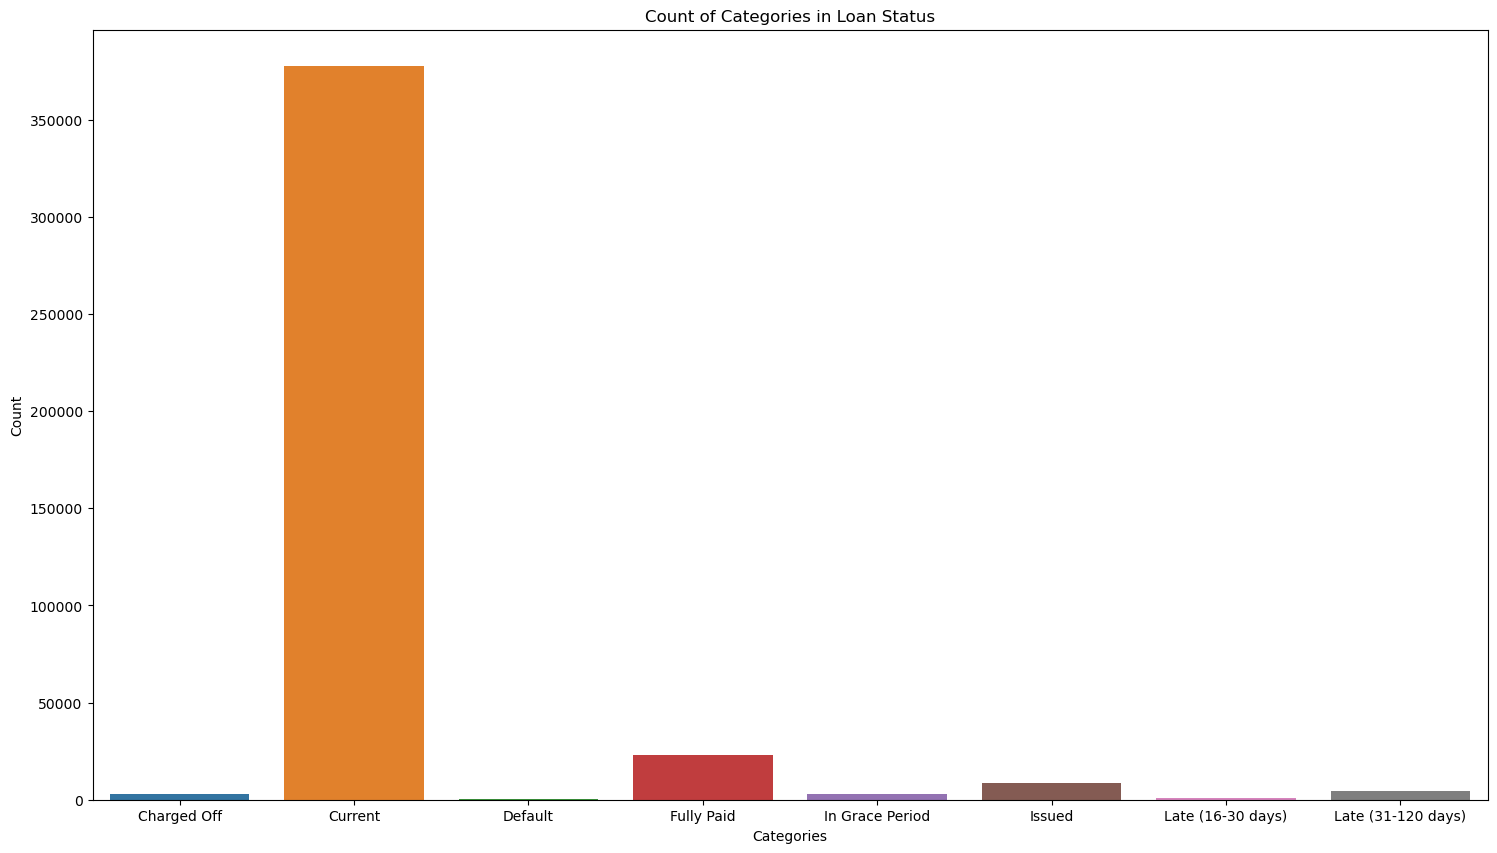

In [7]:
# shows the count of categories
plt.figure(figsize=(18,10))
sns.countplot(data=df, x="loan_status")
plt.title("Count of Categories in Loan Status")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.show()

In [10]:
df.describe()

id     member_id      loan_amnt    funded_amnt  \
count  4.210940e+05  4.210940e+05  421094.000000  421094.000000   
mean   5.393094e+07  5.759572e+07   15240.255561   15240.255561   
std    9.475416e+06  1.013357e+07    8571.313525    8571.313525   
min    5.670500e+04  7.082500e+04    1000.000000    1000.000000   
25%    4.612481e+07  4.922616e+07    8500.000000    8500.000000   
50%    5.536030e+07  5.895358e+07   14000.000000   14000.000000   
75%    6.186216e+07  6.604582e+07   20000.000000   20000.000000   
max    6.861706e+07  7.354484e+07   35000.000000   35000.000000   

       funded_amnt_inv       int_rate    installment    annual_inc  \
count    421094.000000  421094.000000  421094.000000  4.210940e+05   
mean      15234.125991      12.601731     441.872719  7.696561e+04   
std        8567.923312       4.317873     244.857549  7.395005e+04   
min         900.000000       5.320000      30.120000  0.000000e+00   
25%        8500.000000       9.170000     263.930000  4.600000e+04   
50%       14000.000000      12.290000     385.425000  6.500000e+04   
75%       20000.000000      15.590000     578.790000  9.169125e+04   
max       35000.000000      28.990000    1445.460000  9.500000e+06   

                 dti    delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  421094.000000  421094.000000   421094.000000           217133.000000   
mean       19.196014       0.347397        0.572692               34.023391   
std        23.504060       0.927696        0.867777               21.990270   
min         0.000000       0.000000        0.000000                0.000000   
25%        12.590000       0.000000        0.000000               15.000000   
50%        18.600000       0.000000        0.000000               31.000000   
75%        25.340000       0.000000        1.000000               50.000000   
max      9999.000000      39.000000        6.000000              176.000000   

       mths_since_last_record       open_acc        pub_rec     revol_bal  \
count            74415.000000  421094.000000  421094.000000  4.210940e+05   
mean                66.592609      11.948629       0.233777  1.768548e+04   
std                 25.577899       5.633118       0.649778  2.419506e+04   
min                  0.000000       1.000000       0.000000  0.000000e+00   
25%                 50.000000       8.000000       0.000000  6.480000e+03   
50%                 67.000000      11.000000       0.000000  1.199600e+04   
75%                 82.000000      15.000000       0.000000  2.142800e+04   
max                120.000000      90.000000      86.000000  2.904836e+06   

          revol_util      total_acc      out_prncp  out_prncp_inv  \
count  420932.000000  421094.000000  421094.000000  421094.000000   
mean       53.839819      25.493458   12824.715167   12819.308696   
std        23.886467      12.097212    8372.087005    8368.291516   
min         0.000000       4.000000       0.000000       0.000000   
25%        36.100000      17.000000    6457.280000    6452.190000   
50%        54.200000      24.000000   11444.610000   11440.480000   
75%        72.100000      32.000000   18232.830000   18224.750000   
max       193.000000     169.000000   49372.860000   49372.860000   

         total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
count  421094.000000    421094.000000    421094.000000  421094.000000   
mean     3149.641624      3148.657478      2315.820515     831.441789   
std      4232.228229      4231.088416      3899.732266     893.458450   
min         0.000000         0.000000         0.000000       0.000000   
25%       854.252500       853.680000       550.460000     224.720000   
50%      1971.110000      1970.600000      1243.730000     537.530000   
75%      3803.170000      3801.527500      2456.740000    1125.055000   
max     42786.530000     42786.530000     35000.000000    8767.900000   

       total_rec_late_fee     recoveries  collection_recovery_fee  \
count       421094.000000  

In [11]:
null_value[null_value<0.8] # 55 columns has less null values

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.031347
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line              0.000000
inq_last_6mths                0.000000
open_acc                 

In [12]:
df.isnull().sum() # count of null values 

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       23874
emp_length                      23817
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           421049
purpose                             0
title                             132
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_

In [41]:
[var for var in df.columns if df[var].isna().sum() > 0] # it return features which have  one or more null value

['emp_title',
 'emp_length',
 'desc',
 'title',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'revol_util',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m']

In [46]:
# sns.heatmap(df.isna(),annot=True)

In [12]:
df.corr() 

id  member_id  loan_amnt  funded_amnt  \
id                           1.000000   0.997540  -0.008293    -0.008293   
member_id                    0.997540   1.000000  -0.008624    -0.008624   
loan_amnt                   -0.008293  -0.008624   1.000000     1.000000   
funded_amnt                 -0.008293  -0.008624   1.000000     1.000000   
funded_amnt_inv             -0.008559  -0.008889   0.999994     0.999994   
int_rate                    -0.053335  -0.053378   0.140690     0.140690   
installment                 -0.012911  -0.013266   0.941225     0.941225   
annual_inc                   0.015055   0.014958   0.305734     0.305734   
dti                          0.005694   0.005807   0.006105     0.006105   
delinq_2yrs                  0.002302   0.002263  -0.010423    -0.010423   
inq_last_6mths               0.000662   0.000717  -0.039038    -0.039038   
mths_since_last_delinq       0.006322   0.006186  -0.034863    -0.034863   
mths_since_last_record      -0.037319  -0.037366  -0.014108    -0.014108   
open_acc                     0.006306   0.006107   0.188211     0.188211   
pub_rec                      0.003502   0.003636  -0.088898    -0.088898   
revol_bal                    0.003775   0.003745   0.334658     0.334658   
revol_util                  -0.043794  -0.043594   0.127701     0.127701   
total_acc                   -0.014480  -0.014674   0.208429     0.208429   
out_prncp                    0.169929   0.169368   0.882686     0.882686   
out_prncp_inv                0.169716   0.169156   0.882718     0.882718   
total_pymnt                 -0.440158  -0.439786   0.387697     0.387697   
total_pymnt_inv             -0.440237  -0.439864   0.387681     0.387681   
total_rec_prncp             -0.354523  -0.354261   0.288030     0.288030   
total_rec_int               -0.533914  -0.533334   0.577659     0.577659   
total_rec_late_fee          -0.040980  -0.040818   0.024097     0.024097   
recoveries                  -0.028615  -0.028336   0.012728     0.012728   
collection_recovery_fee     -0.032295  -0.031970   0.014938     0.014938   
last_pymnt_amnt             -0.125119  -0.125274   0.167920     0.167920   
collections_12_mths_ex_med   0.011953   0.011891  -0.027454    -0.027454   
mths_since_last_major_derog  0.021221   0.021181  -0.018556    -0.018556   
policy_code                       NaN        NaN        NaN          NaN   
annual_inc_joint             0.056260   0.056358   0.438866     0.438866   
dti_joint                    0.092846   0.093700   0.018769     0.018769   
acc_now_delinq              -0.004834  -0.004732   0.000646     0.000646   
tot_coll_amt                 0.002312   0.002329  -0.021436    -0.021436   
tot_cur_bal                  0.011241   0.010903   0.325353     0.325353   
open_acc_6m                  0.012746   0.008560  -0.040487    -0.040487   
open_il_6m                   0.002460   0.000563   0.027938     0.027938   
open_il_12m                  0.006383   0.005267  -0.013290    -0.013290   
open_il_24m                  0.001371  -0.002238   0.024537     0.024537   
mths_since_rcnt_il           0.002310   0.003673  -0.010985    -0.010985   
total_bal_il                 0.009510   0.005955   0.135564     0.135564   
il_util                      0.009703   0.009033  -0.107249    -0.107249   
open_rv_12m                  0.011797   0.006729  -0.051313    -0.051313   
open_rv_24m                  0.004960   0.003529  -0.028005    -0.028005   
max_bal_bc                  -0.000543  -0.003295   0.412165     0.412165   
all_util                     0.000428   0.000492   0.019173     0.019173   
total_rev_hi_lim             0.019242   0.019141   0.330871     0.330871   
inq_fi                      -0.013579  -0.013022   0.009638     0.009638   
total_cu_tl                 -0.000914  -0.005038   0.071500     0.071500   
inq_last_12m                 0.014084   0.012763   0.007928     0.007928   

                             funded_amnt_inv  int_rate  installment  \
id         

<Axes: >

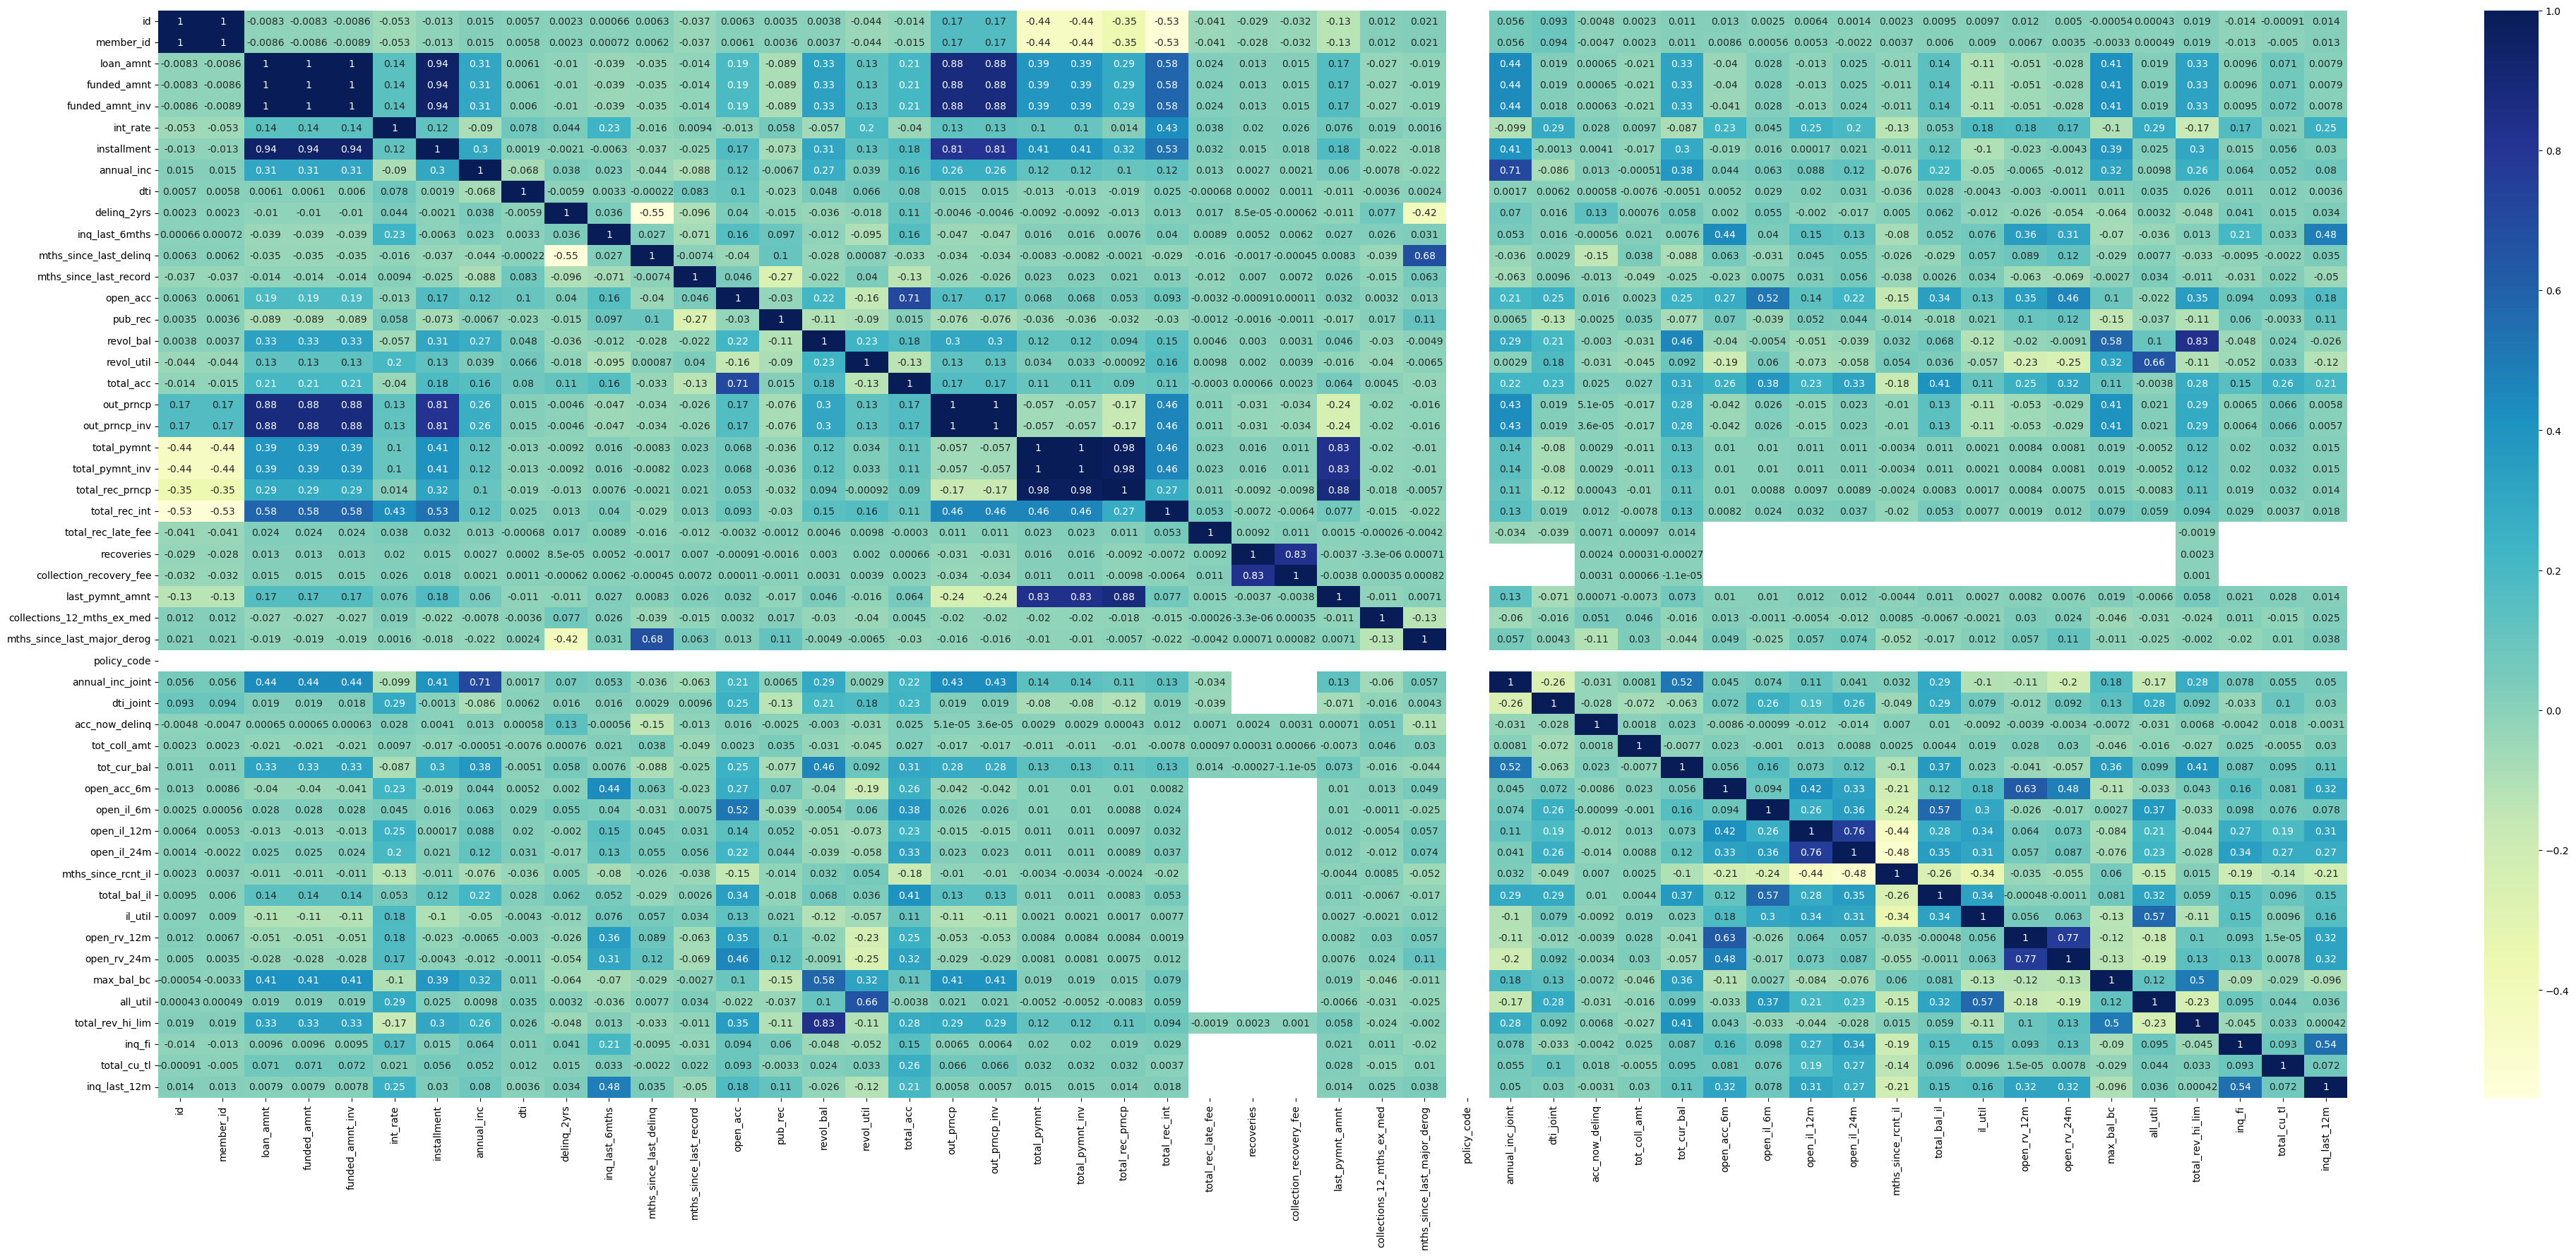

In [14]:
plt.figure(figsize=(50,20))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

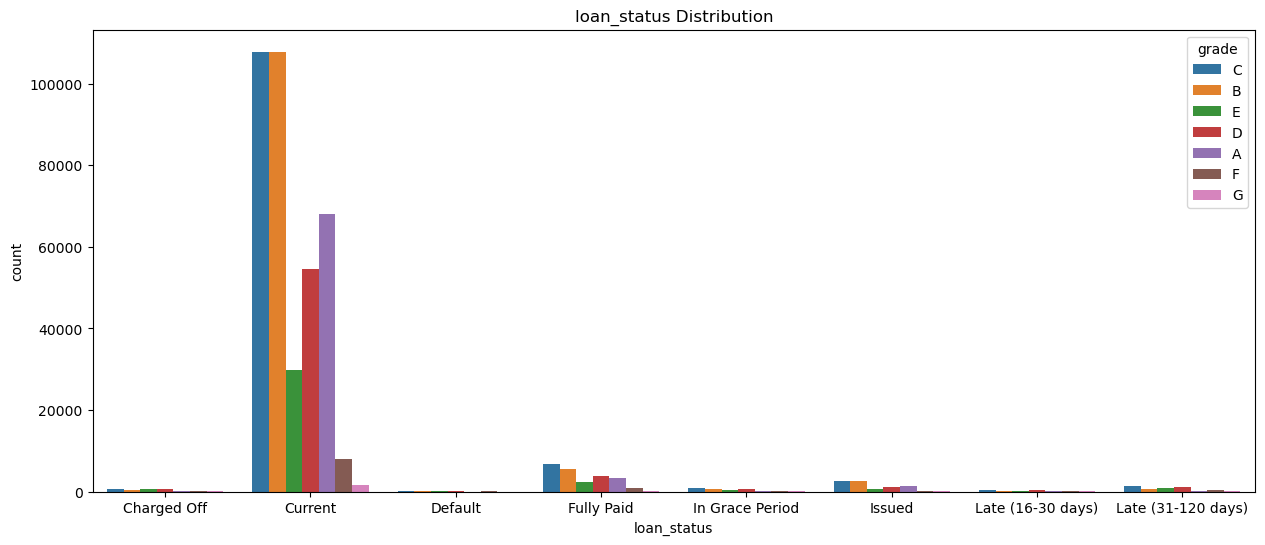

In [4]:
# Countplot for loan_status with hue for grade
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x="loan_status", hue="grade") #Categorical Variables
plt.title("loan_status Distribution")
plt.show()
#Current large data #Bar Plot

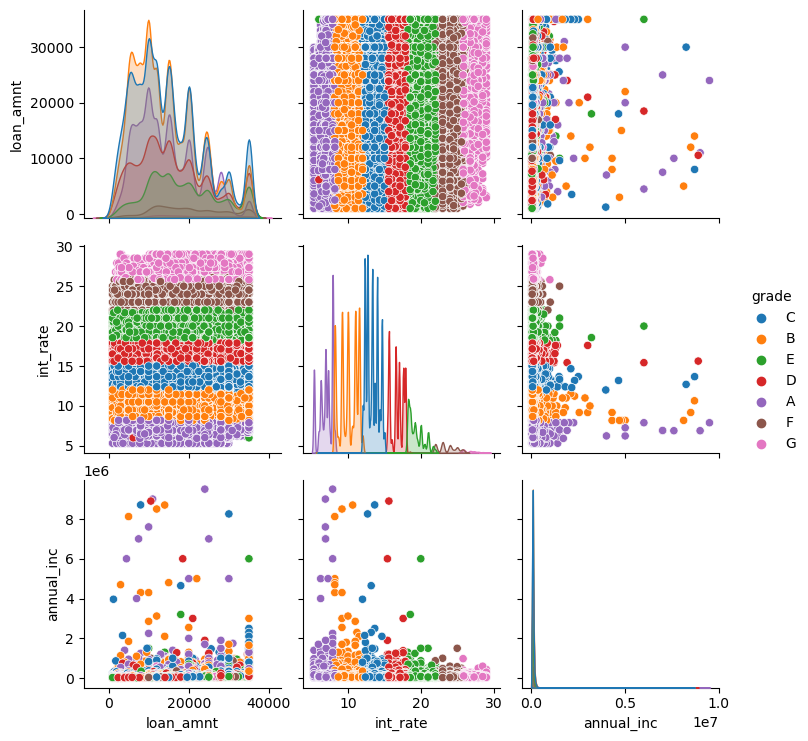

In [6]:
# Pair plot to visualize relationships
sns.pairplot(df[["loan_amnt", "int_rate", "annual_inc", "grade"]], hue="grade")
plt.show()

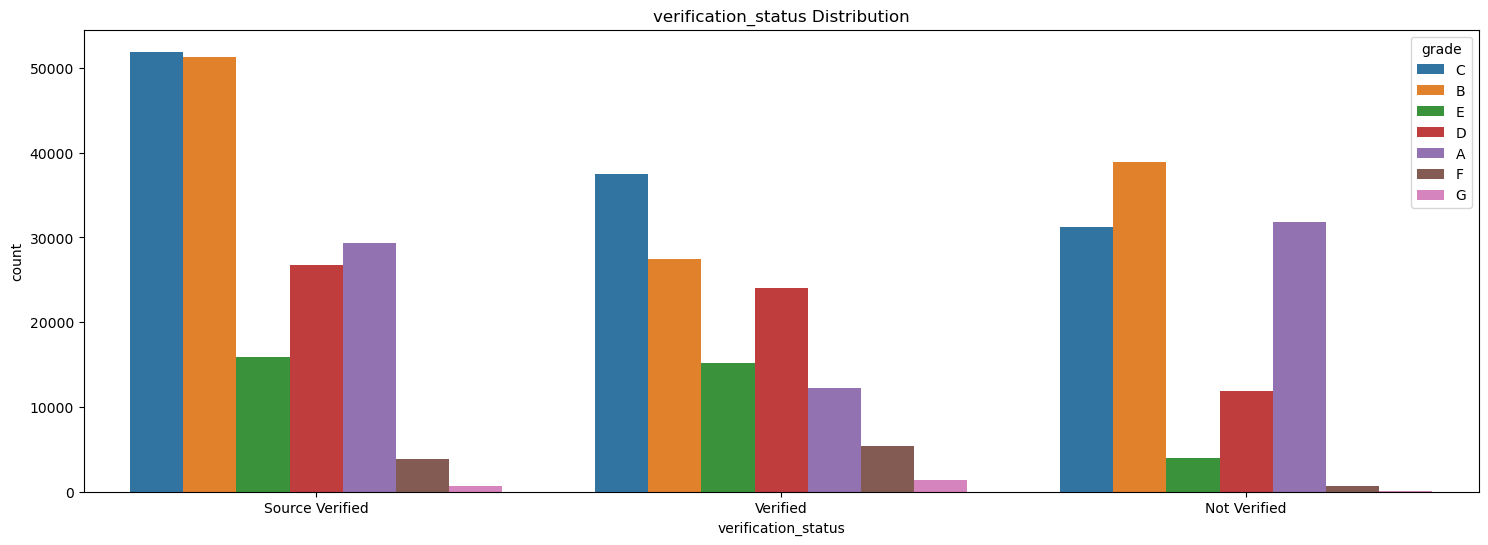

In [5]:
# Countplot for verification_status with hue for grade
plt.figure(figsize=(18, 6)) #Bar Plot
sns.countplot(data=df, x="verification_status", hue="grade") #Categorical Variables
plt.title("verification_status Distribution")
plt.show()

In [ ]:
# sns.pairplot(df)

In [13]:
df.head(1)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  60516983   64537751      20000        20000            20000   36 months   

   int_rate  installment grade sub_grade         emp_title emp_length  \
0     12.29       667.06     C        C1  Accounting Clerk     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0            OWN     65000.0     Source Verified  Sep-15  Charged Off   

  pymnt_plan                                                url desc  \
0          n  https://www.lendingclub.com/browse/loanDetail....  NaN   

              purpose               title zip_code addr_state    dti  \
0  debt_consolidation  Debt consolidation    542xx         WI  20.72   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0            0           Sep-00               1                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN        25        0      31578        77.0   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0         42                   w        0.0            0.0          0.0   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0              0.0              0.0            0.0                 0.0   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0         0.0                      0.0          NaN              0.0   

  next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  \
0          NaN             Jan-16                           0   

   mths_since_last_major_derog  policy_code application_type  \
0                          NaN            1       INDIVIDUAL   

   annual_inc_joint  dti_joint verification_status_joint  acc_now_delinq  \
0               NaN        NaN                       NaN               0   

   tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  open_il_12m  \
0             0        52303          NaN         NaN          NaN   

   open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  open_rv_12m  \
0          NaN                 NaN           NaN      NaN          NaN   

   open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  total_cu_tl  \
0          NaN         NaN       NaN             41000     NaN          NaN   

   inq_last_12m  
0           NaN

In [4]:
invertor_count = df.groupby(["loan_amnt","funded_amnt_inv"]).size().reset_index().rename(columns={0:"borrower_count"})
invertor_count.head(5)
# loan_amnt and funded_amnt are same

loan_amnt  funded_amnt_inv  borrower_count
0       1000              900               1
1       1000              925               3
2       1000              975               2
3       1000             1000            1160
4       1025             1025               4

In [ ]:
# count of borrower who takes loan

In [ ]:
#id, member_id 

Text(0, 0.5, 'Frequency')

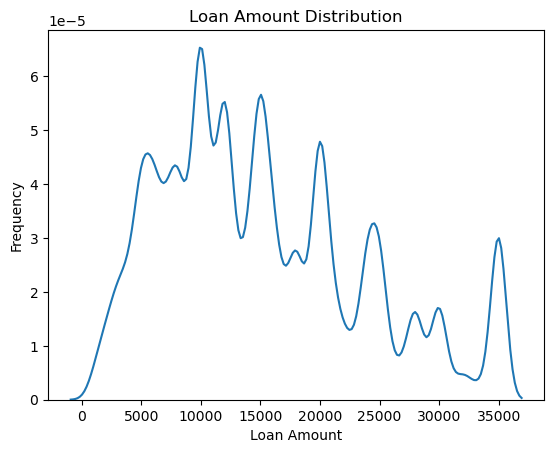

In [3]:
# analysis column wise
# loan_amnt
sns.kdeplot(df["loan_amnt"]) 
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

Observation:
    loan_amnt is not normally distributed, but also has not right and left skewed.

<Axes: xlabel='grade', ylabel='loan_amnt'>

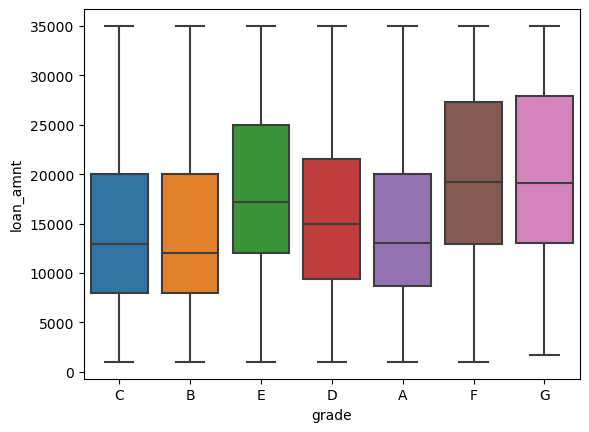

In [195]:
sns.boxplot(x="grade", y="loan_amnt", data=df) # 

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

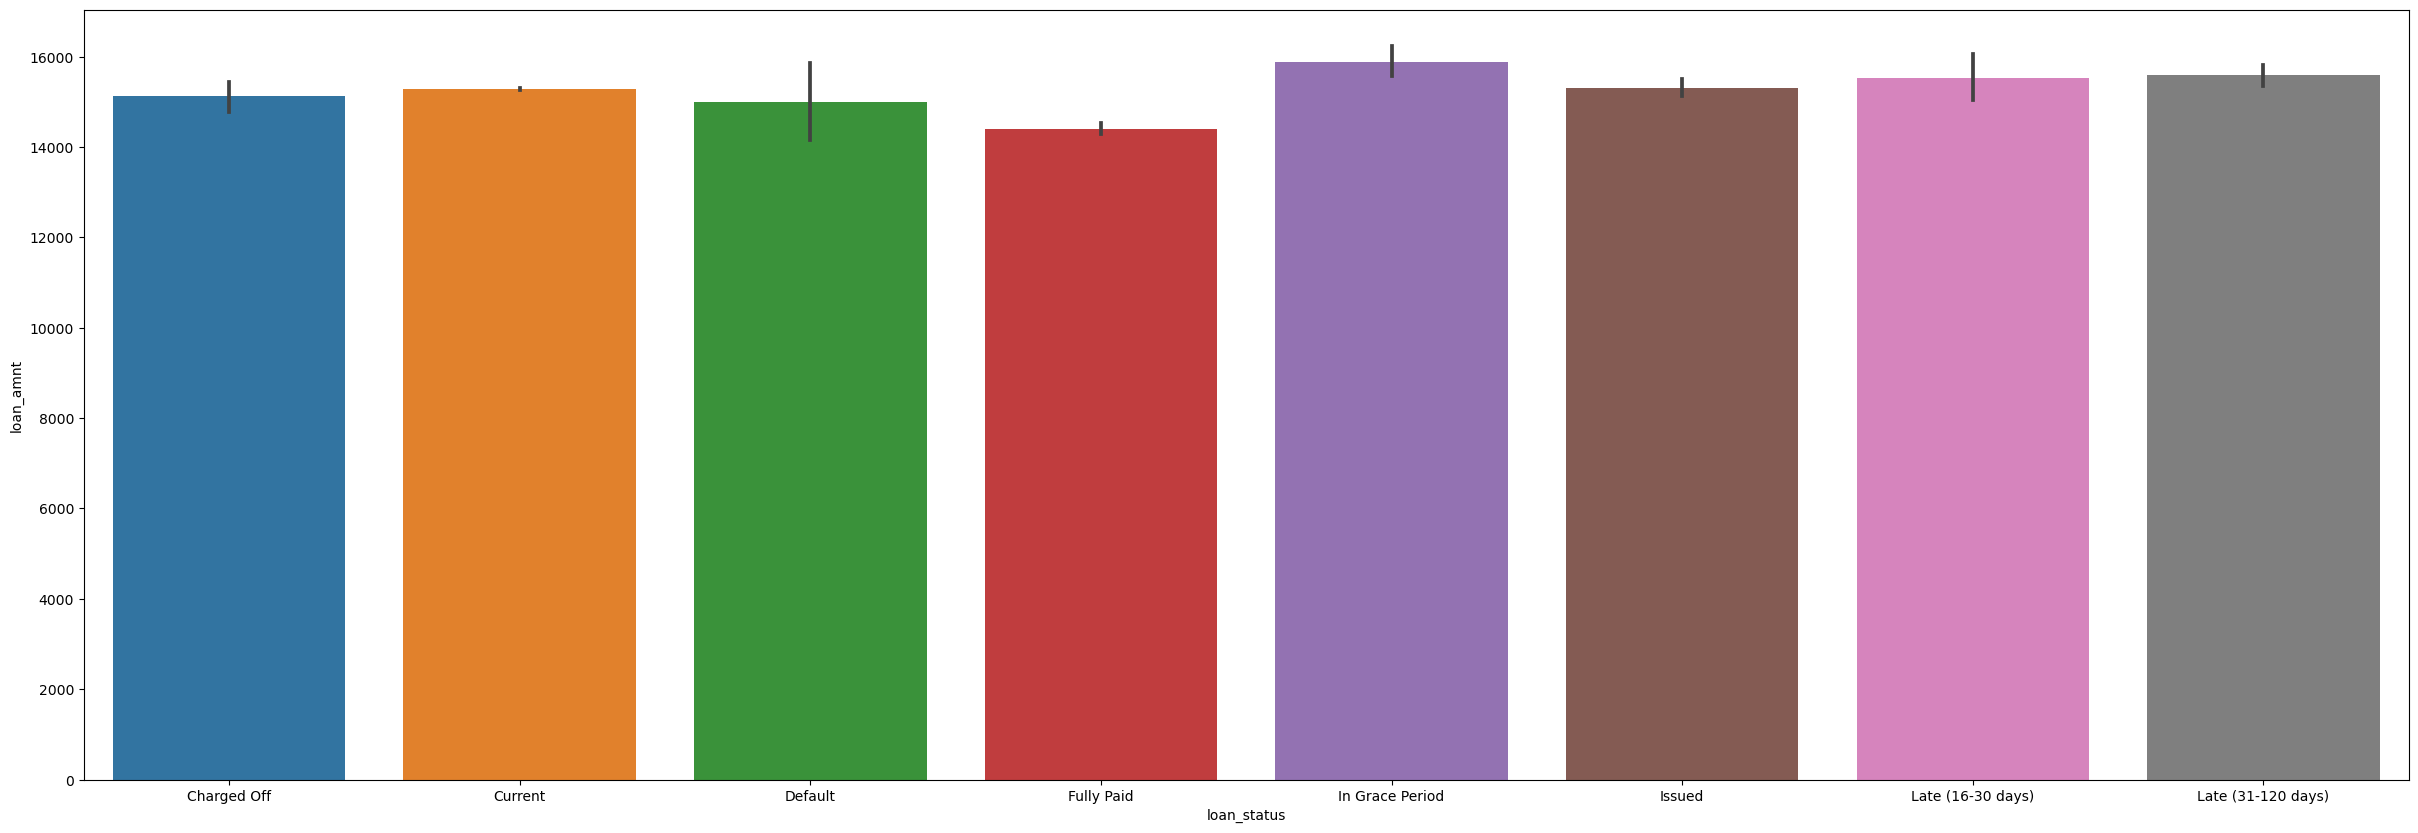

In [203]:
plt.figure(figsize=(30,10))
sns.barplot(x="loan_status", y="loan_amnt", data=df)

Text(0, 0.5, 'Feature2')

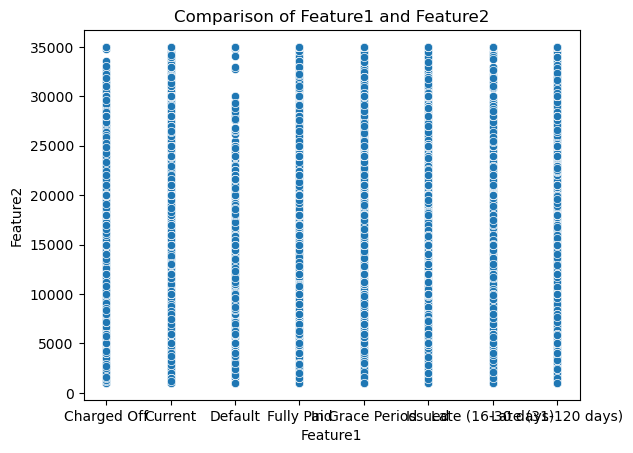

In [199]:
sns.scatterplot(x="loan_status", y="loan_amnt",data=df)
plt.title("Comparison of Feature1 and Feature2")
plt.xlabel("Feature1")
plt.ylabel("Feature2")

In [7]:
# plt.plot(df["loan_amnt"]) 

Text(0, 0.5, 'Frequency')

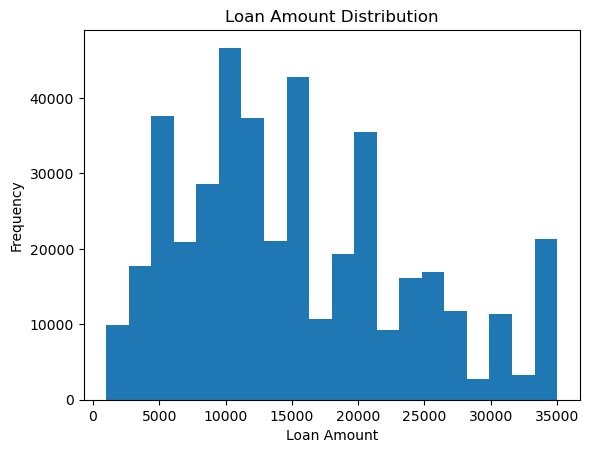

In [15]:
plt.hist(df['loan_amnt'], bins=20) # bins defines the number of equal-width bins in the range.
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

In [4]:
# df['loan_amnt'].plot.kde()
# plt.title('Kernel Density Estimation of Loan Amount')
# plt.xlabel('Loan Amount')
# plt.ylabel('Density')

Text(0.5, 0, 'Loan Amount')

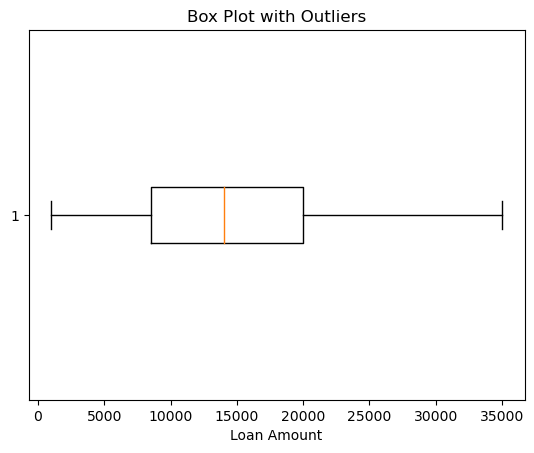

In [97]:
plt.boxplot(df['loan_amnt'], vert=False, showfliers=True)
plt.title('Box Plot with Outliers')
plt.xlabel('Loan Amount')

Text(0, 0.5, 'Interest Rate')

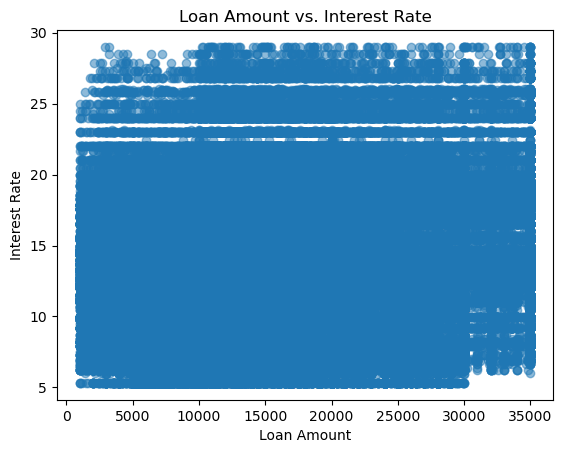

In [101]:
plt.scatter(df['loan_amnt'], df['int_rate'], alpha=0.5)
plt.title('Loan Amount vs. Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')

In [102]:
loan_amnt_by_grade = df.groupby('grade')['loan_amnt'].mean()
print(loan_amnt_by_grade)

grade
A    14691.720870
B    14251.806455
C    14745.592285
D    15947.183739
E    18472.726622
F    20090.274524
G    20427.838025
Name: loan_amnt, dtype: float64


Text(0, 0.5, 'CDF')

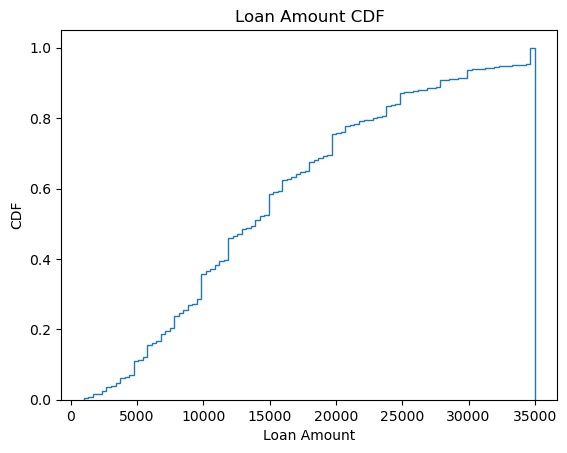

In [111]:
df['loan_amnt'].plot(kind='hist', cumulative=True, density=1, bins=100, histtype='step')
plt.title('Loan Amount CDF')
plt.xlabel('Loan Amount')
plt.ylabel('CDF') #cumulative indicates that want to plot the cumulative distribution, not just the frequency distribution.

In [ ]:
# The CDF represents the probability that a loan amount falls below a specific value, while the histogram shows the 
# distribution of the loan amounts in terms of frequency.

<Axes: xlabel='purpose', ylabel='loan_amnt'>

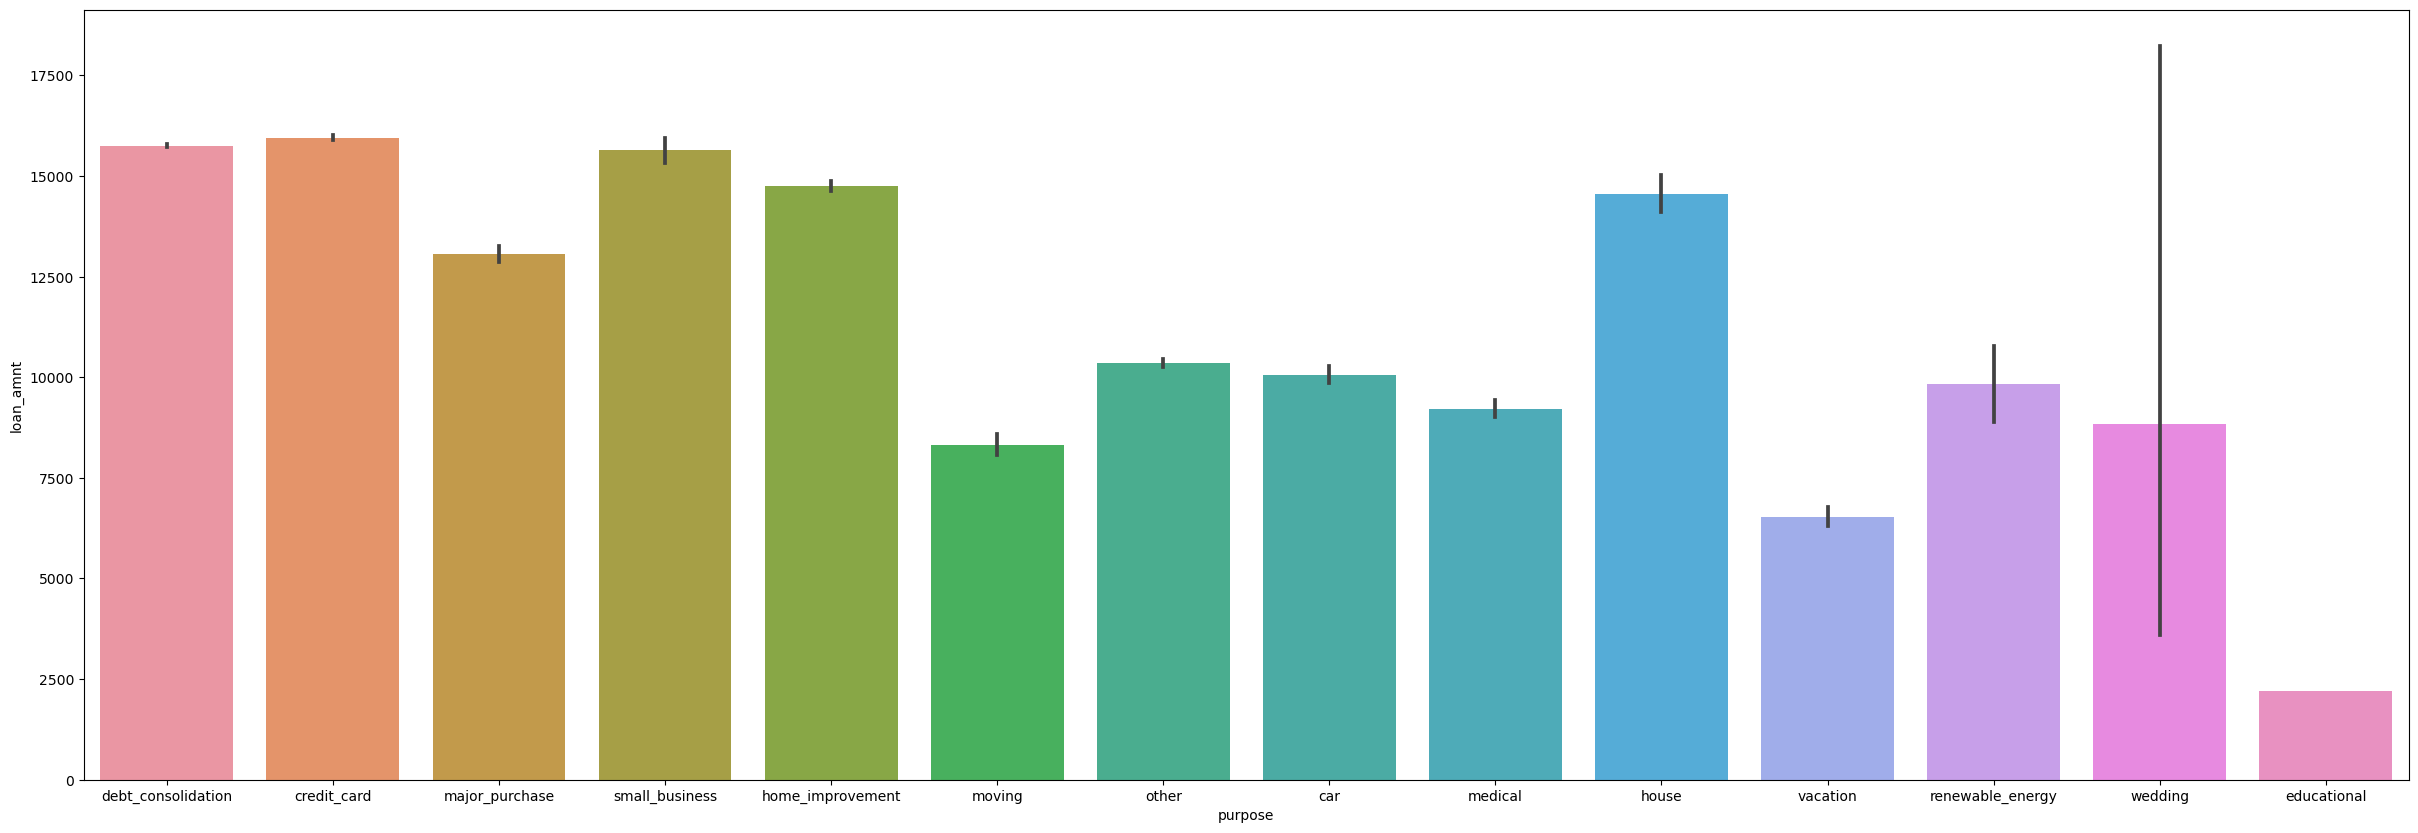

In [204]:
plt.figure(figsize=(30,10))
sns.barplot(x="purpose", y="loan_amnt", data=df)

In [104]:
loan_amnt_by_purpose = df.groupby('purpose')['loan_amnt'].mean()
print(loan_amnt_by_purpose)

purpose
car                   10066.423832
credit_card           15951.617741
debt_consolidation    15756.119210
educational            2200.000000
home_improvement      14750.910367
house                 14542.715577
major_purchase        13058.913948
medical                9215.217115
moving                 8314.121901
other                 10345.197615
renewable_energy       9824.441964
small_business        15642.798751
vacation               6524.455313
wedding                8825.000000
Name: loan_amnt, dtype: float64


In [23]:
corr = df.corr()
corr_loan_amnt = corr['loan_amnt'].sort_values(ascending=False)
corr_loan_amnt

loan_amnt                      1.000000
funded_amnt                    1.000000
funded_amnt_inv                0.999994
installment                    0.941225
out_prncp_inv                  0.882718
out_prncp                      0.882686
total_rec_int                  0.577659
annual_inc_joint               0.438866
max_bal_bc                     0.412165
total_pymnt                    0.387697
total_pymnt_inv                0.387681
revol_bal                      0.334658
total_rev_hi_lim               0.330871
tot_cur_bal                    0.325353
annual_inc                     0.305734
total_rec_prncp                0.288030
total_acc                      0.208429
open_acc                       0.188211
last_pymnt_amnt                0.167920
int_rate                       0.140690
total_bal_il                   0.135564
revol_util                     0.127701
total_cu_tl                    0.071500
open_il_6m                     0.027938
open_il_24m                    0.024537


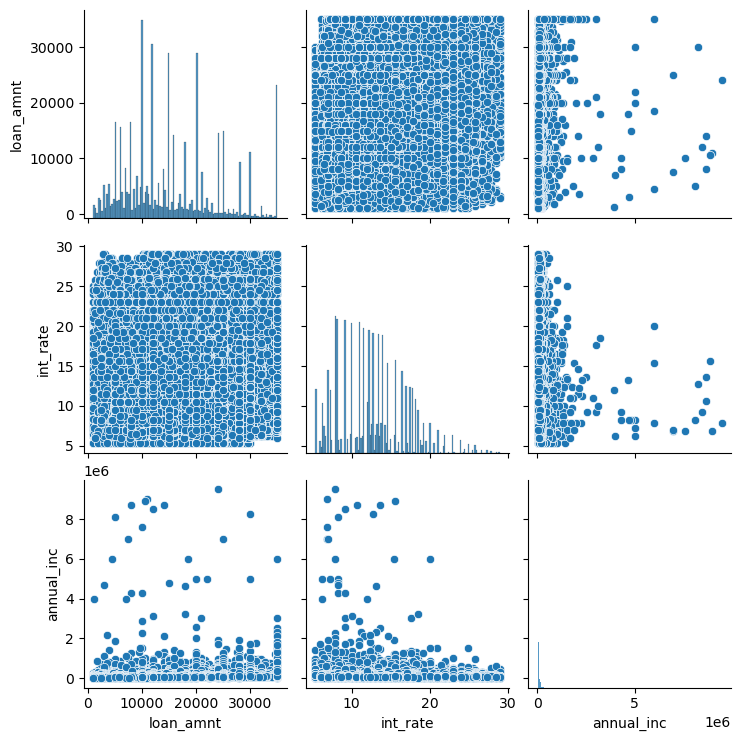

In [109]:
sns.pairplot(df[['loan_amnt', 'int_rate', 'annual_inc']])

In [17]:
df["loan_amnt"].isna().sum()

0

Text(0, 0.5, 'Frequency')

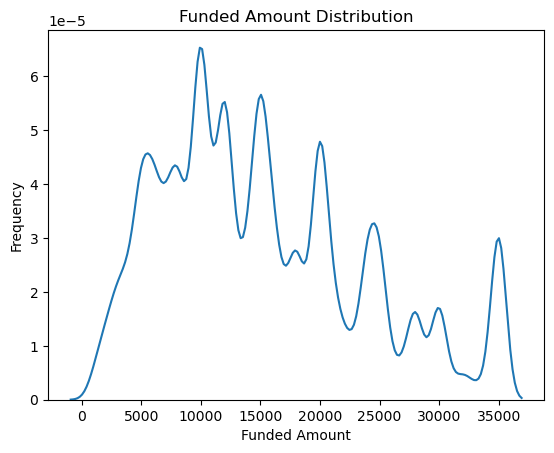

In [16]:
#funded_amnt
sns.kdeplot(df["funded_amnt"]) 
plt.title('Funded Amount Distribution')
plt.xlabel('Funded Amount')
plt.ylabel('Frequency') 

Text(0, 0.5, 'Frequency')

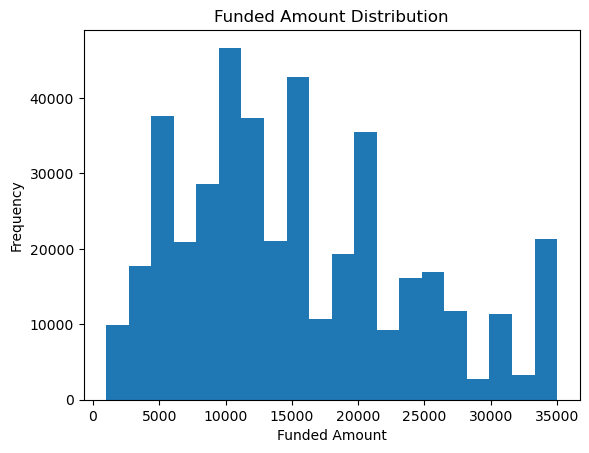

In [17]:
plt.hist(df['funded_amnt'], bins=20) # bins defines the number of equal-width bins in the range.
plt.title('Funded Amount Distribution')
plt.xlabel('Funded Amount')
plt.ylabel('Frequency')

In [18]:
df["funded_amnt"].isna().sum()

0

In [18]:
# sns.boxplot(df["funded_amnt"]) # no outliers is present 

Text(0.5, 0, 'Funded Amount')

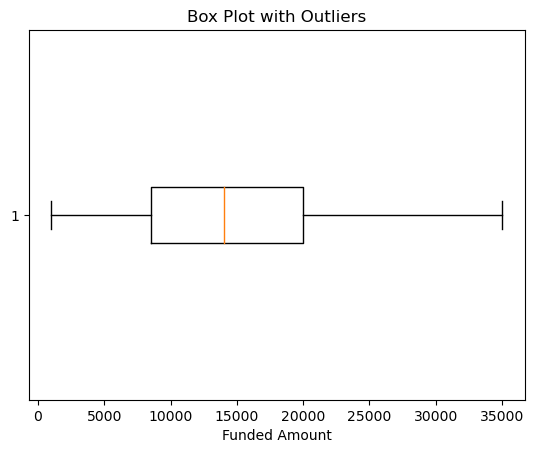

In [19]:
plt.boxplot(df['funded_amnt'], vert=False, showfliers=True)
plt.title('Box Plot with Outliers')
plt.xlabel('Funded Amount')

Text(0, 0.5, 'CDF')

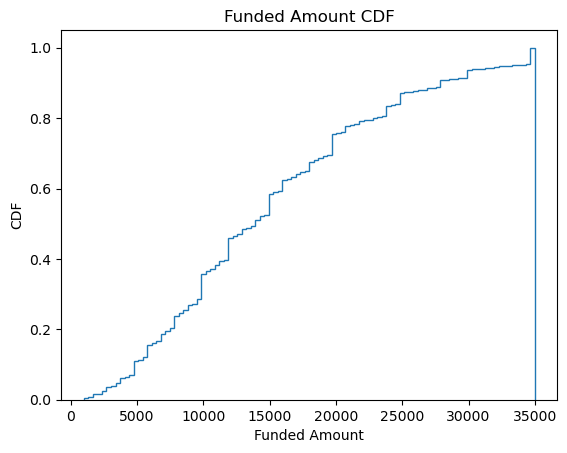

In [20]:
df['funded_amnt'].plot(kind='hist', cumulative=True, density=1, bins=100, histtype='step')
plt.title('Funded Amount CDF')
plt.xlabel('Funded Amount')
plt.ylabel('CDF')

In [24]:
corr = df.corr()
corr_funded_amnt = corr['funded_amnt'].sort_values(ascending=False)
corr_funded_amnt

loan_amnt                      1.000000
funded_amnt                    1.000000
funded_amnt_inv                0.999994
installment                    0.941225
out_prncp_inv                  0.882718
out_prncp                      0.882686
total_rec_int                  0.577659
annual_inc_joint               0.438866
max_bal_bc                     0.412165
total_pymnt                    0.387697
total_pymnt_inv                0.387681
revol_bal                      0.334658
total_rev_hi_lim               0.330871
tot_cur_bal                    0.325353
annual_inc                     0.305734
total_rec_prncp                0.288030
total_acc                      0.208429
open_acc                       0.188211
last_pymnt_amnt                0.167920
int_rate                       0.140690
total_bal_il                   0.135564
revol_util                     0.127701
total_cu_tl                    0.071500
open_il_6m                     0.027938
open_il_24m                    0.024537


Text(0, 0.5, 'Frequency')

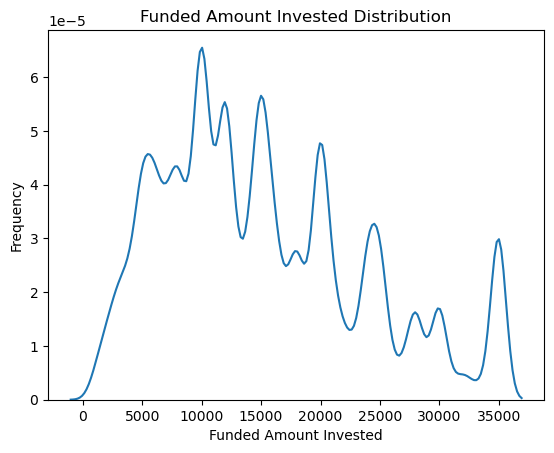

In [30]:
#funded_amnt_inv
# sns.distplot(df["funded_amnt_inv"])
sns.kdeplot(df["funded_amnt_inv"]) 
plt.title('Funded Amount Invested Distribution')
plt.xlabel('Funded Amount Invested')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

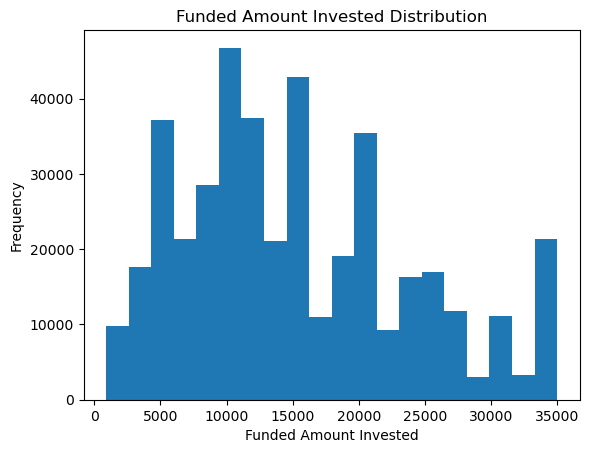

In [31]:
plt.hist(df['funded_amnt_inv'], bins=20) # bins defines the number of equal-width bins in the range.
plt.title('Funded Amount Invested Distribution')
plt.xlabel('Funded Amount Invested')
plt.ylabel('Frequency')

Text(0.5, 0, 'Funded Amount Invested')

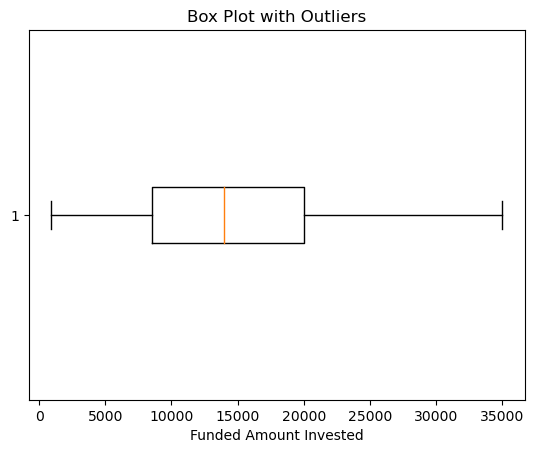

In [32]:
plt.boxplot(df['funded_amnt_inv'], vert=False, showfliers=True)
plt.title('Box Plot with Outliers')
plt.xlabel('Funded Amount Invested')

Text(0, 0.5, 'CDF')

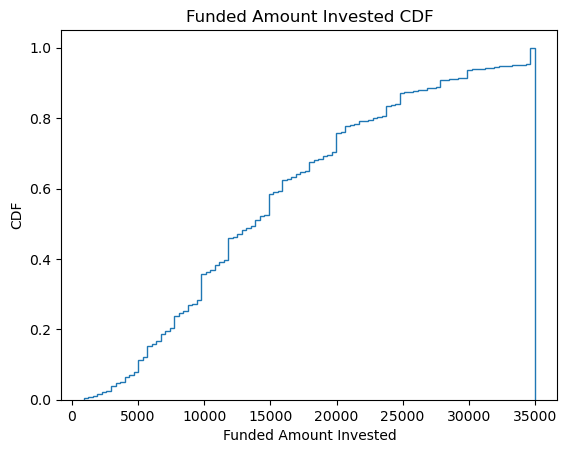

In [34]:
df['funded_amnt_inv'].plot(kind='hist', cumulative=True, density=1, bins=100, histtype='step')
plt.title('Funded Amount Invested CDF')
plt.xlabel('Funded Amount Invested')
plt.ylabel('CDF')

In [35]:
corr = df.corr()
corr_funded_amnt_inv = corr['funded_amnt_inv'].sort_values(ascending=False)
corr_funded_amnt_inv

funded_amnt_inv                1.000000
loan_amnt                      0.999994
funded_amnt                    0.999994
installment                    0.941207
out_prncp_inv                  0.882656
out_prncp                      0.882614
total_rec_int                  0.577779
annual_inc_joint               0.439213
max_bal_bc                     0.412268
total_pymnt                    0.387848
total_pymnt_inv                0.387835
revol_bal                      0.334665
total_rev_hi_lim               0.330953
tot_cur_bal                    0.325402
annual_inc                     0.305803
total_rec_prncp                0.288167
total_acc                      0.208463
open_acc                       0.188208
last_pymnt_amnt                0.167959
int_rate                       0.140327
total_bal_il                   0.135529
revol_util                     0.127569
total_cu_tl                    0.071515
open_il_6m                     0.027902
open_il_24m                    0.024388


In [23]:
df["funded_amnt_inv"].isna().sum()

0

In [22]:
# sns.boxplot(df["funded_amnt_inv"])

In [23]:
#term
df["term"].unique() # we have to do encoding here 

array([' 36 months', ' 60 months'], dtype=object)

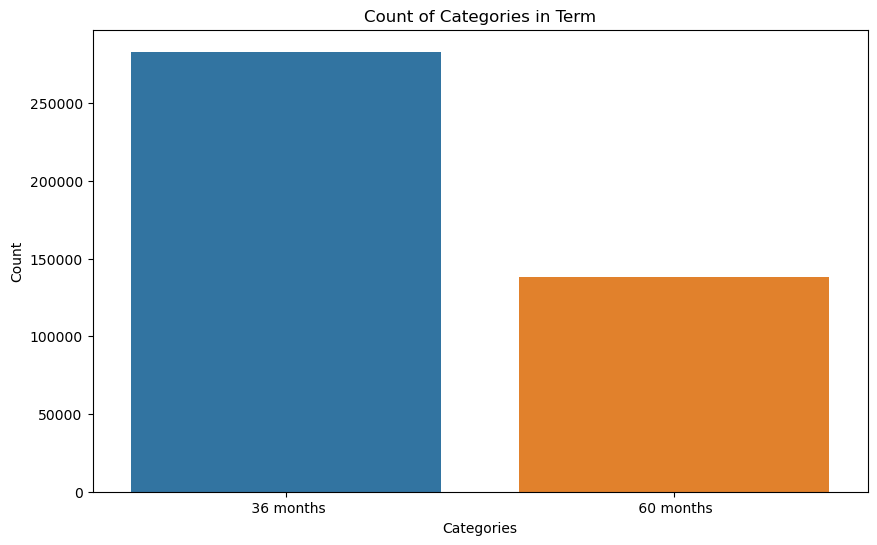

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="term")
plt.title("Count of Categories in Term")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.show()

In [24]:
df["term"].nunique()

2

In [24]:
df["funded_amnt_inv"].isna().sum()

0

In [25]:
df["term"].value_counts()

 36 months    283172
 60 months    137922
Name: term, dtype: int64

Text(0, 0.5, 'Frequency')

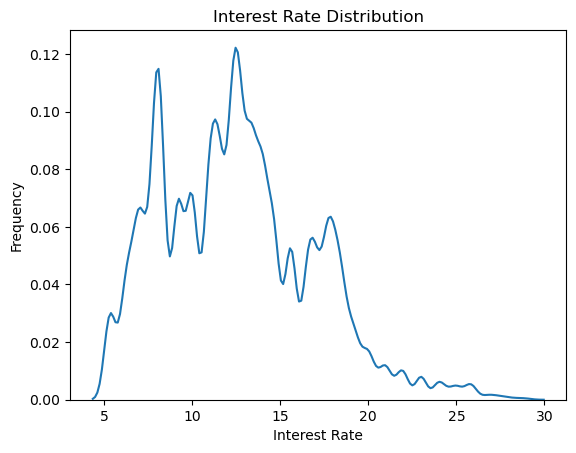

In [37]:
#int_rate
# sns.distplot(df["int_rate"]) # positive skewed
sns.kdeplot(df["int_rate"]) 
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

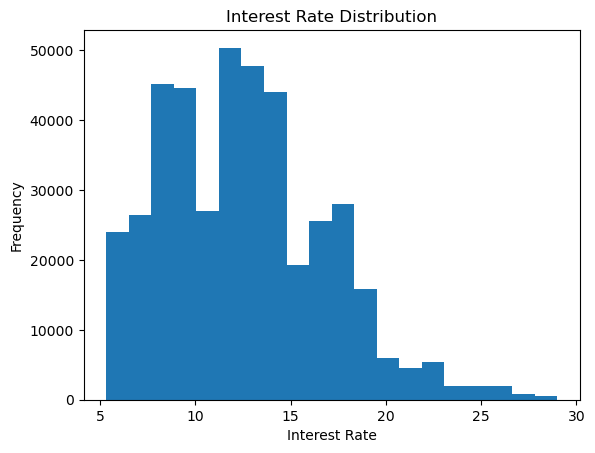

In [38]:
plt.hist(df['int_rate'], bins=20) # bins defines the number of equal-width bins in the range.
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')

Text(0.5, 0, 'Interest Rate')

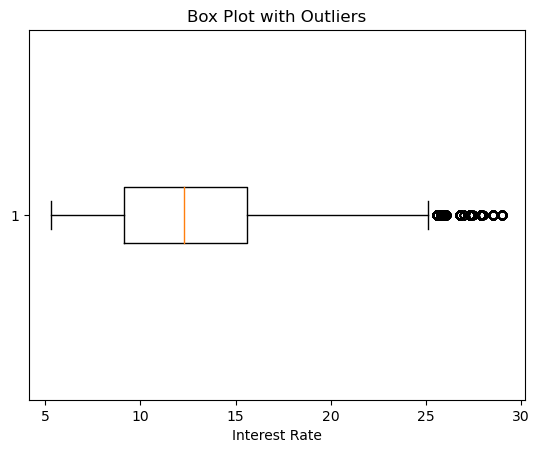

In [39]:
plt.boxplot(df['int_rate'], vert=False, showfliers=True)
plt.title('Box Plot with Outliers')
plt.xlabel('Interest Rate')

Text(0, 0.5, 'CDF')

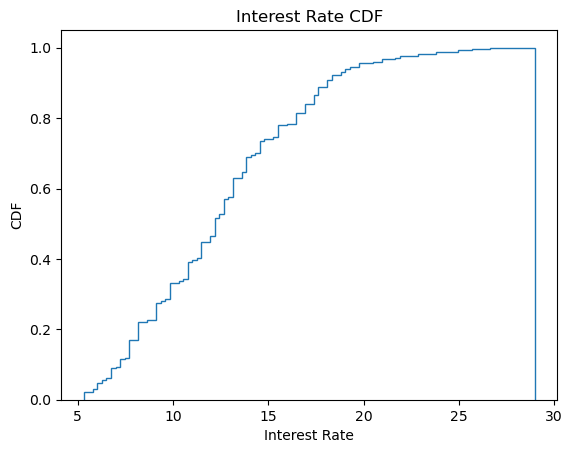

In [40]:
df['int_rate'].plot(kind='hist', cumulative=True, density=1, bins=100, histtype='step')
plt.title('Interest Rate CDF')
plt.xlabel('Interest Rate')
plt.ylabel('CDF')

In [41]:
corr_loan_amnt = df.corr()
corr_loan_amnt = corr['int_rate'].sort_values(ascending=False)
corr_loan_amnt

int_rate                       1.000000
total_rec_int                  0.434242
all_util                       0.288049
dti_joint                      0.287345
inq_last_12m                   0.252637
open_il_12m                    0.245076
inq_last_6mths                 0.231124
open_acc_6m                    0.226033
revol_util                     0.200682
open_il_24m                    0.199579
il_util                        0.183565
open_rv_12m                    0.176683
inq_fi                         0.171162
open_rv_24m                    0.171105
funded_amnt                    0.140690
loan_amnt                      0.140690
funded_amnt_inv                0.140327
out_prncp                      0.126143
out_prncp_inv                  0.125800
installment                    0.124452
total_pymnt                    0.104737
total_pymnt_inv                0.104663
dti                            0.077946
last_pymnt_amnt                0.076373
pub_rec                        0.058158


In [25]:
df["int_rate"].isna().sum()

0

<Axes: ylabel='int_rate'>

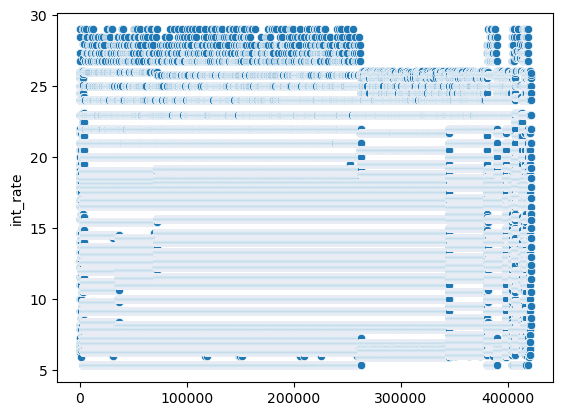

In [7]:
sns.scatterplot(df["int_rate"])

In [10]:
# sns.kdeplot()

In [42]:
# int_rate
# df.boxplot(["int_rate"]) # has outliers >>>do treatment on outliers

In [13]:
# columns_to_plot = ['loan_amnt', 'funded_amnt']
# for column in columns_to_plot:
#     sns.kdeplot(df[column], label=column)

In [26]:
#installment
df["installment"].isna().sum()

0

Text(0, 0.5, 'Frequency')

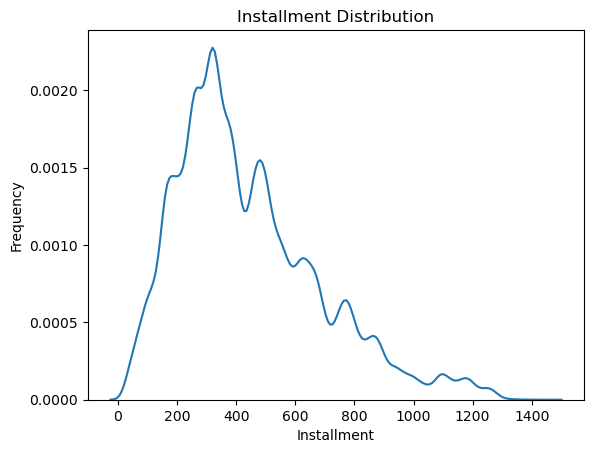

In [45]:
# sns.distplot(df["installment"]) # it is right skewed
sns.kdeplot(df["installment"]) 
plt.title('Installment Distribution')
plt.xlabel('Installment')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

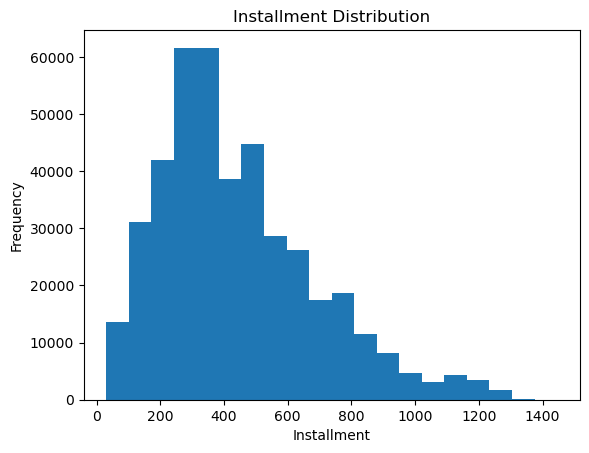

In [46]:
plt.hist(df['installment'], bins=20) # bins defines the number of equal-width bins in the range.
plt.title('Installment Distribution')
plt.xlabel('Installment')
plt.ylabel('Frequency')

Text(0.5, 0, 'Installment')

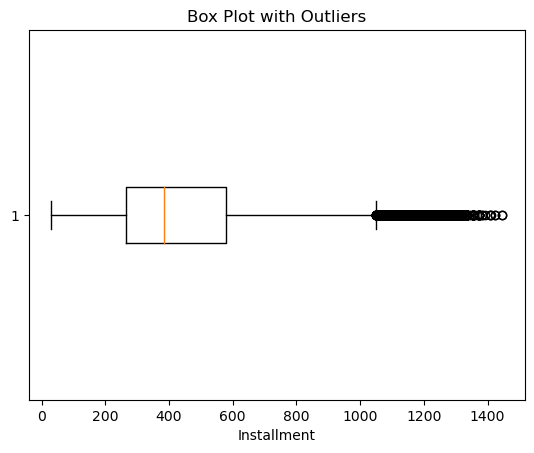

In [47]:
plt.boxplot(df['installment'], vert=False, showfliers=True)
plt.title('Box Plot with Outliers')
plt.xlabel('Installment')

Text(0, 0.5, 'CDF')

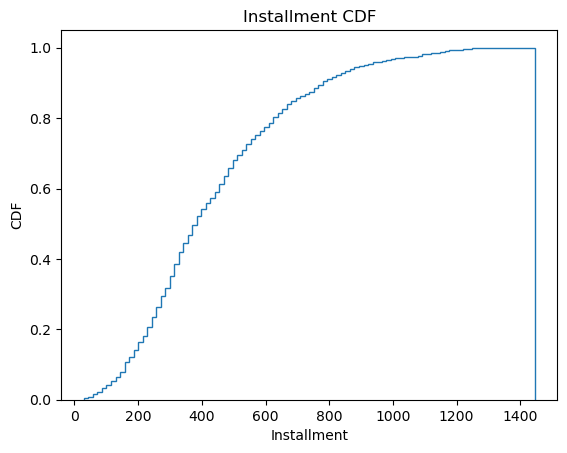

In [48]:
df['installment'].plot(kind='hist', cumulative=True, density=1, bins=100, histtype='step')
plt.title('Installment CDF')
plt.xlabel('Installment')
plt.ylabel('CDF')

In [50]:
corrt = df.corr()
corr_installment = corr['installment'].sort_values(ascending=False)
corr_installment

installment                    1.000000
loan_amnt                      0.941225
funded_amnt                    0.941225
funded_amnt_inv                0.941207
out_prncp_inv                  0.805812
out_prncp                      0.805798
total_rec_int                  0.534064
total_pymnt                    0.410702
total_pymnt_inv                0.410683
annual_inc_joint               0.405141
max_bal_bc                     0.385694
total_rec_prncp                0.322912
revol_bal                      0.314097
total_rev_hi_lim               0.303468
annual_inc                     0.297385
tot_cur_bal                    0.295476
total_acc                      0.183521
last_pymnt_amnt                0.175476
open_acc                       0.170000
revol_util                     0.128703
int_rate                       0.124452
total_bal_il                   0.116193
total_cu_tl                    0.056176
total_rec_late_fee             0.032058
inq_last_12m                   0.029699


In [44]:
# sns.boxplot(df["installment"]) # outliers present

In [ ]:
## grade , sub_grade, emp_title 

In [27]:
#emp_length
df["emp_length"].unique()

array(['1 year', '7 years', '6 years', '10+ years', nan, '8 years',
       '9 years', '3 years', '4 years', '< 1 year', '2 years', '5 years'],
      dtype=object)

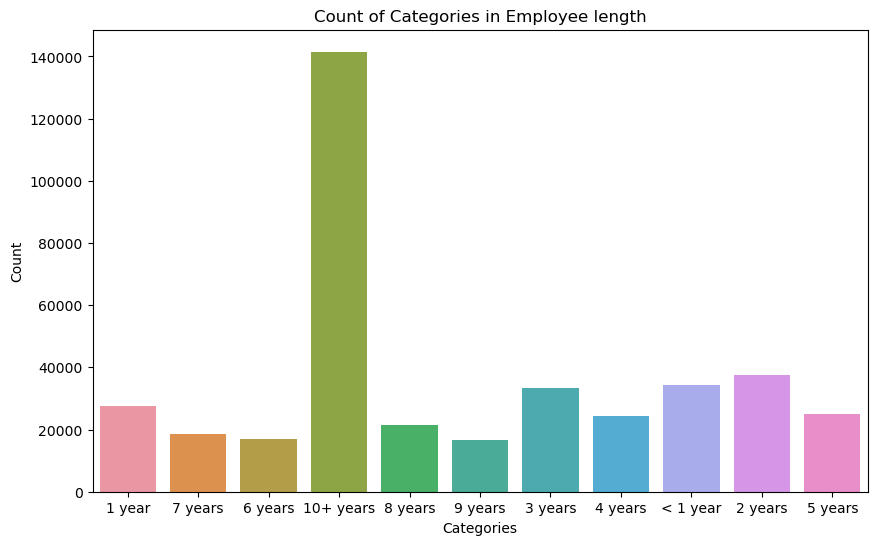

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="emp_length")
plt.title("Count of Categories in Employee length")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.show()

In [28]:
df["emp_length"].isna().sum() # missing values are present

23817

In [29]:
df["emp_length"].nunique()

11

In [30]:
df["emp_length"].value_counts()

10+ years    141520
2 years       37497
< 1 year      34340
3 years       33430
1 year        27473
5 years       24930
4 years       24506
8 years       21560
7 years       18414
6 years       16838
9 years       16769
Name: emp_length, dtype: int64

In [34]:
#home_ownership
df["home_ownership"].isna().sum() 

0

In [35]:
df["home_ownership"].unique(), df["home_ownership"].nunique()

(array(['OWN', 'MORTGAGE', 'RENT', 'ANY'], dtype=object), 4)

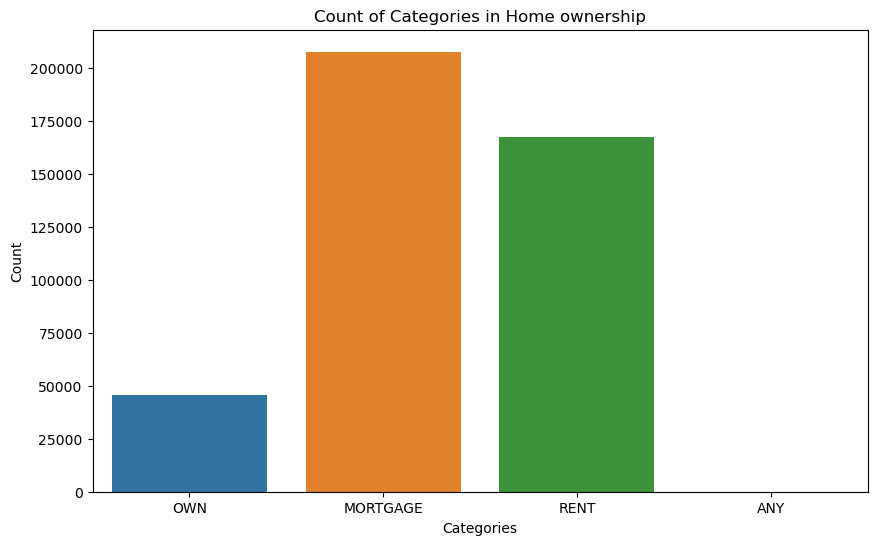

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="home_ownership")
plt.title("Count of Categories in Home ownership")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.show()

In [37]:
df["home_ownership"].value_counts()

MORTGAGE    207682
RENT        167644
OWN          45766
ANY              2
Name: home_ownership, dtype: int64

In [4]:
df.head(1)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  60516983   64537751      20000        20000            20000   36 months   

   int_rate  installment grade sub_grade         emp_title emp_length  \
0     12.29       667.06     C        C1  Accounting Clerk     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0            OWN     65000.0     Source Verified  Sep-15  Charged Off   

  pymnt_plan                                                url desc  \
0          n  https://www.lendingclub.com/browse/loanDetail....  NaN   

              purpose               title zip_code addr_state    dti  \
0  debt_consolidation  Debt consolidation    542xx         WI  20.72   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0            0           Sep-00               1                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN        25        0      31578        77.0   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0         42                   w        0.0            0.0          0.0   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0              0.0              0.0            0.0                 0.0   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0         0.0                      0.0          NaN              0.0   

  next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  \
0          NaN             Jan-16                           0   

   mths_since_last_major_derog  policy_code application_type  \
0                          NaN            1       INDIVIDUAL   

   annual_inc_joint  dti_joint verification_status_joint  acc_now_delinq  \
0               NaN        NaN                       NaN               0   

   tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  open_il_12m  \
0             0        52303          NaN         NaN          NaN   

   open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  open_rv_12m  \
0          NaN                 NaN           NaN      NaN          NaN   

   open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  total_cu_tl  \
0          NaN         NaN       NaN             41000     NaN          NaN   

   inq_last_12m  
0           NaN

Text(0, 0.5, 'Frequency')

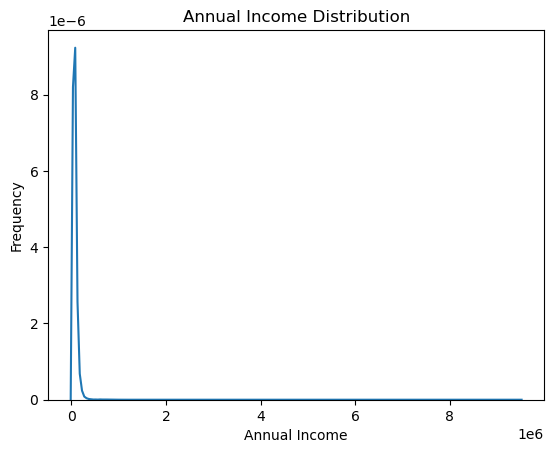

In [53]:
#annual_inc
# sns.distplot(df["annual_inc"])
sns.kdeplot(df["annual_inc"]) 
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

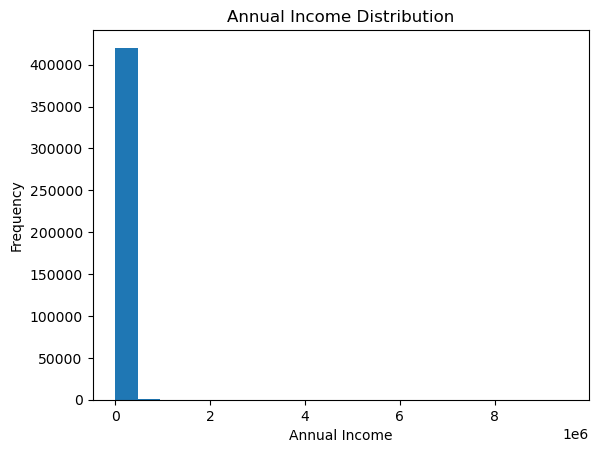

In [54]:
plt.hist(df['annual_inc'], bins=20) # bins defines the number of equal-width bins in the range.
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')

Text(0.5, 0, 'Annual Income')

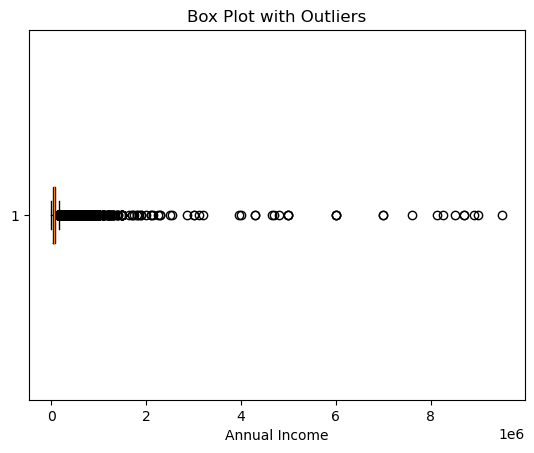

In [55]:
plt.boxplot(df['annual_inc'], vert=False, showfliers=True)
plt.title('Box Plot with Outliers')
plt.xlabel('Annual Income')

Text(0, 0.5, 'CDF')

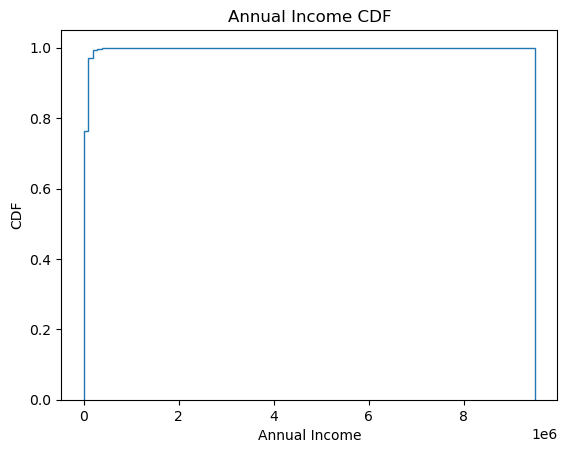

In [56]:
df['annual_inc'].plot(kind='hist', cumulative=True, density=1, bins=100, histtype='step')
plt.title('Annual Income CDF')
plt.xlabel('Annual Income')
plt.ylabel('CDF')

In [57]:
corr = df.corr()
corr_annual_inc = corr['annual_inc'].sort_values(ascending=False)
corr_annual_inc

annual_inc                     1.000000
annual_inc_joint               0.711091
tot_cur_bal                    0.379008
max_bal_bc                     0.323838
funded_amnt_inv                0.305803
loan_amnt                      0.305734
funded_amnt                    0.305734
installment                    0.297385
revol_bal                      0.270174
out_prncp_inv                  0.263637
out_prncp                      0.263559
total_rev_hi_lim               0.256554
total_bal_il                   0.215808
total_acc                      0.159804
open_acc                       0.122328
total_pymnt_inv                0.121748
total_pymnt                    0.121741
total_rec_int                  0.120082
open_il_24m                    0.119505
total_rec_prncp                0.104525
open_il_12m                    0.088163
inq_last_12m                   0.079720
inq_fi                         0.063758
open_il_6m                     0.063222
last_pymnt_amnt                0.059503


In [52]:
# sns.boxplot(df["annual_inc"]) # their are many outliers

In [10]:
#verification_status
df["verification_status"].unique(),df["verification_status"].nunique()

(array(['Source Verified', 'Verified', 'Not Verified'], dtype=object), 3)

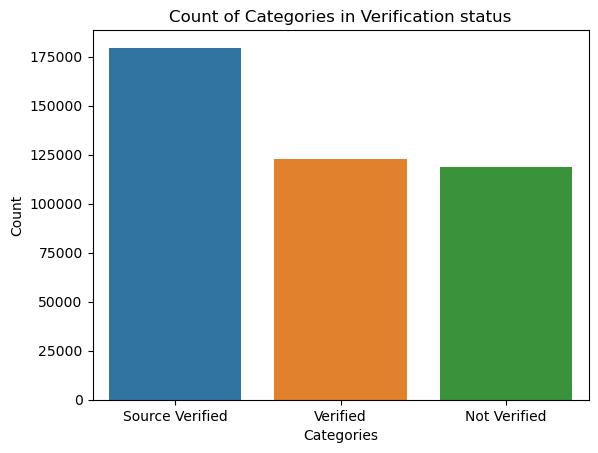

In [14]:
sns.countplot(data=df, x="verification_status")
plt.title("Count of Categories in Verification status")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.show()

In [9]:
df["verification_status"].value_counts()

Source Verified    179565
Verified           123016
Not Verified       118513
Name: verification_status, dtype: int64

In [11]:
#issue_d
df["issue_d"].unique(),df["issue_d"].nunique()

(array(['Sep-15', 'Aug-15', 'Jul-15', 'Jun-15', 'May-15', 'Apr-15',
        'Mar-15', 'Feb-15', 'Jan-15', 'Dec-15', 'Nov-15', 'Oct-15'],
       dtype=object),
 12)

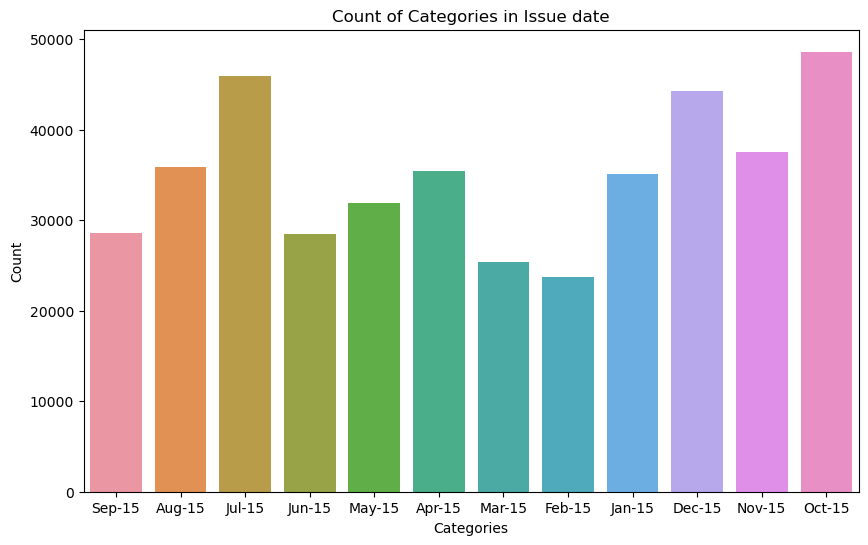

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="issue_d")
plt.title("Count of Categories in Issue date")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.show()

In [12]:
df["issue_d"].value_counts()

Oct-15    48631
Jul-15    45962
Dec-15    44342
Nov-15    37530
Aug-15    35886
Apr-15    35427
Jan-15    35107
May-15    31913
Sep-15    28641
Jun-15    28485
Mar-15    25400
Feb-15    23770
Name: issue_d, dtype: int64

In [ ]:
#url, desc >> it has more null data

In [13]:
#purpose
df["purpose"].unique(),df["purpose"].nunique()

(array(['debt_consolidation', 'credit_card', 'major_purchase',
        'small_business', 'home_improvement', 'moving', 'other', 'car',
        'medical', 'house', 'vacation', 'renewable_energy', 'wedding',
        'educational'], dtype=object),
 14)

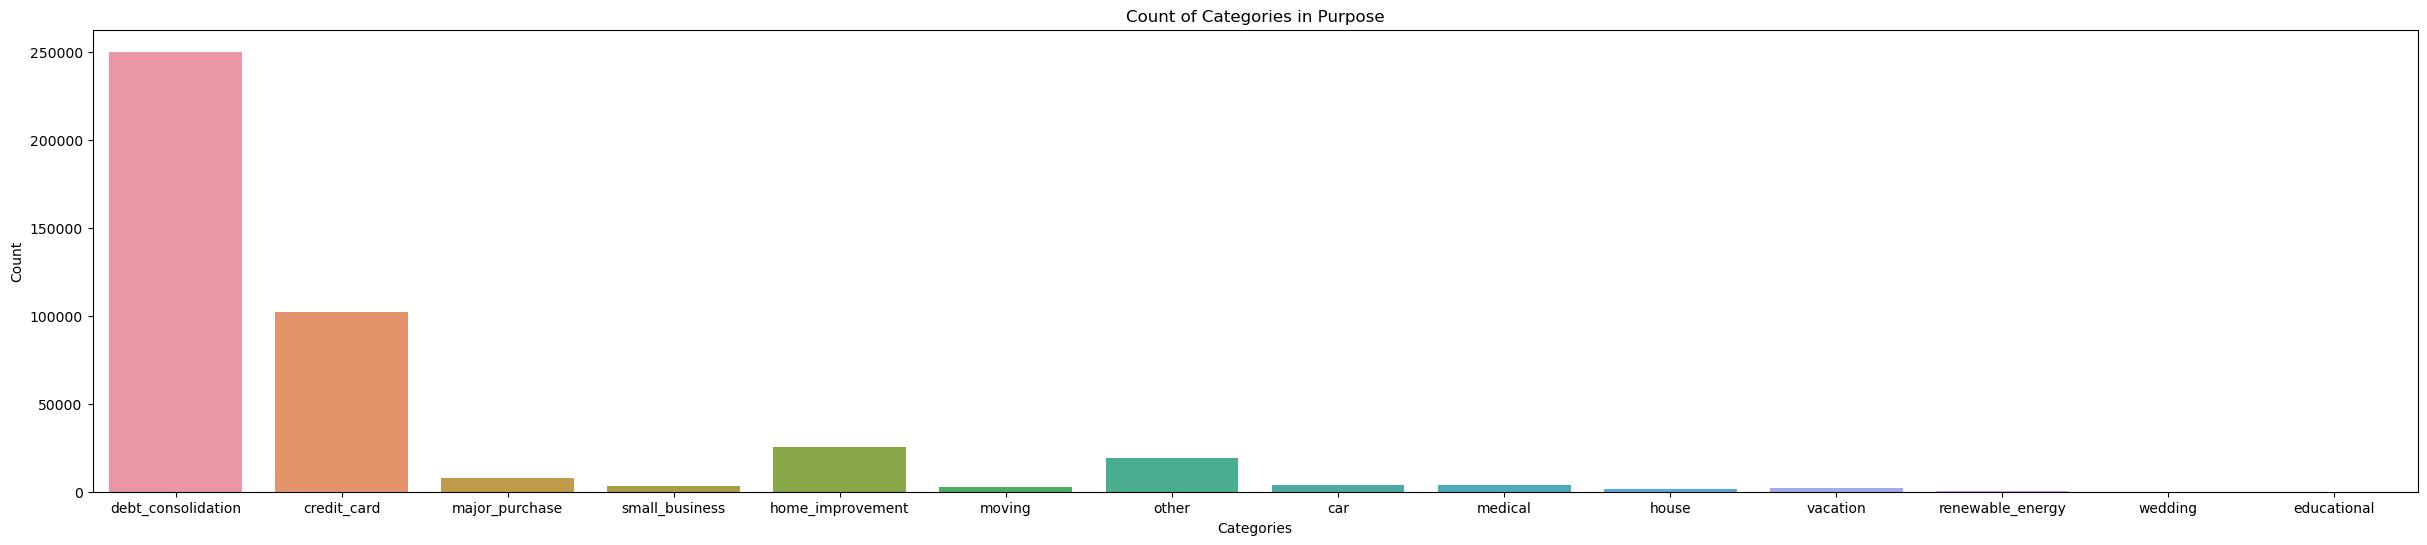

In [21]:
plt.figure(figsize=(30,6))
sns.countplot(data=df, x="purpose")
plt.title("Count of Categories in Purpose")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.show()

In [14]:
df["purpose"].value_counts()

debt_consolidation    250020
credit_card           102025
home_improvement       25292
other                  19204
major_purchase          7449
medical                 3938
car                     3466
small_business          3364
moving                  2420
vacation                2249
house                   1438
renewable_energy         224
wedding                    4
educational                1
Name: purpose, dtype: int64

In [ ]:
# df.select_dtypes(include=['object'])

In [16]:
#addr_state
df["addr_state"].unique(),df["addr_state"].nunique()

(array(['WI', 'VA', 'AL', 'MI', 'LA', 'IL', 'CA', 'MO', 'NY', 'GA', 'FL',
        'OH', 'TX', 'NC', 'CT', 'NJ', 'AR', 'MN', 'MD', 'HI', 'KS', 'TN',
        'AZ', 'OK', 'IN', 'SD', 'KY', 'PA', 'WA', 'WV', 'NV', 'UT', 'RI',
        'MA', 'SC', 'MS', 'CO', 'OR', 'DE', 'AK', 'NH', 'NM', 'WY', 'VT',
        'MT', 'DC', 'ME', 'ND', 'NE'], dtype=object),
 49)

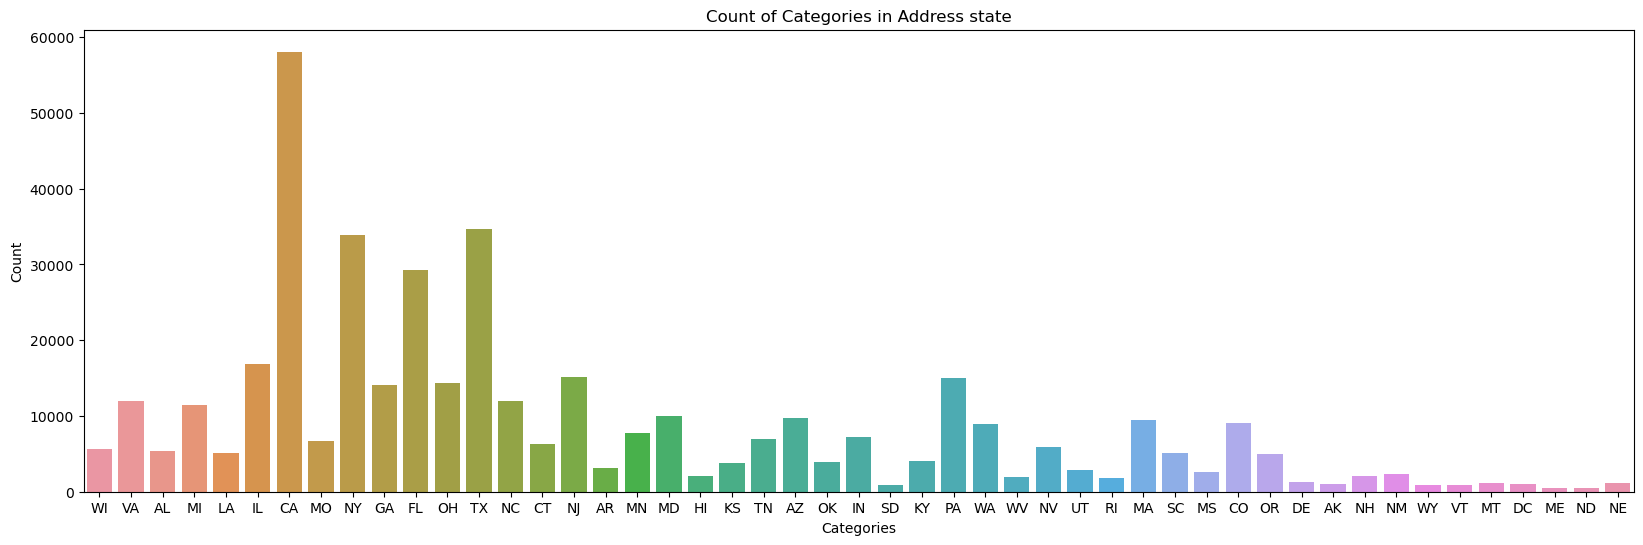

In [23]:
plt.figure(figsize=(20,6))
sns.countplot(data=df, x="addr_state")
plt.title("Count of Categories in Address state")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.show()

Text(0, 0.5, 'Frequency')

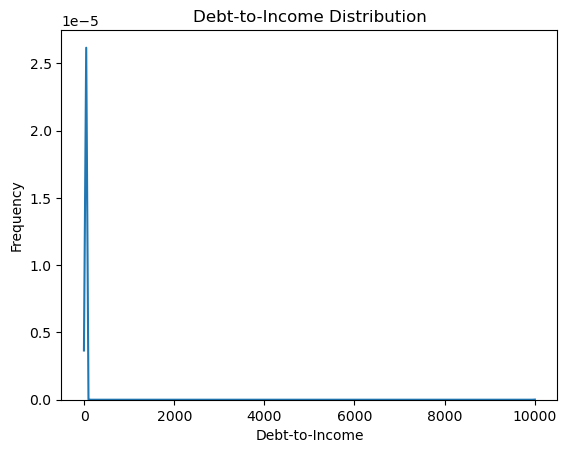

In [60]:
#dti
# sns.distplot(df["dti"])
sns.kdeplot(df["dti"]) 
plt.title('Debt-to-Income Distribution')
plt.xlabel('Debt-to-Income')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

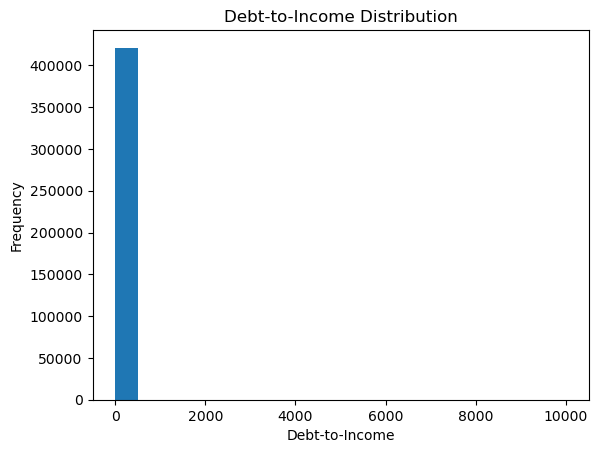

In [61]:
plt.hist(df['dti'], bins=20) # bins defines the number of equal-width bins in the range.
plt.title('Debt-to-Income Distribution')
plt.xlabel('Debt-to-Income')
plt.ylabel('Frequency')

Text(0.5, 0, 'Debt-to-Income')

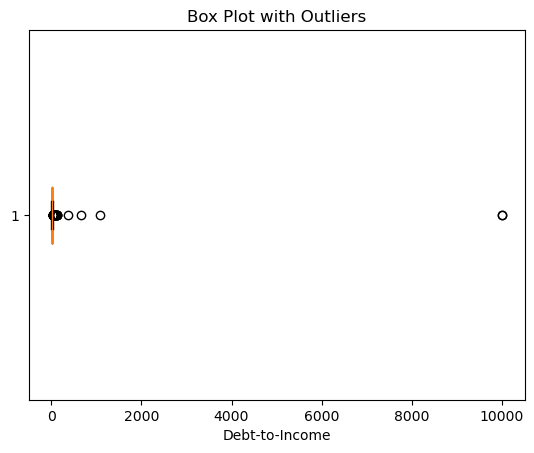

In [62]:
plt.boxplot(df['dti'], vert=False, showfliers=True)
plt.title('Box Plot with Outliers')
plt.xlabel('Debt-to-Income')

Text(0, 0.5, 'CDF')

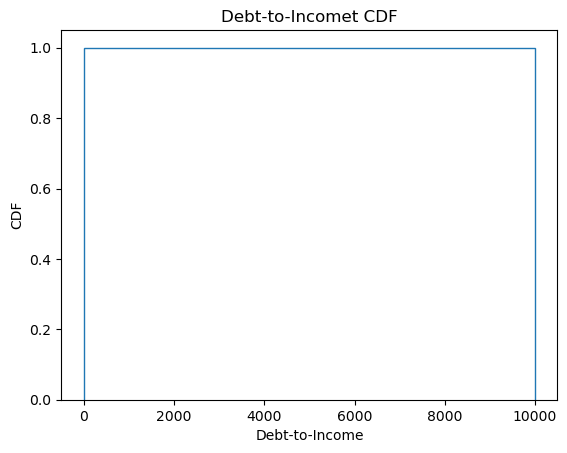

In [63]:
df['dti'].plot(kind='hist', cumulative=True, density=1, bins=100, histtype='step')
plt.title('Debt-to-Incomet CDF')
plt.xlabel('Debt-to-Income')
plt.ylabel('CDF')

In [64]:
corr = df.corr()
corr_dti = corr['dti'].sort_values(ascending=False)
corr_dti

dti                            1.000000
open_acc                       0.104365
mths_since_last_record         0.083465
total_acc                      0.080500
int_rate                       0.077946
revol_util                     0.065791
revol_bal                      0.048135
all_util                       0.034614
open_il_24m                    0.031041
open_il_6m                     0.028668
total_bal_il                   0.028134
total_rev_hi_lim               0.026439
total_rec_int                  0.025116
open_il_12m                    0.020348
out_prncp                      0.014635
out_prncp_inv                  0.014580
total_cu_tl                    0.011851
inq_fi                         0.011065
max_bal_bc                     0.010856
dti_joint                      0.006211
funded_amnt                    0.006105
loan_amnt                      0.006105
funded_amnt_inv                0.006045
member_id                      0.005807
id                             0.005694


In [59]:
# sns.boxplot(df["dti"])

<Axes: >

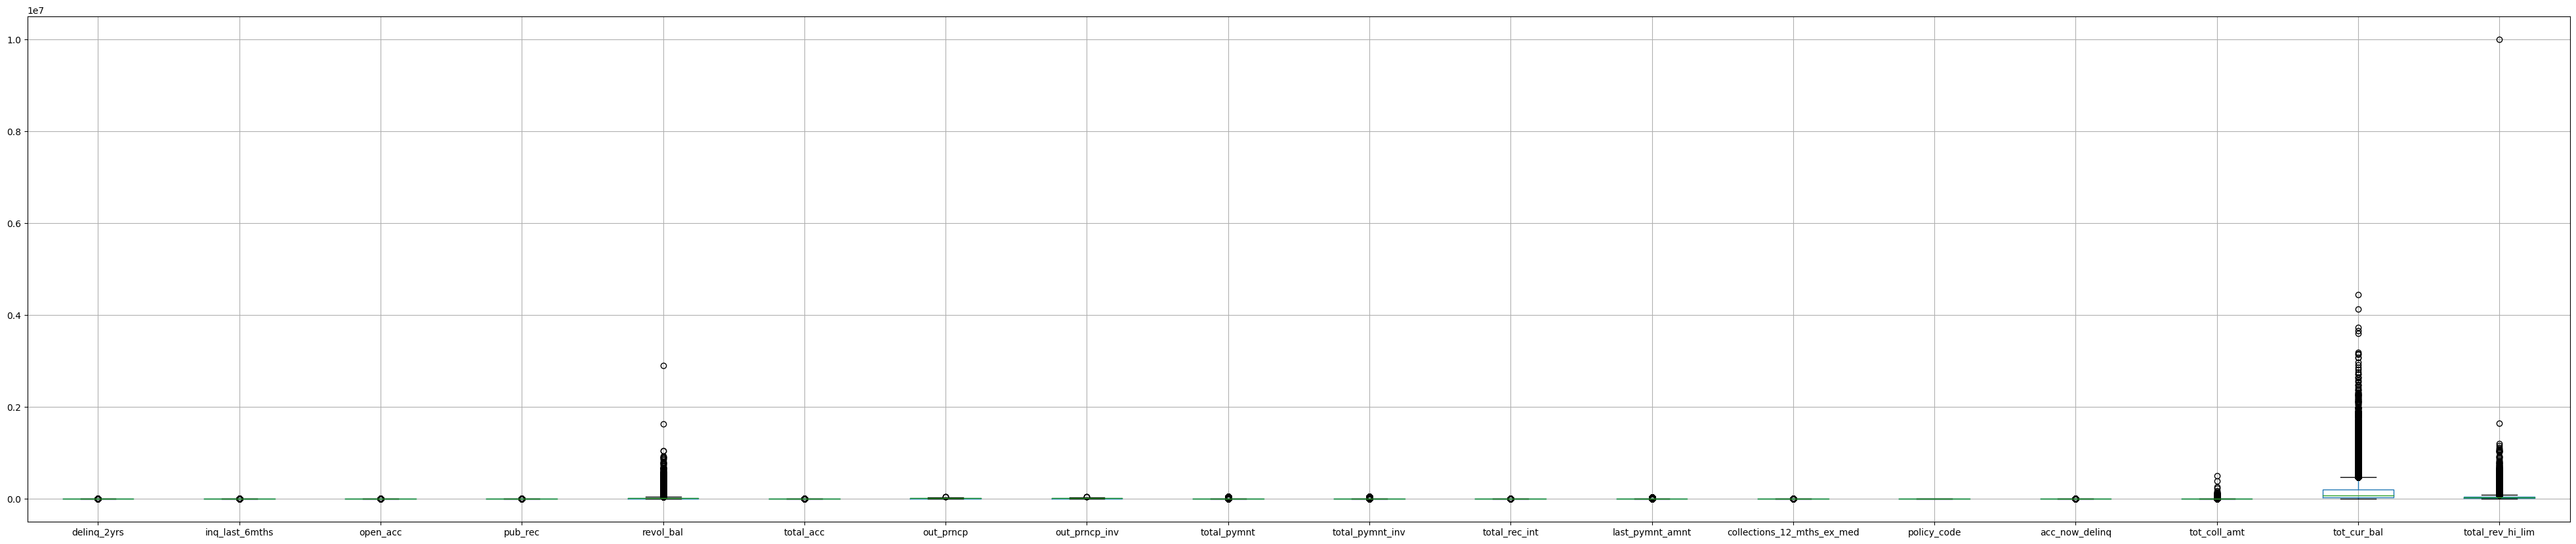

In [27]:
plt.figure(figsize=(50,10))
df[["delinq_2yrs","inq_last_6mths","open_acc","pub_rec","revol_bal","total_acc","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_int","last_pymnt_amnt","collections_12_mths_ex_med","policy_code","acc_now_delinq","tot_coll_amt","tot_cur_bal","total_rev_hi_lim"]].boxplot()

In [ ]:
#Observation:
    #In Above features has outlier except policy_code

Text(0, 0.5, 'Frequency')

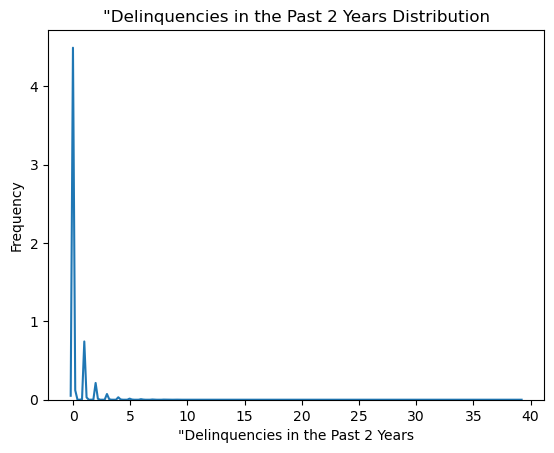

In [67]:
#delinq_2yrs
# sns.distplot(df["delinq_2yrs"])
sns.kdeplot(df["delinq_2yrs"]) 
plt.title('"Delinquencies in the Past 2 Years Distribution')
plt.xlabel('"Delinquencies in the Past 2 Years')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

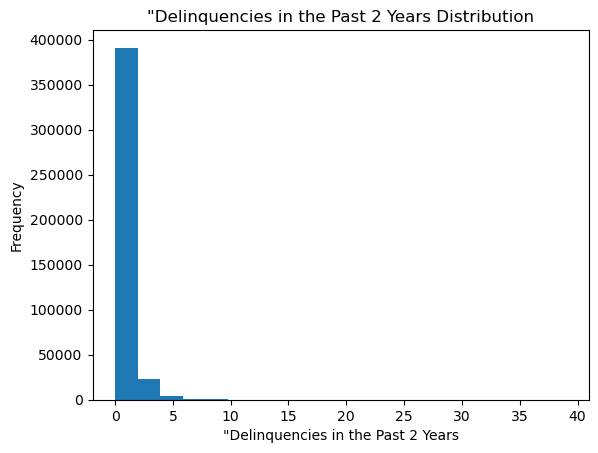

In [68]:
plt.hist(df['delinq_2yrs'], bins=20) # bins defines the number of equal-width bins in the range.
plt.title('"Delinquencies in the Past 2 Years Distribution')
plt.xlabel('"Delinquencies in the Past 2 Years')
plt.ylabel('Frequency')

Text(0.5, 0, '"Delinquencies in the Past 2 Years')

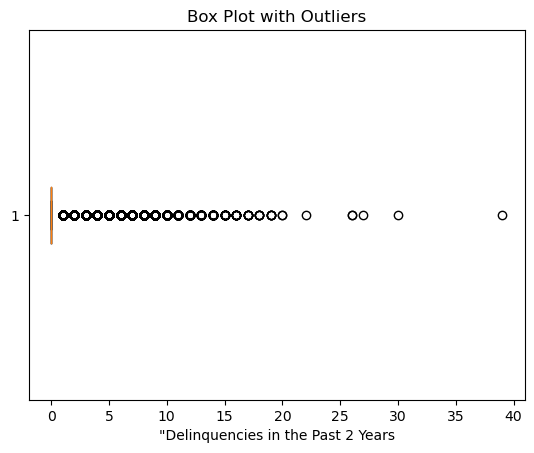

In [69]:
plt.boxplot(df['delinq_2yrs'], vert=False, showfliers=True)
plt.title('Box Plot with Outliers')
plt.xlabel('"Delinquencies in the Past 2 Years')
# sns.boxplot(df["delinq_2yrs"])

Text(0, 0.5, 'CDF')

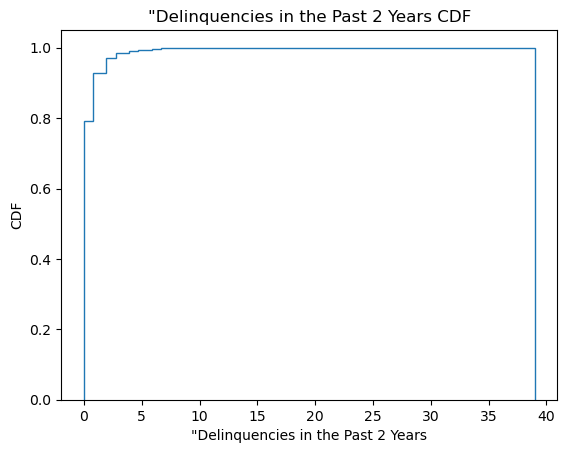

In [70]:
df['delinq_2yrs'].plot(kind='hist', cumulative=True, density=1, bins=100, histtype='step')
plt.title('"Delinquencies in the Past 2 Years CDF')
plt.xlabel('"Delinquencies in the Past 2 Years')
plt.ylabel('CDF')

In [71]:
corr = df.corr()
corr_delinq_2yrs = corr['delinq_2yrs'].sort_values(ascending=False)
corr_delinq_2yrs

delinq_2yrs                    1.000000
acc_now_delinq                 0.132685
total_acc                      0.114623
collections_12_mths_ex_med     0.076925
annual_inc_joint               0.070480
total_bal_il                   0.061545
tot_cur_bal                    0.058155
open_il_6m                     0.055043
int_rate                       0.043716
inq_fi                         0.040830
open_acc                       0.040006
annual_inc                     0.037910
inq_last_6mths                 0.036138
inq_last_12m                   0.034490
total_rec_late_fee             0.017292
dti_joint                      0.015827
total_cu_tl                    0.014746
total_rec_int                  0.013299
mths_since_rcnt_il             0.004989
all_util                       0.003157
id                             0.002302
member_id                      0.002263
open_acc_6m                    0.001994
tot_coll_amt                   0.000762
recoveries                     0.000085


In [30]:
#earliest_cr_line
df["earliest_cr_line"].unique(),df["earliest_cr_line"].nunique()

(array(['Sep-00', 'Sep-02', 'Feb-06', 'Oct-99', 'Nov-99', 'May-98',
        'Feb-84', 'Mar-09', 'Jun-04', 'Jul-00', 'Aug-97', 'Jul-85',
        'Apr-96', 'Oct-03', 'Aug-01', 'Feb-10', 'Aug-96', 'Aug-03',
        'Jan-97', 'Apr-98', 'Nov-08', 'Jun-83', 'Feb-00', 'Jul-96',
        'Nov-01', 'Jun-01', 'Feb-05', 'Oct-05', 'Mar-06', 'Nov-89',
        'Feb-97', 'Jan-92', 'May-02', 'Apr-06', 'Feb-11', 'Feb-98',
        'Aug-04', 'Sep-99', 'Oct-96', 'Nov-98', 'Sep-05', 'Aug-07',
        'Jan-05', 'Jun-00', 'Jul-08', 'Mar-02', 'Dec-98', 'Feb-07',
        'Dec-05', 'Jun-02', 'Jul-06', 'Dec-88', 'Nov-94', 'Nov-96',
        'Aug-11', 'Oct-95', 'Sep-03', 'Aug-02', 'Dec-84', 'Jun-95',
        'Oct-00', 'Dec-87', 'Feb-78', 'Feb-04', 'Oct-01', 'Mar-05',
        'Sep-97', 'Mar-01', 'Jan-81', 'Mar-98', 'Mar-00', 'Mar-03',
        'Mar-08', 'Mar-85', 'Nov-10', 'Aug-89', 'Dec-11', 'Dec-89',
        'Dec-02', 'May-99', 'Jan-87', 'Sep-08', 'Oct-04', 'Nov-00',
        'Sep-95', 'Aug-94', 'Jul-07', 'Jun-86', 

In [ ]:
# we can apply bining on earliest_cr_line. 

Text(0, 0.5, 'Frequency')

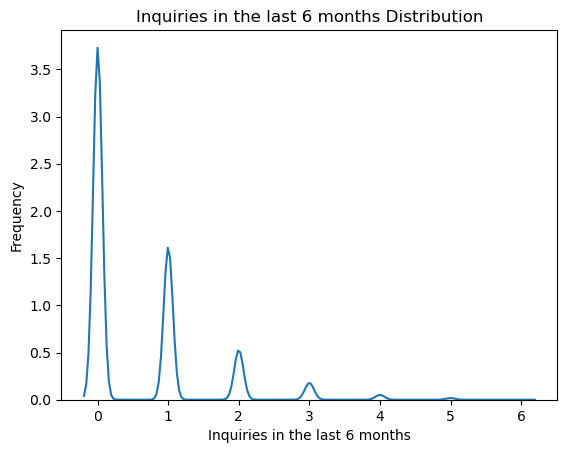

In [73]:
#inq_last_6mths
# sns.distplot(df["inq_last_6mths"])
sns.kdeplot(df["inq_last_6mths"]) 
plt.title('Inquiries in the last 6 months Distribution')
plt.xlabel('Inquiries in the last 6 months')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

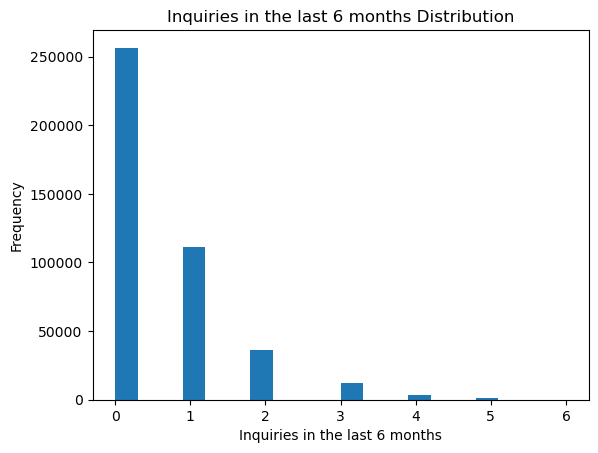

In [74]:
plt.hist(df['inq_last_6mths'], bins=20) # bins defines the number of equal-width bins in the range.
plt.title('Inquiries in the last 6 months Distribution')
plt.xlabel('Inquiries in the last 6 months')
plt.ylabel('Frequency')

Text(0.5, 0, 'Inquiries in the last 6 months')

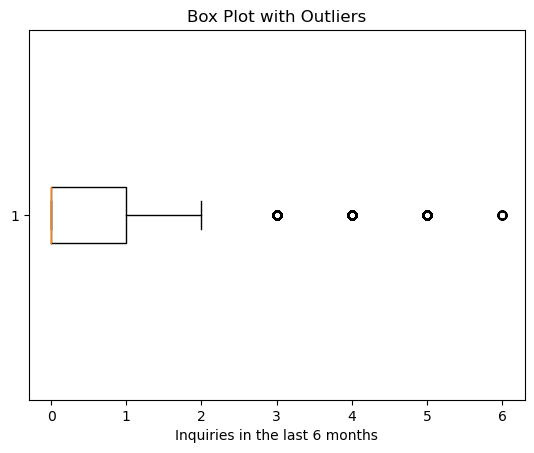

In [75]:
# sns.boxplot(df["inq_last_6mths"])
plt.boxplot(df['inq_last_6mths'], vert=False, showfliers=True)
plt.title('Box Plot with Outliers')
plt.xlabel('Inquiries in the last 6 months')

Text(0, 0.5, 'CDF')

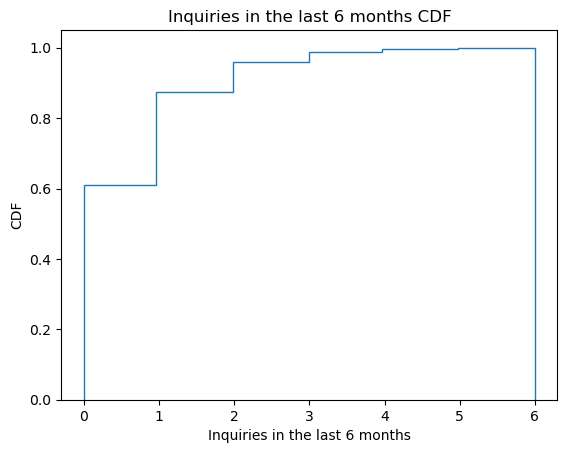

In [77]:
df['inq_last_6mths'].plot(kind='hist', cumulative=True, density=1, bins=100, histtype='step')
plt.title('Inquiries in the last 6 months CDF')
plt.xlabel('Inquiries in the last 6 months')
plt.ylabel('CDF')

In [78]:
corr = df.corr()
corr_inq_last_6mths = corr['inq_last_6mths'].sort_values(ascending=False)
corr_inq_last_6mths

inq_last_6mths                 1.000000
inq_last_12m                   0.484762
open_acc_6m                    0.439006
open_rv_12m                    0.356947
open_rv_24m                    0.312654
int_rate                       0.231124
inq_fi                         0.206920
total_acc                      0.161029
open_acc                       0.159146
open_il_12m                    0.149877
open_il_24m                    0.127180
pub_rec                        0.097381
il_util                        0.075680
annual_inc_joint               0.052842
total_bal_il                   0.052412
open_il_6m                     0.039836
total_rec_int                  0.039642
delinq_2yrs                    0.036138
total_cu_tl                    0.032530
mths_since_last_major_derog    0.031239
last_pymnt_amnt                0.027074
mths_since_last_delinq         0.026783
collections_12_mths_ex_med     0.025801
annual_inc                     0.022990
tot_coll_amt                   0.020749


In [ ]:
#mths_since_last_delinq  and mths_since_last_record have missing values

Text(0, 0.5, 'Frequency')

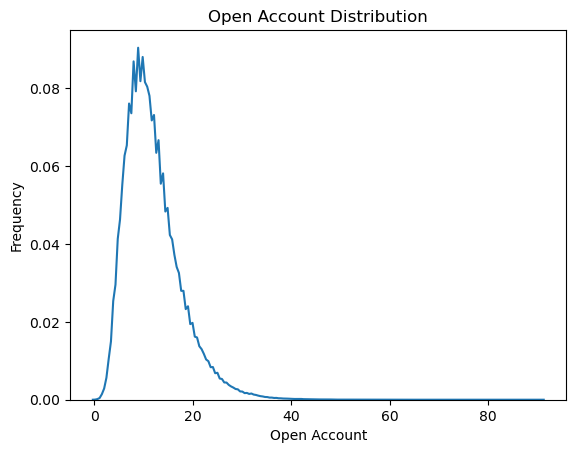

In [82]:
#open_acc
# sns.distplot(df["open_acc"])
sns.kdeplot(df["open_acc"]) 
plt.title('Open Account Distribution')
plt.xlabel('Open Account')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

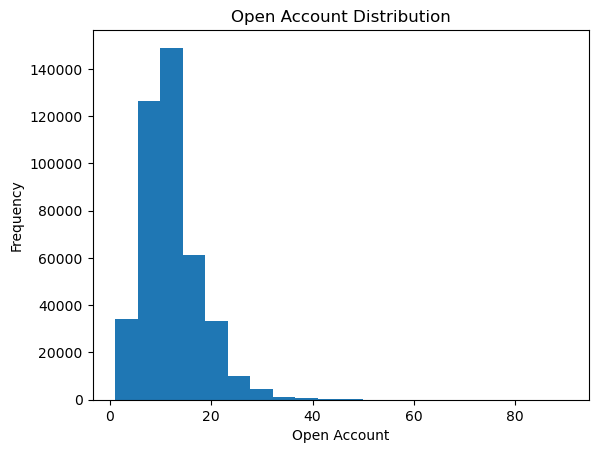

In [83]:
plt.hist(df['open_acc'], bins=20) # bins defines the number of equal-width bins in the range.
plt.title('Open Account Distribution')
plt.xlabel('Open Account')
plt.ylabel('Frequency')

Text(0.5, 0, 'Open Account')

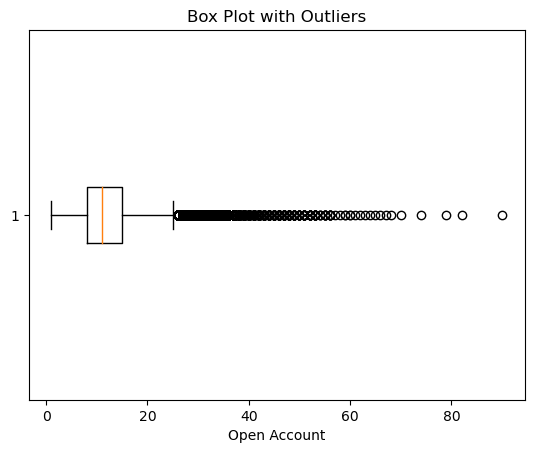

In [84]:
# sns.boxplot(df["open_acc"])
plt.boxplot(df['open_acc'], vert=False, showfliers=True)
plt.title('Box Plot with Outliers')
plt.xlabel('Open Account')

Text(0, 0.5, 'CDF')

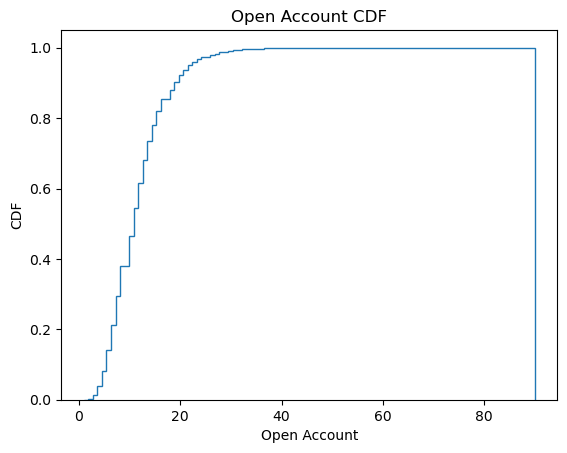

In [85]:
df['open_acc'].plot(kind='hist', cumulative=True, density=1, bins=100, histtype='step')
plt.title('Open Account CDF')
plt.xlabel('Open Account')
plt.ylabel('CDF')

In [86]:
corr = df.corr()
corr_open_acc = corr['open_acc'].sort_values(ascending=False)
corr_open_acc

open_acc                       1.000000
total_acc                      0.709499
open_il_6m                     0.515508
open_rv_24m                    0.458349
total_rev_hi_lim               0.353092
open_rv_12m                    0.345658
total_bal_il                   0.339452
open_acc_6m                    0.272024
dti_joint                      0.248634
tot_cur_bal                    0.245250
revol_bal                      0.222988
open_il_24m                    0.222188
annual_inc_joint               0.212462
loan_amnt                      0.188211
funded_amnt                    0.188211
funded_amnt_inv                0.188208
inq_last_12m                   0.175941
installment                    0.170000
out_prncp_inv                  0.167713
out_prncp                      0.167710
inq_last_6mths                 0.159146
open_il_12m                    0.142777
il_util                        0.126172
annual_inc                     0.122328
dti                            0.104365


Text(0, 0.5, 'Frequency')

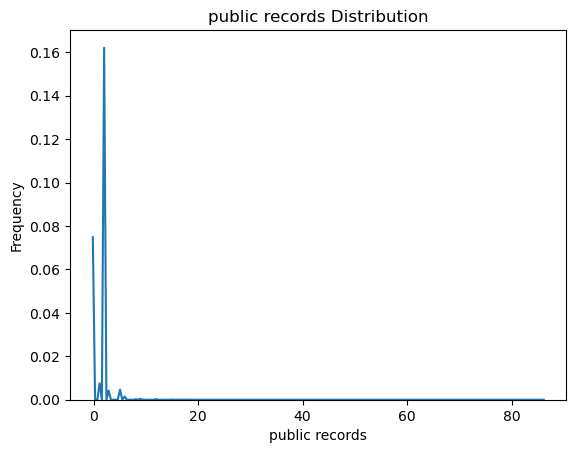

In [89]:
#pub_rec 
# sns.distplot(df["pub_rec"])
sns.kdeplot(df["pub_rec"]) 
plt.title('public records Distribution')
plt.xlabel('public records')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

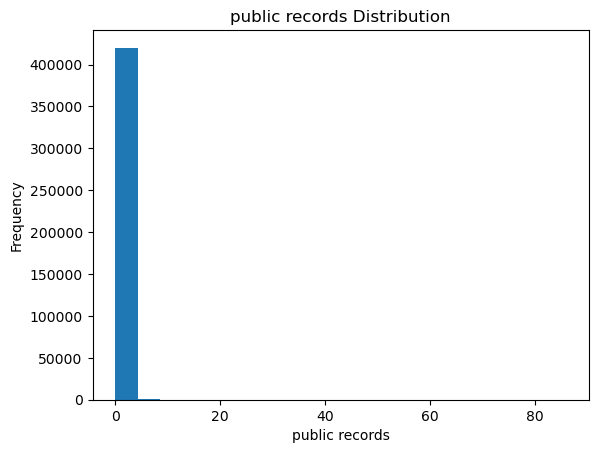

In [90]:
plt.hist(df['pub_rec'], bins=20) # bins defines the number of equal-width bins in the range.
plt.title('public records Distribution')
plt.xlabel('public records')
plt.ylabel('Frequency')

Text(0.5, 0, 'public records')

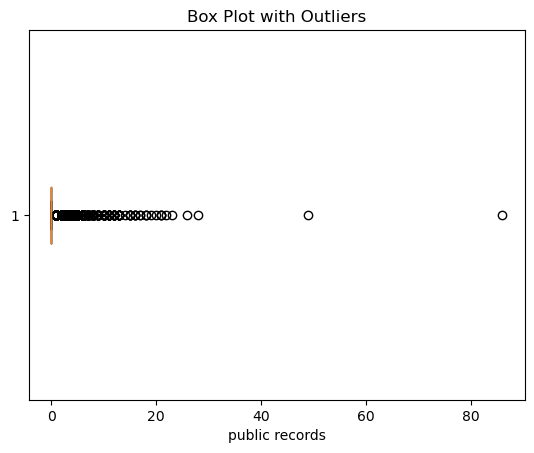

In [91]:
# sns.boxplot(df["pub_rec"])
plt.boxplot(df['pub_rec'], vert=False, showfliers=True)
plt.title('Box Plot with Outliers')
plt.xlabel('public records')

Text(0, 0.5, 'CDF')

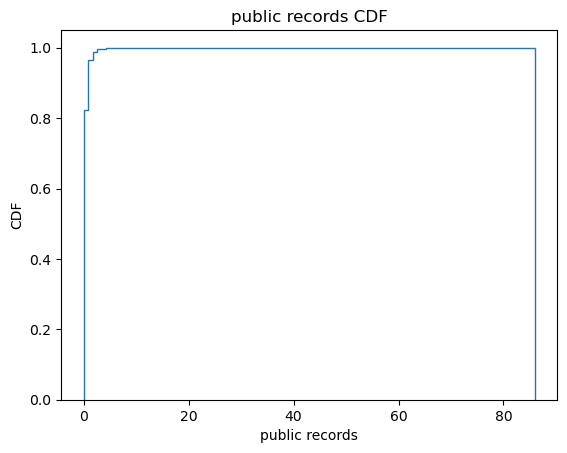

In [92]:
df['pub_rec'].plot(kind='hist', cumulative=True, density=1, bins=100, histtype='step')
plt.title('public records CDF')
plt.xlabel('public records')
plt.ylabel('CDF')

In [93]:
corr = df.corr()
corr_pub_rec = corr['pub_rec'].sort_values(ascending=False)
corr_pub_rec

pub_rec                        1.000000
open_rv_24m                    0.120791
mths_since_last_major_derog    0.109844
inq_last_12m                   0.108040
mths_since_last_delinq         0.103950
open_rv_12m                    0.102563
inq_last_6mths                 0.097381
open_acc_6m                    0.069803
inq_fi                         0.060046
int_rate                       0.058158
open_il_12m                    0.052021
open_il_24m                    0.043718
tot_coll_amt                   0.035377
il_util                        0.021357
collections_12_mths_ex_med     0.016719
total_acc                      0.014886
annual_inc_joint               0.006546
member_id                      0.003636
id                             0.003502
collection_recovery_fee       -0.001076
total_rec_late_fee            -0.001249
recoveries                    -0.001609
acc_now_delinq                -0.002458
total_cu_tl                   -0.003349
annual_inc                    -0.006739


Text(0, 0.5, 'Frequency')

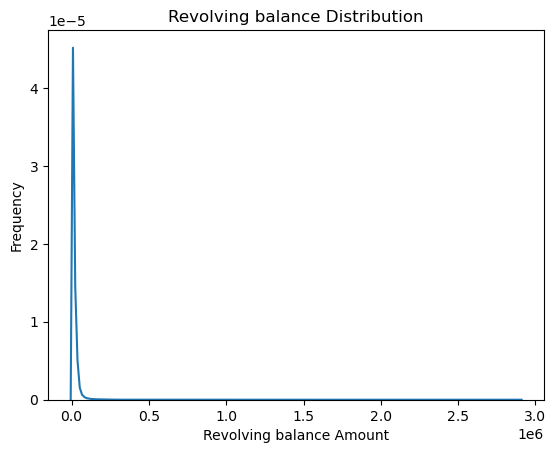

In [96]:
#revol_bal
# sns.distplot(df["revol_bal"])
sns.kdeplot(df["revol_bal"]) 
plt.title('Revolving balance Distribution')
plt.xlabel('Revolving balance Amount')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

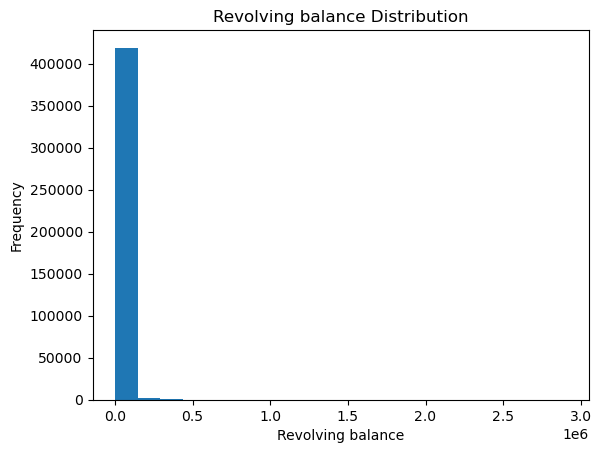

In [97]:
plt.hist(df['revol_bal'], bins=20) # bins defines the number of equal-width bins in the range.
plt.title('Revolving balance Distribution')
plt.xlabel('Revolving balance')
plt.ylabel('Frequency')

Text(0.5, 0, 'Revolving balance')

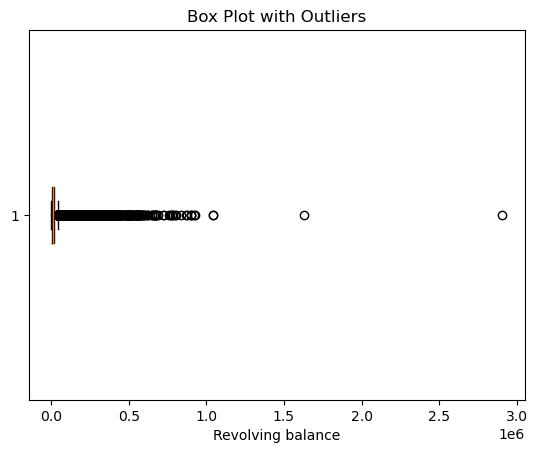

In [98]:
# sns.boxplot(df["revol_bal"])
plt.boxplot(df['revol_bal'], vert=False, showfliers=True)
plt.title('Box Plot with Outliers')
plt.xlabel('Revolving balance')

Text(0, 0.5, 'CDF')

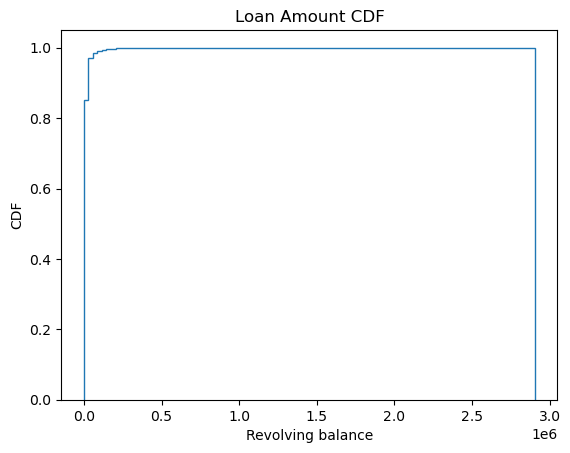

In [99]:
df['revol_bal'].plot(kind='hist', cumulative=True, density=1, bins=100, histtype='step')
plt.title('Loan Amount CDF')
plt.xlabel('Revolving balance')
plt.ylabel('CDF')

In [100]:
corr = df.corr()
corr_revol_bal = corr['revol_bal'].sort_values(ascending=False)
corr_revol_bal

revol_bal                      1.000000
total_rev_hi_lim               0.833429
max_bal_bc                     0.582009
tot_cur_bal                    0.455735
funded_amnt_inv                0.334665
loan_amnt                      0.334658
funded_amnt                    0.334658
installment                    0.314097
out_prncp_inv                  0.297902
out_prncp                      0.297880
annual_inc_joint               0.292057
annual_inc                     0.270174
revol_util                     0.230266
open_acc                       0.222988
dti_joint                      0.209837
total_acc                      0.180191
total_rec_int                  0.146993
total_pymnt                    0.117601
total_pymnt_inv                0.117593
all_util                       0.104584
total_rec_prncp                0.093863
total_bal_il                   0.068121
dti                            0.048135
last_pymnt_amnt                0.046028
mths_since_rcnt_il             0.032370


In [ ]:
#revol_util has missing values

Text(0, 0.5, 'Frequency')

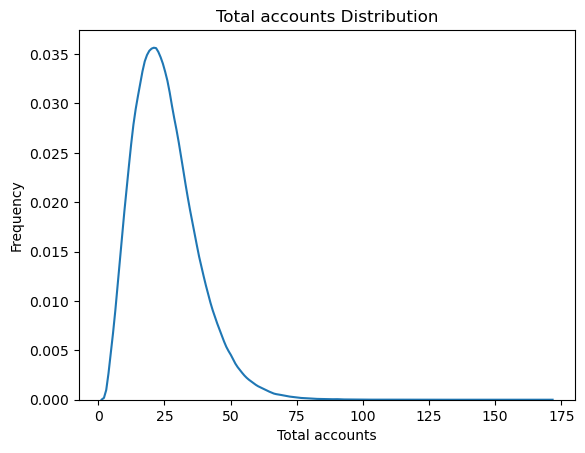

In [103]:
#total_acc 
# sns.distplot(df["total_acc"])
sns.kdeplot(df["total_acc"]) 
plt.title('Total accounts Distribution')
plt.xlabel('Total accounts')
plt.ylabel('Frequency')

Text(0, 0.5, 'Total accounts')

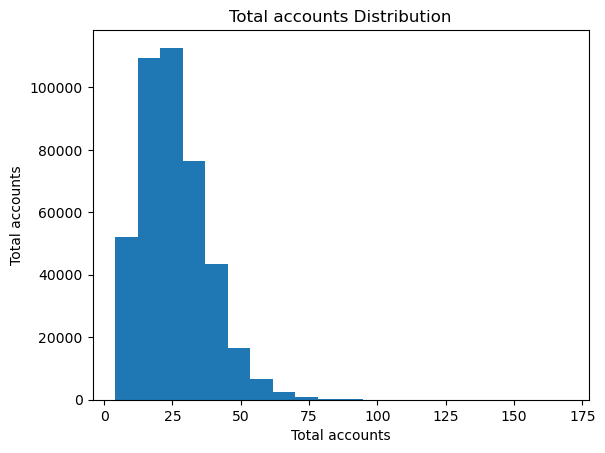

In [104]:
plt.hist(df['total_acc'], bins=20) # bins defines the number of equal-width bins in the range.
plt.title('Total accounts Distribution')
plt.xlabel('Total accounts')
plt.ylabel('Total accounts')

Text(0.5, 0, 'Total accounts')

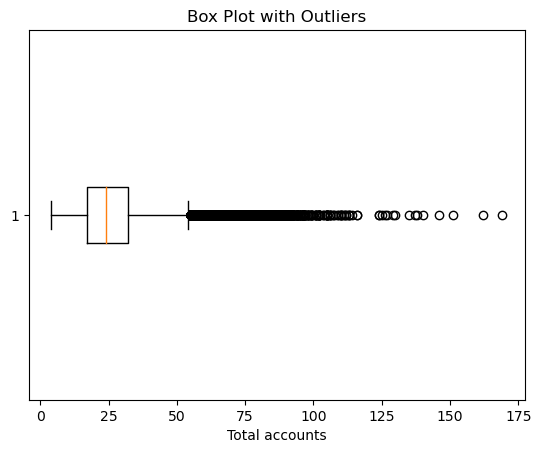

In [105]:
plt.boxplot(df['total_acc'], vert=False, showfliers=True)
plt.title('Box Plot with Outliers')
plt.xlabel('Total accounts')
# sns.boxplot(df["total_acc"])

Text(0, 0.5, 'CDF')

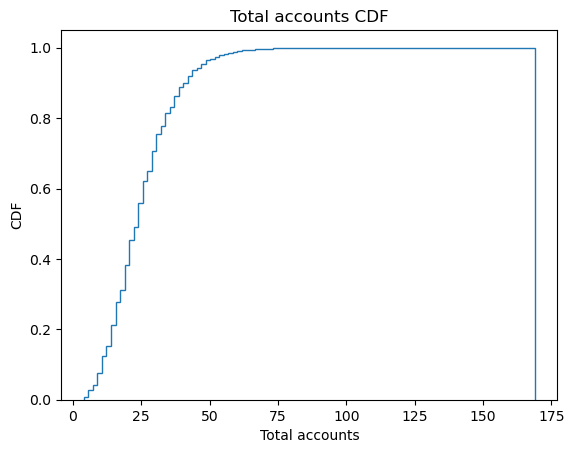

In [106]:
df['total_acc'].plot(kind='hist', cumulative=True, density=1, bins=100, histtype='step')
plt.title('Total accounts CDF')
plt.xlabel('Total accounts')
plt.ylabel('CDF')

In [107]:
corr = df.corr()
corr_total_acc = corr['total_acc'].sort_values(ascending=False)
corr_total_acc

total_acc                      1.000000
open_acc                       0.709499
total_bal_il                   0.410463
open_il_6m                     0.381588
open_il_24m                    0.327416
open_rv_24m                    0.322951
tot_cur_bal                    0.305456
total_rev_hi_lim               0.277593
total_cu_tl                    0.264322
open_acc_6m                    0.255894
open_rv_12m                    0.251004
open_il_12m                    0.229534
dti_joint                      0.228740
annual_inc_joint               0.218706
inq_last_12m                   0.210662
funded_amnt_inv                0.208463
loan_amnt                      0.208429
funded_amnt                    0.208429
installment                    0.183521
revol_bal                      0.180191
out_prncp_inv                  0.170486
out_prncp                      0.170450
inq_last_6mths                 0.161029
annual_inc                     0.159804
inq_fi                         0.150300


In [43]:
#initial_list_status
df["initial_list_status"].unique(),df["initial_list_status"].nunique()

(array(['w', 'f'], dtype=object), 2)

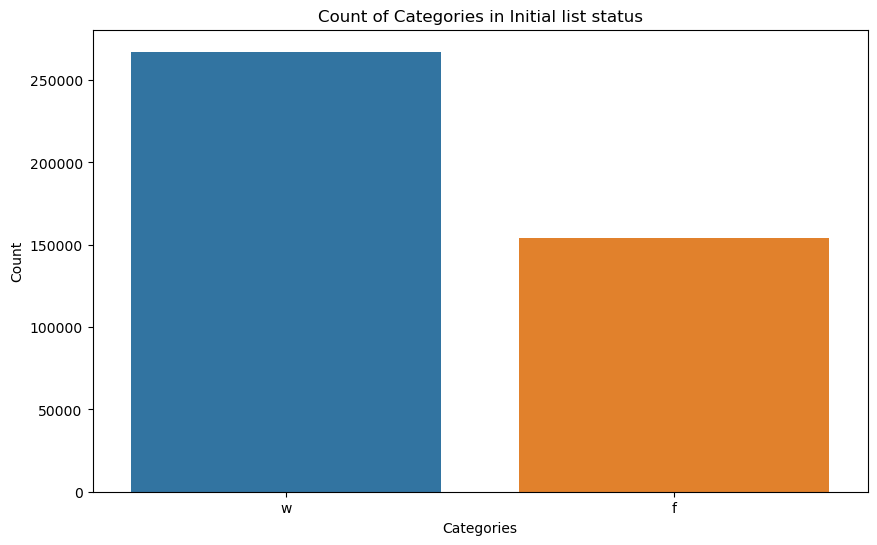

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="initial_list_status")
plt.title("Count of Categories in Initial list status")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.show()

In [44]:
df["initial_list_status"].value_counts()

w    267251
f    153843
Name: initial_list_status, dtype: int64

Text(0, 0.5, 'Frequency')

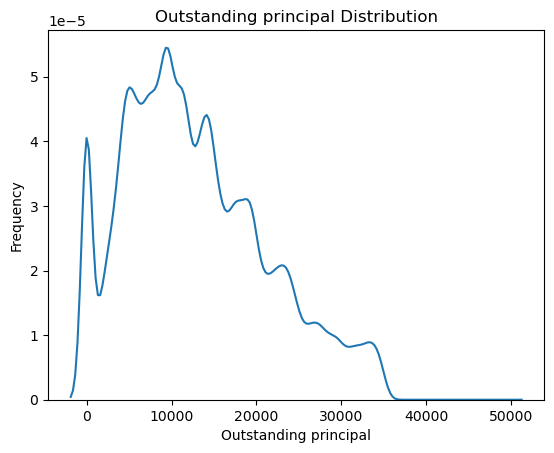

In [110]:
#out_prncp
# sns.distplot(df["out_prncp"])
sns.kdeplot(df["out_prncp"]) 
plt.title('Outstanding principal Distribution')
plt.xlabel('Outstanding principal')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

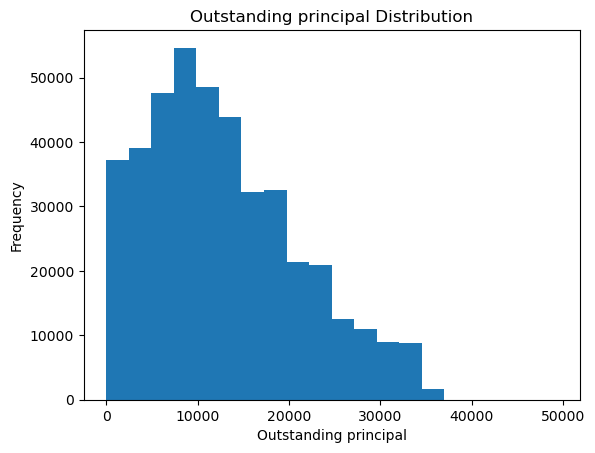

In [111]:
plt.hist(df['out_prncp'], bins=20) # bins defines the number of equal-width bins in the range.
plt.title('Outstanding principal Distribution')
plt.xlabel('Outstanding principal')
plt.ylabel('Frequency')

Text(0.5, 0, 'Outstanding principal')

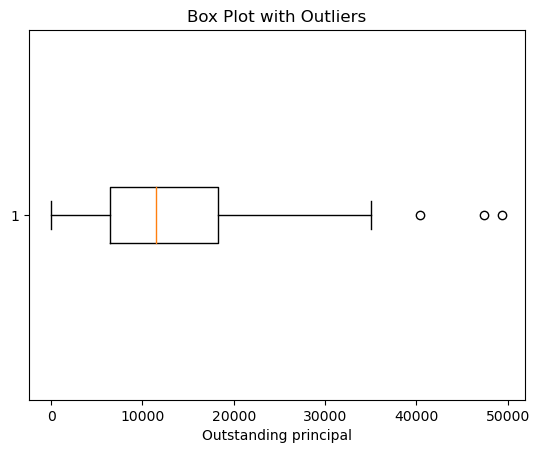

In [112]:
# sns.boxplot(df["out_prncp"])
plt.boxplot(df['out_prncp'], vert=False, showfliers=True)
plt.title('Box Plot with Outliers')
plt.xlabel('Outstanding principal')

Text(0, 0.5, 'CDF')

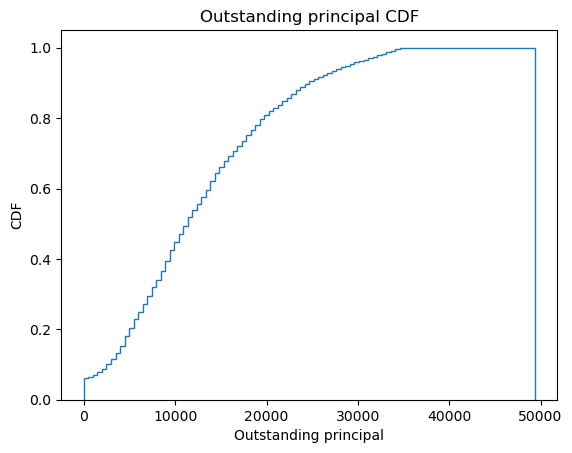

In [113]:
df['out_prncp'].plot(kind='hist', cumulative=True, density=1, bins=100, histtype='step')
plt.title('Outstanding principal CDF')
plt.xlabel('Outstanding principal')
plt.ylabel('CDF')

In [114]:
corr = df.corr()
corr_out_prncp = corr['out_prncp'].sort_values(ascending=False)
corr_out_prncp

out_prncp                      1.000000
out_prncp_inv                  0.999995
loan_amnt                      0.882686
funded_amnt                    0.882686
funded_amnt_inv                0.882614
installment                    0.805798
total_rec_int                  0.462235
annual_inc_joint               0.430541
max_bal_bc                     0.408794
revol_bal                      0.297880
total_rev_hi_lim               0.287443
tot_cur_bal                    0.280165
annual_inc                     0.263559
total_acc                      0.170450
id                             0.169929
member_id                      0.169368
open_acc                       0.167710
total_bal_il                   0.133827
revol_util                     0.129882
int_rate                       0.126143
total_cu_tl                    0.065777
open_il_6m                     0.026444
open_il_24m                    0.022809
all_util                       0.020830
dti_joint                      0.019444


Text(0, 0.5, 'Frequency')

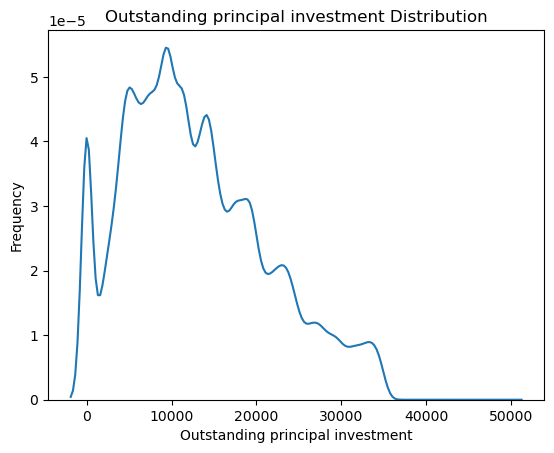

In [117]:
#out_prncp_inv
# sns.distplot(df["out_prncp_inv"])
sns.kdeplot(df["out_prncp_inv"]) 
plt.title('Outstanding principal investment Distribution')
plt.xlabel('Outstanding principal investment')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

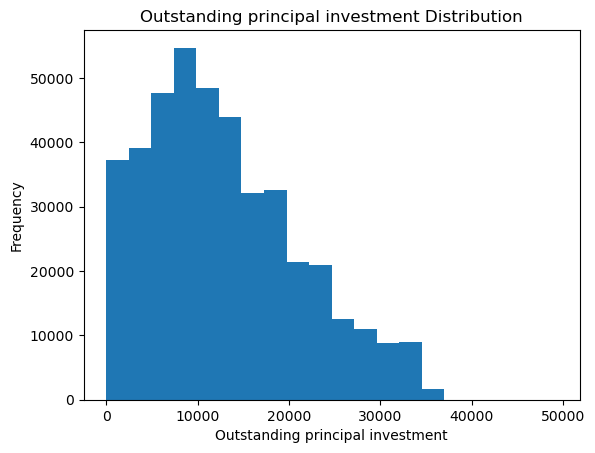

In [118]:
plt.hist(df['out_prncp_inv'], bins=20) # bins defines the number of equal-width bins in the range.
plt.title('Outstanding principal investment Distribution')
plt.xlabel('Outstanding principal investment')
plt.ylabel('Frequency')

Text(0.5, 0, 'Outstanding principal investment')

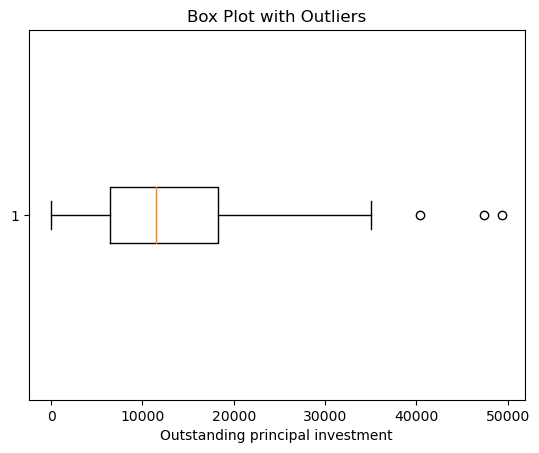

In [119]:
# sns.boxplot(df["out_prncp_inv"])
plt.boxplot(df['out_prncp_inv'], vert=False, showfliers=True)
plt.title('Box Plot with Outliers')
plt.xlabel('Outstanding principal investment')

Text(0, 0.5, 'CDF')

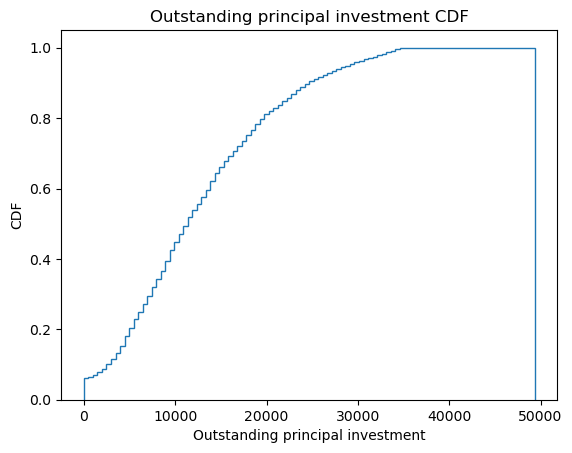

In [120]:
df['out_prncp_inv'].plot(kind='hist', cumulative=True, density=1, bins=100, histtype='step')
plt.title('Outstanding principal investment CDF')
plt.xlabel('Outstanding principal investment')
plt.ylabel('CDF')

In [121]:
corr = df.corr()
corr_out_prncp_inv = corr['out_prncp_inv'].sort_values(ascending=False)
corr_out_prncp_inv

out_prncp_inv                  1.000000
out_prncp                      0.999995
loan_amnt                      0.882718
funded_amnt                    0.882718
funded_amnt_inv                0.882656
installment                    0.805812
total_rec_int                  0.462356
annual_inc_joint               0.430856
max_bal_bc                     0.408894
revol_bal                      0.297902
total_rev_hi_lim               0.287533
tot_cur_bal                    0.280221
annual_inc                     0.263637
total_acc                      0.170486
id                             0.169716
member_id                      0.169156
open_acc                       0.167713
total_bal_il                   0.133791
revol_util                     0.129767
int_rate                       0.125800
total_cu_tl                    0.065797
open_il_6m                     0.026408
open_il_24m                    0.022660
all_util                       0.020630
dti_joint                      0.019139


Text(0, 0.5, 'Frequency')

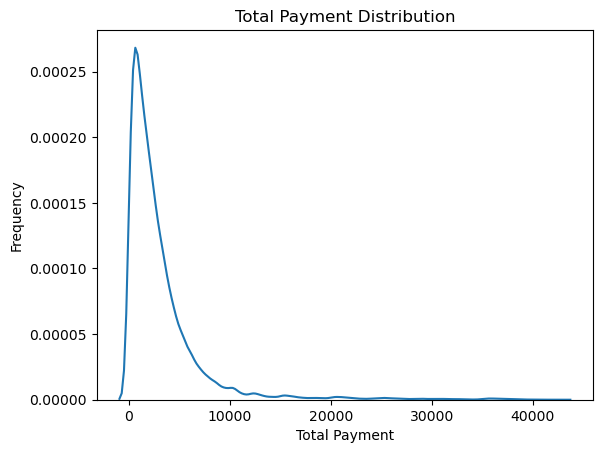

In [124]:
#total_pymnt 
# sns.distplot(df["total_pymnt"])
sns.kdeplot(df["total_pymnt"]) 
plt.title('Total Payment Distribution')
plt.xlabel('Total Payment')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

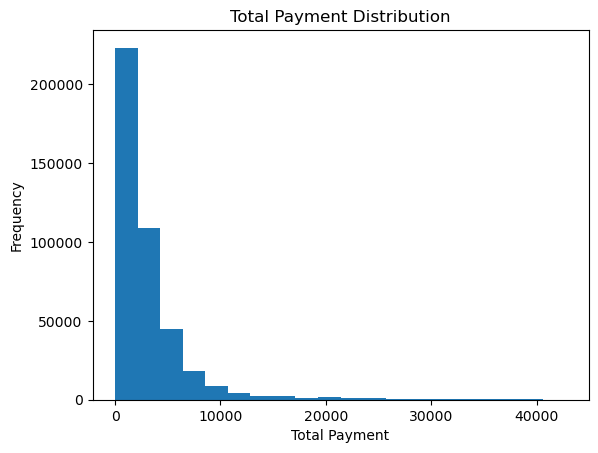

In [125]:
plt.hist(df['total_pymnt'], bins=20) # bins defines the number of equal-width bins in the range.
plt.title('Total Payment Distribution')
plt.xlabel('Total Payment')
plt.ylabel('Frequency')

Text(0.5, 0, 'Total Payment')

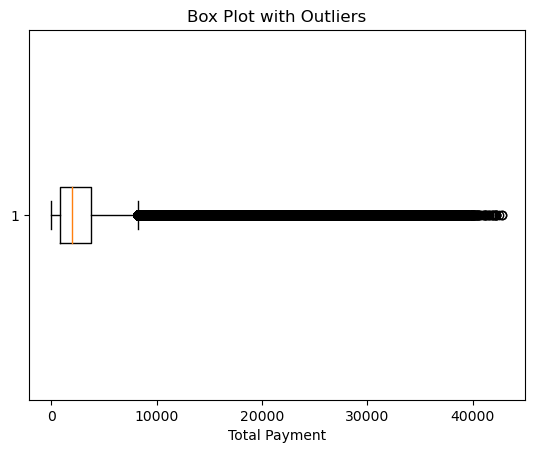

In [126]:
# sns.boxplot(df["total_pymnt"])
plt.boxplot(df['total_pymnt'], vert=False, showfliers=True)
plt.title('Box Plot with Outliers')
plt.xlabel('Total Payment')

Text(0, 0.5, 'CDF')

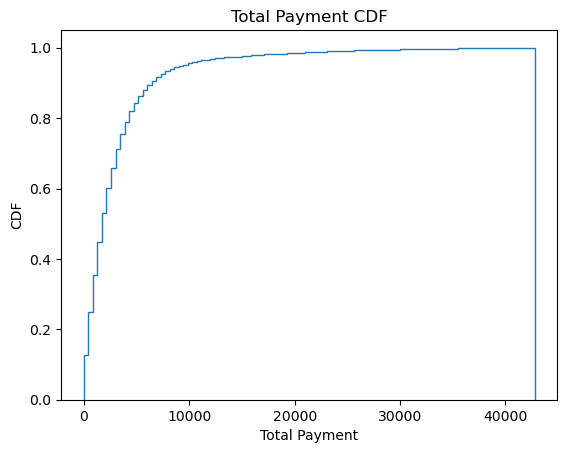

In [127]:
df['total_pymnt'].plot(kind='hist', cumulative=True, density=1, bins=100, histtype='step')
plt.title('Total Payment CDF')
plt.xlabel('Total Payment')
plt.ylabel('CDF')

In [128]:
corr = df.corr()
corr_total_pymnt = corr['total_pymnt'].sort_values(ascending=False)
corr_total_pymnt

total_pymnt                    1.000000
total_pymnt_inv                0.999999
total_rec_prncp                0.978827
last_pymnt_amnt                0.830924
total_rec_int                  0.462473
installment                    0.410702
funded_amnt_inv                0.387848
loan_amnt                      0.387697
funded_amnt                    0.387697
annual_inc_joint               0.136742
tot_cur_bal                    0.133052
annual_inc                     0.121741
total_rev_hi_lim               0.120639
revol_bal                      0.117601
total_acc                      0.105553
int_rate                       0.104737
open_acc                       0.068286
revol_util                     0.033503
total_cu_tl                    0.032413
mths_since_last_record         0.022723
total_rec_late_fee             0.022565
inq_fi                         0.020370
max_bal_bc                     0.018765
recoveries                     0.016314
inq_last_6mths                 0.015545


Text(0, 0.5, 'Frequency')

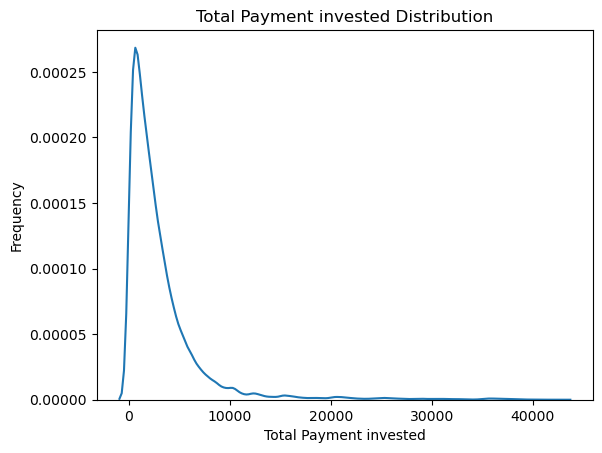

In [131]:
#total_pymnt_inv
# sns.distplot(df["total_pymnt_inv"])
sns.kdeplot(df["total_pymnt_inv"]) 
plt.title('Total Payment invested Distribution')
plt.xlabel('Total Payment invested')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

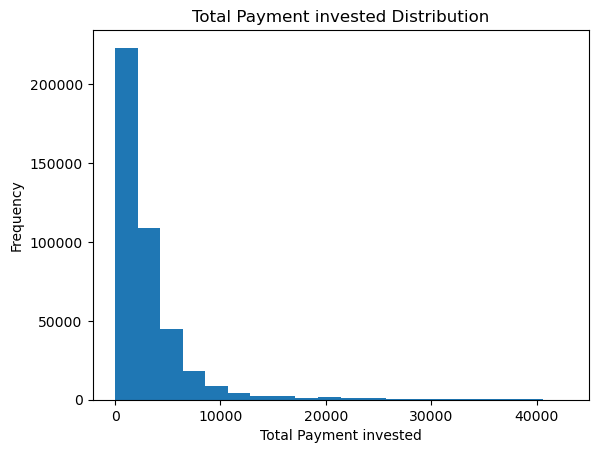

In [132]:
plt.hist(df['total_pymnt_inv'], bins=20) # bins defines the number of equal-width bins in the range.
plt.title('Total Payment invested Distribution')
plt.xlabel('Total Payment invested')
plt.ylabel('Frequency')

Text(0.5, 0, 'Total Payment invested')

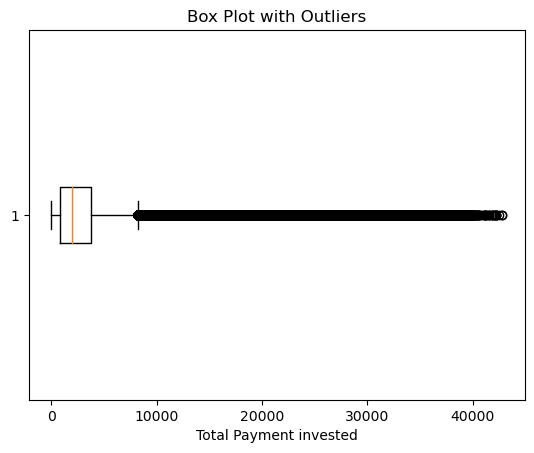

In [133]:
# sns.boxplot(df["total_pymnt_inv"])
plt.boxplot(df['total_pymnt_inv'], vert=False, showfliers=True)
plt.title('Box Plot with Outliers')
plt.xlabel('Total Payment invested')

Text(0, 0.5, 'CDF')

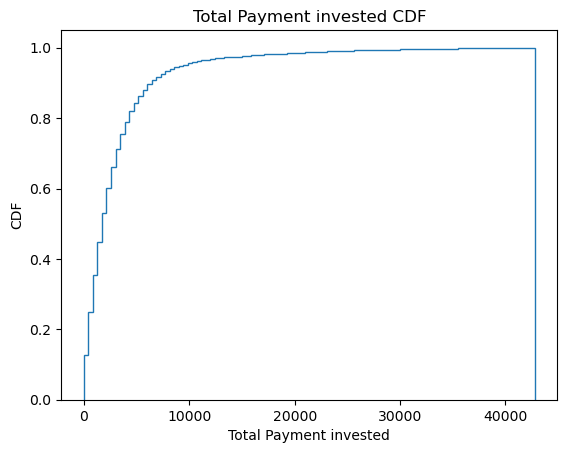

In [134]:
df['total_pymnt_inv'].plot(kind='hist', cumulative=True, density=1, bins=100, histtype='step')
plt.title('Total Payment invested CDF')
plt.xlabel('Total Payment invested')
plt.ylabel('CDF')

In [135]:
corr = df.corr()
corr_total_pymnt_inv = corr['total_pymnt_inv'].sort_values(ascending=False)
corr_total_pymnt_inv

total_pymnt_inv                1.000000
total_pymnt                    0.999999
total_rec_prncp                0.978819
last_pymnt_amnt                0.830891
total_rec_int                  0.462502
installment                    0.410683
funded_amnt_inv                0.387835
loan_amnt                      0.387681
funded_amnt                    0.387681
annual_inc_joint               0.136847
tot_cur_bal                    0.133061
annual_inc                     0.121748
total_rev_hi_lim               0.120650
revol_bal                      0.117593
total_acc                      0.105560
int_rate                       0.104663
open_acc                       0.068285
revol_util                     0.033468
total_cu_tl                    0.032387
mths_since_last_record         0.022755
total_rec_late_fee             0.022567
inq_fi                         0.020365
max_bal_bc                     0.018764
recoveries                     0.016315
inq_last_6mths                 0.015526


Text(0, 0.5, 'Frequency')

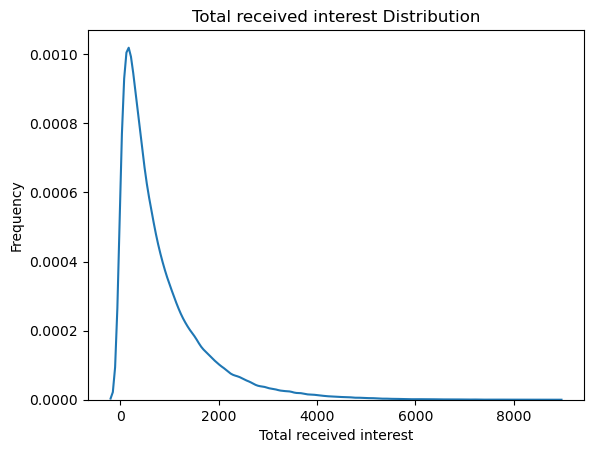

In [138]:
#total_rec_int 
# sns.distplot(df["total_rec_int"])
sns.kdeplot(df["total_rec_int"]) 
plt.title('Total received interest Distribution')
plt.xlabel('Total received interest')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

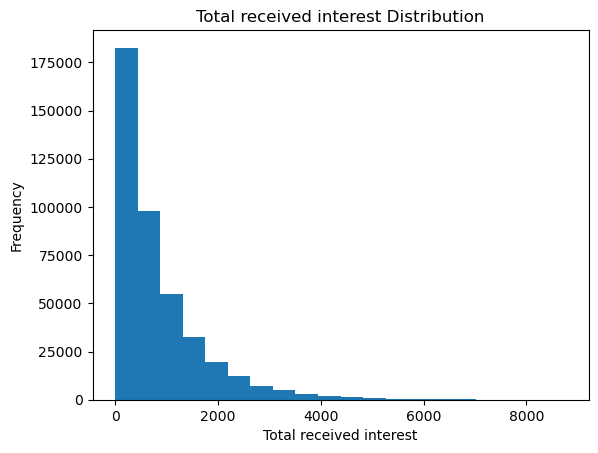

In [139]:
plt.hist(df['total_rec_int'], bins=20) # bins defines the number of equal-width bins in the range.
plt.title('Total received interest Distribution')
plt.xlabel('Total received interest')
plt.ylabel('Frequency')

Text(0.5, 0, 'Total received interest')

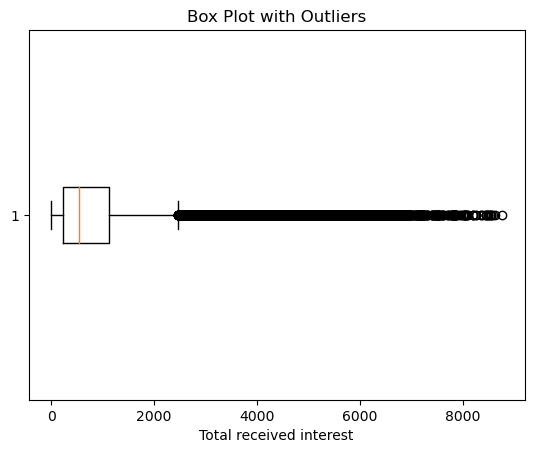

In [140]:
# sns.boxplot(df["total_rec_int"])
plt.boxplot(df['total_rec_int'], vert=False, showfliers=True)
plt.title('Box Plot with Outliers')
plt.xlabel('Total received interest')

Text(0, 0.5, 'CDF')

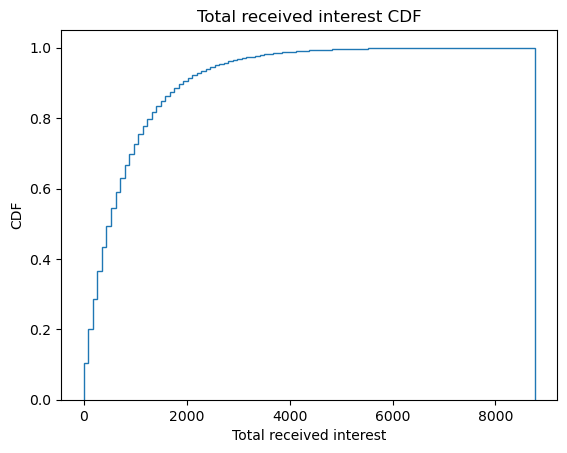

In [141]:
df['total_rec_int'].plot(kind='hist', cumulative=True, density=1, bins=100, histtype='step')
plt.title('Total received interest CDF')
plt.xlabel('Total received interest')
plt.ylabel('CDF')

In [142]:
corr = df.corr()
corr_total_rec_int = corr['total_rec_int'].sort_values(ascending=False)
corr_total_rec_int

total_rec_int                  1.000000
funded_amnt_inv                0.577779
loan_amnt                      0.577659
funded_amnt                    0.577659
installment                    0.534064
total_pymnt_inv                0.462502
total_pymnt                    0.462473
out_prncp_inv                  0.462356
out_prncp                      0.462235
int_rate                       0.434242
total_rec_prncp                0.272973
revol_util                     0.162448
revol_bal                      0.146993
tot_cur_bal                    0.133314
annual_inc_joint               0.132274
annual_inc                     0.120082
total_acc                      0.106850
total_rev_hi_lim               0.093503
open_acc                       0.093398
max_bal_bc                     0.079107
last_pymnt_amnt                0.076843
all_util                       0.059060
total_rec_late_fee             0.053347
total_bal_il                   0.052504
inq_last_6mths                 0.039642


In [53]:
#last_pymnt_d  
df["last_pymnt_d"].unique(),df["last_pymnt_d"].nunique() # missing values present

(array([nan, 'Oct-15', 'Sep-15', 'Nov-15', 'Aug-15', 'Jan-16', 'Dec-15',
        'Jul-15', 'Jun-15', 'May-15', 'Apr-15', 'Mar-15', 'Feb-15',
        'Jan-15'], dtype=object),
 13)

Text(0, 0.5, 'Frequency')

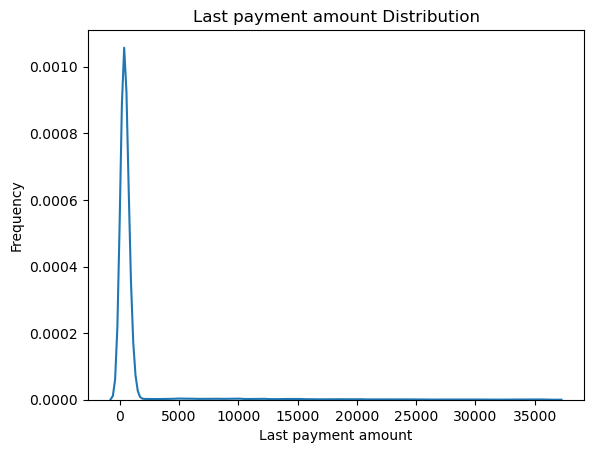

In [159]:
#last_pymnt_amnt
# sns.distplot(df["last_pymnt_amnt"])
sns.kdeplot(df["last_pymnt_amnt"]) 
plt.title('Last payment amount Distribution')
plt.xlabel('Last payment amount')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

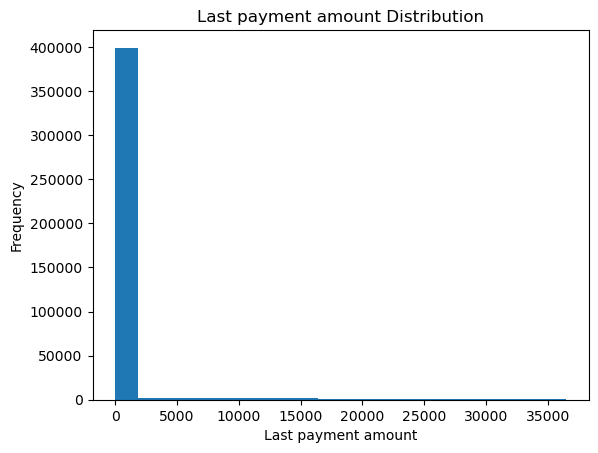

In [160]:
plt.hist(df['last_pymnt_amnt'], bins=20) # bins defines the number of equal-width bins in the range.
plt.title('Last payment amount Distribution')
plt.xlabel('Last payment amount')
plt.ylabel('Frequency')

Text(0.5, 0, 'Last payment amount')

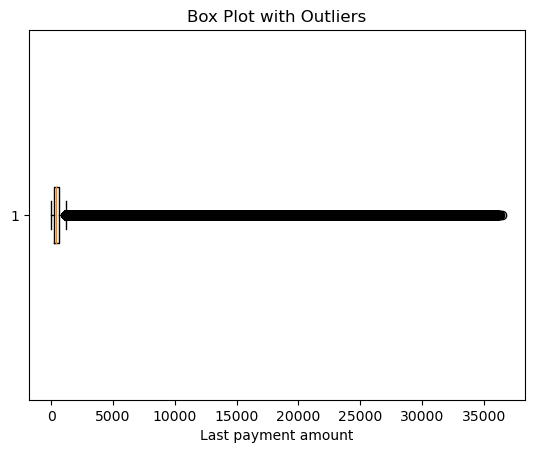

In [161]:
# sns.boxplot(df["last_pymnt_amnt"])
plt.boxplot(df['last_pymnt_amnt'], vert=False, showfliers=True)
plt.title('Box Plot with Outliers')
plt.xlabel('Last payment amount')

Text(0, 0.5, 'CDF')

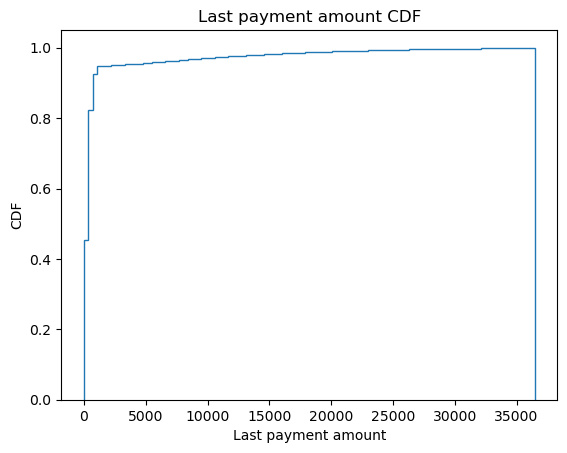

In [162]:
df['last_pymnt_amnt'].plot(kind='hist', cumulative=True, density=1, bins=100, histtype='step')
plt.title('Last payment amount CDF')
plt.xlabel('Last payment amount')
plt.ylabel('CDF')

In [163]:
corr = df.corr()
corr_last_pymnt_amnt = corr['last_pymnt_amnt'].sort_values(ascending=False)
corr_last_pymnt_amnt

last_pymnt_amnt                1.000000
total_rec_prncp                0.884270
total_pymnt                    0.830924
total_pymnt_inv                0.830891
installment                    0.175476
funded_amnt_inv                0.167959
loan_amnt                      0.167920
funded_amnt                    0.167920
annual_inc_joint               0.129741
total_rec_int                  0.076843
int_rate                       0.076373
tot_cur_bal                    0.073480
total_acc                      0.064111
annual_inc                     0.059503
total_rev_hi_lim               0.057600
revol_bal                      0.046028
open_acc                       0.032236
total_cu_tl                    0.027892
inq_last_6mths                 0.027074
mths_since_last_record         0.026345
inq_fi                         0.020714
max_bal_bc                     0.018549
inq_last_12m                   0.014018
open_il_24m                    0.011948
open_il_12m                    0.011768


In [57]:
df["last_pymnt_amnt"].head()

0        0.00
1    10059.00
2      225.84
3      327.34
4      354.87
Name: last_pymnt_amnt, dtype: float64

In [58]:
#next_pymnt_d
df["next_pymnt_d"].unique(),df["next_pymnt_d"].nunique() #missing values present

(array([nan, 'Feb-16', 'Mar-16', 'Jan-16'], dtype=object), 3)

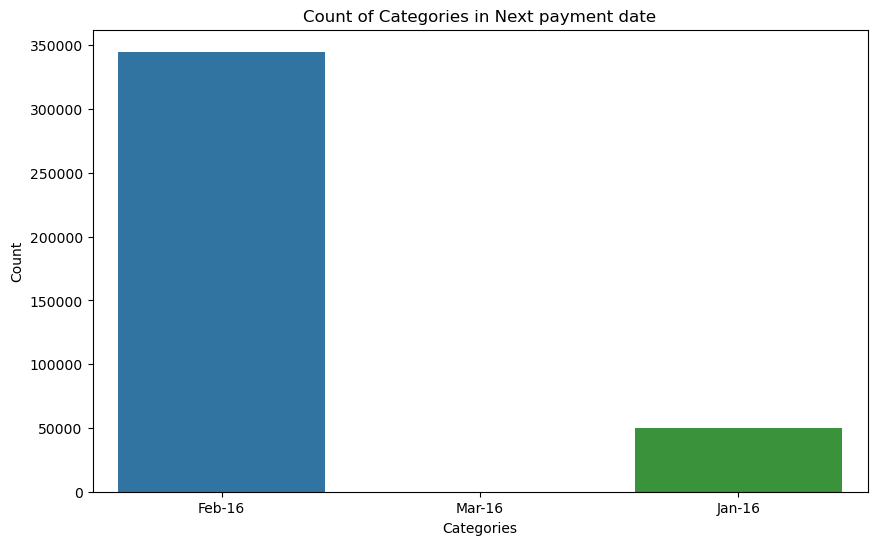

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="next_pymnt_d")
plt.title("Count of Categories in Next payment date")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.show()

In [59]:
#last_credit_pull_d 
df["last_credit_pull_d"].unique(),df["last_credit_pull_d"].nunique() #missing values present

(array(['Jan-16', 'Sep-15', 'Dec-15', 'Oct-15', 'Aug-15', 'Nov-15',
        'Jun-15', 'Jul-15', 'May-15', 'Apr-15', 'Feb-15', 'Mar-15',
        'Jan-15', nan, 'Dec-14'], dtype=object),
 14)

Text(0, 0.5, 'Frequency')

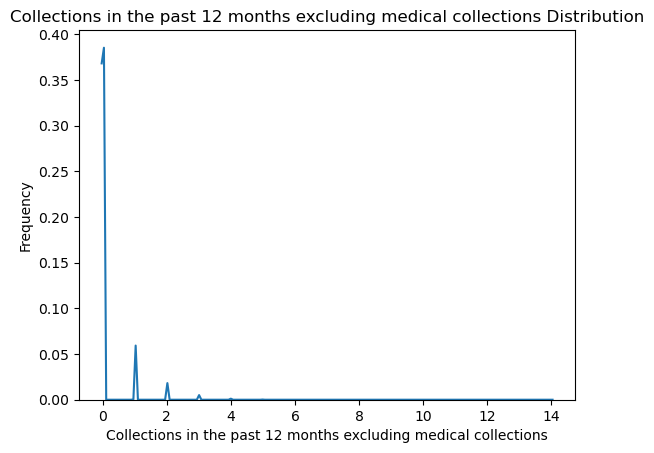

In [164]:
#collections_12_mths_ex_med 
# sns.distplot(df["collections_12_mths_ex_med"])
sns.kdeplot(df["collections_12_mths_ex_med"]) 
plt.title('Collections in the past 12 months excluding medical collections Distribution')
plt.xlabel('Collections in the past 12 months excluding medical collections')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

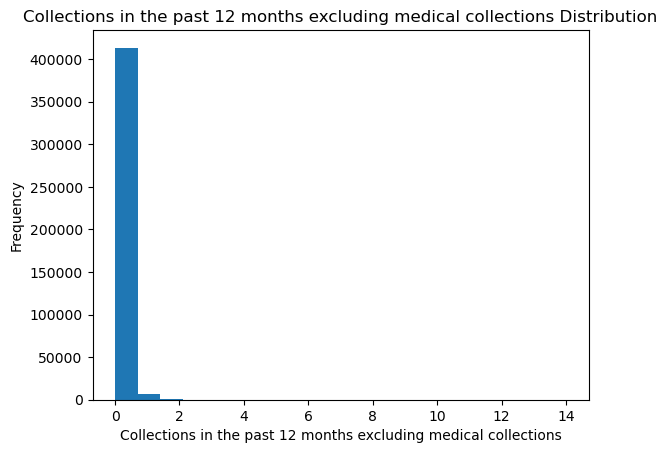

In [165]:
plt.hist(df['collections_12_mths_ex_med'], bins=20) # bins defines the number of equal-width bins in the range.
plt.title('Collections in the past 12 months excluding medical collections Distribution')
plt.xlabel('Collections in the past 12 months excluding medical collections')
plt.ylabel('Frequency')

Text(0.5, 0, 'Collections in the past 12 months excluding medical collections')

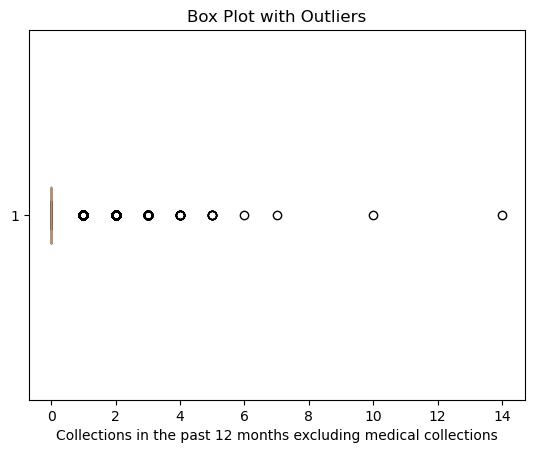

In [166]:
# sns.boxplot(df["collections_12_mths_ex_med"])
plt.boxplot(df['collections_12_mths_ex_med'], vert=False, showfliers=True)
plt.title('Box Plot with Outliers')
plt.xlabel('Collections in the past 12 months excluding medical collections')

Text(0, 0.5, 'CDF')

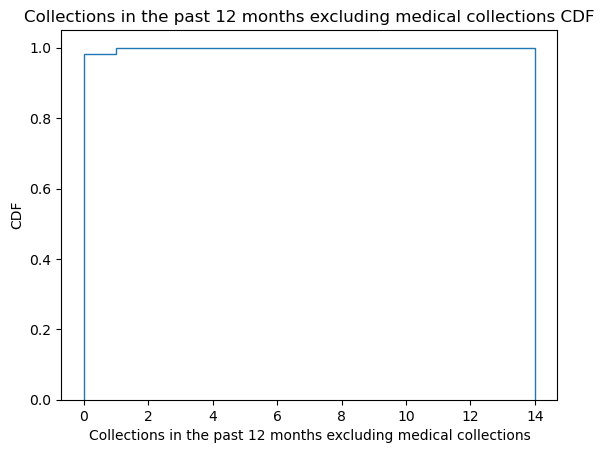

In [167]:
df['collections_12_mths_ex_med'].plot(kind='hist', cumulative=True, density=1, bins=100, histtype='step')
plt.title('Collections in the past 12 months excluding medical collections CDF')
plt.xlabel('Collections in the past 12 months excluding medical collections')
plt.ylabel('CDF')

In [168]:
corr = df.corr()
corr_collections_12_mths_ex_med = corr['collections_12_mths_ex_med'].sort_values(ascending=False)
corr_collections_12_mths_ex_med

collections_12_mths_ex_med     1.000000
delinq_2yrs                    0.076925
acc_now_delinq                 0.051278
tot_coll_amt                   0.046012
open_rv_12m                    0.029575
inq_last_6mths                 0.025801
inq_last_12m                   0.025181
open_rv_24m                    0.023524
int_rate                       0.019232
pub_rec                        0.016719
open_acc_6m                    0.013307
id                             0.011953
member_id                      0.011891
inq_fi                         0.010622
mths_since_rcnt_il             0.008475
total_acc                      0.004482
open_acc                       0.003244
collection_recovery_fee        0.000354
recoveries                    -0.000003
total_rec_late_fee            -0.000256
open_il_6m                    -0.001082
il_util                       -0.002117
dti                           -0.003588
open_il_12m                   -0.005358
total_bal_il                  -0.006675


Text(0, 0.5, 'Frequency')

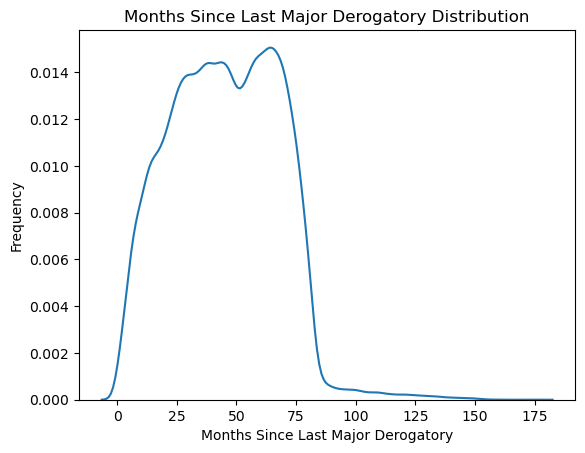

In [169]:
#mths_since_last_major_derog
# sns.distplot(df["mths_since_last_major_derog"])
sns.kdeplot(df["mths_since_last_major_derog"]) 
plt.title('Months Since Last Major Derogatory Distribution')
plt.xlabel('Months Since Last Major Derogatory')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

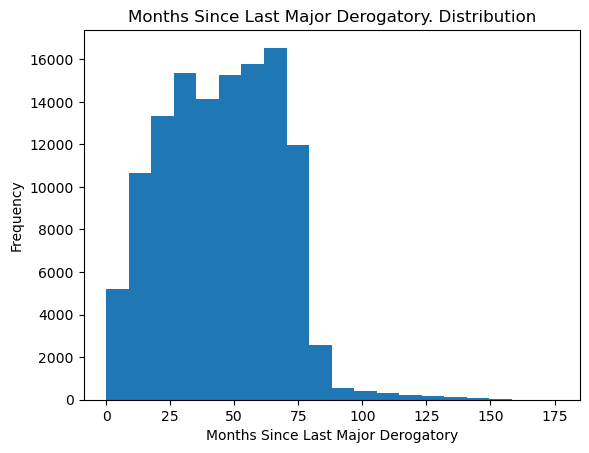

In [170]:
plt.hist(df['mths_since_last_major_derog'], bins=20) # bins defines the number of equal-width bins in the range.
plt.title('Months Since Last Major Derogatory. Distribution')
plt.xlabel('Months Since Last Major Derogatory')
plt.ylabel('Frequency')

Text(0, 0.5, 'CDF')

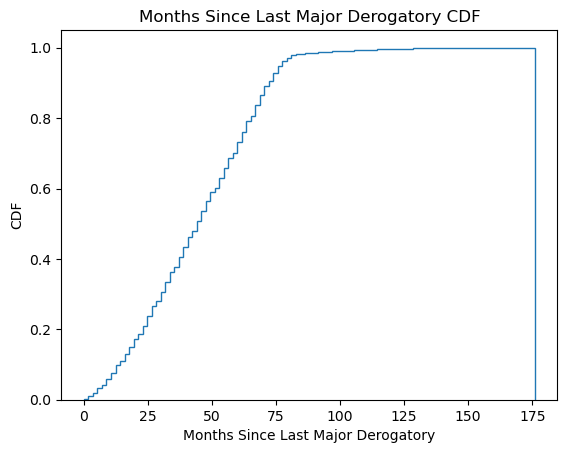

In [172]:
df['mths_since_last_major_derog'].plot(kind='hist', cumulative=True, density=1, bins=100, histtype='step')
plt.title('Months Since Last Major Derogatory CDF')
plt.xlabel('Months Since Last Major Derogatory')
plt.ylabel('CDF')

Text(0.5, 0, 'Months Since Last Major Derogatory')

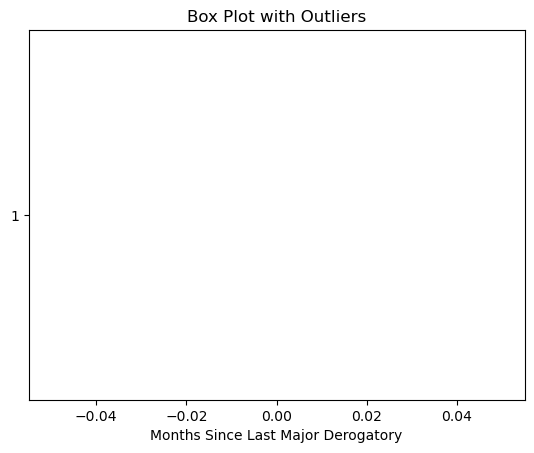

In [174]:
# sns.boxplot(df["mths_since_last_major_derog"])
plt.boxplot(df['mths_since_last_major_derog'], vert=False, showfliers=True)
plt.title('Box Plot with Outliers')
plt.xlabel('Months Since Last Major Derogatory')

In [173]:
corr = df.corr()
corr_mths_since_last_major_derog = corr['mths_since_last_major_derog'].sort_values(ascending=False)
corr_mths_since_last_major_derog

mths_since_last_major_derog    1.000000
mths_since_last_delinq         0.681553
open_rv_24m                    0.113814
pub_rec                        0.109844
open_il_24m                    0.074340
mths_since_last_record         0.062560
open_rv_12m                    0.057434
annual_inc_joint               0.056906
open_il_12m                    0.056655
open_acc_6m                    0.049247
inq_last_12m                   0.037817
inq_last_6mths                 0.031239
tot_coll_amt                   0.029729
id                             0.021221
member_id                      0.021181
open_acc                       0.013119
il_util                        0.011578
total_cu_tl                    0.010377
last_pymnt_amnt                0.007067
dti_joint                      0.004300
dti                            0.002371
int_rate                       0.001621
collection_recovery_fee        0.000823
recoveries                     0.000714
total_rev_hi_lim              -0.001981


In [149]:
#policy_code
# sns.distplot(df["policy_code"])

In [150]:
# sns.boxplot(df["policy_code"])

In [68]:
df["policy_code"].unique(),df["policy_code"].isna().sum()

(array([1], dtype=int64), 0)

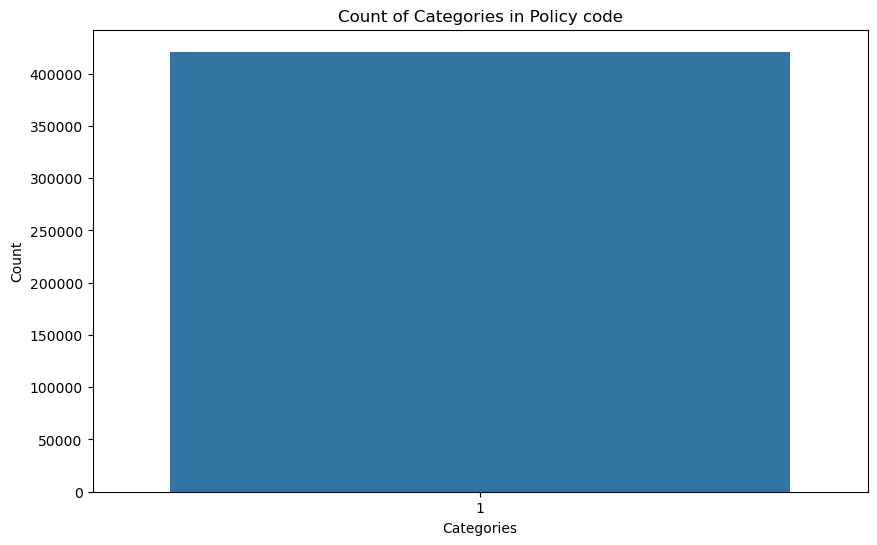

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="policy_code")
plt.title("Count of Categories in Policy code")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.show()

In [69]:
#application_type 
df["application_type"].unique(),df["application_type"].nunique()

(array(['INDIVIDUAL', 'JOINT'], dtype=object), 2)

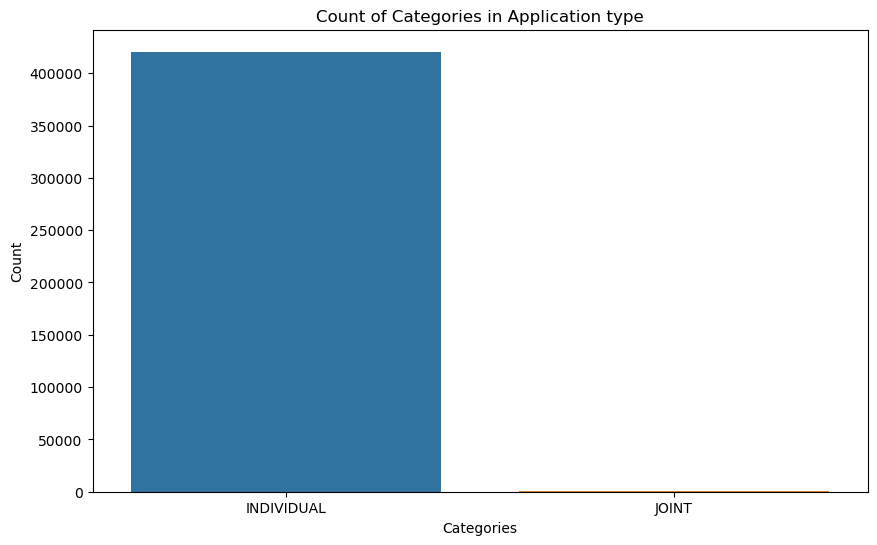

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="application_type")
plt.title("Count of Categories in Application type")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.show()

In [70]:
df["application_type"].value_counts()

INDIVIDUAL    420583
JOINT            511
Name: application_type, dtype: int64

Text(0, 0.5, 'Frequency')

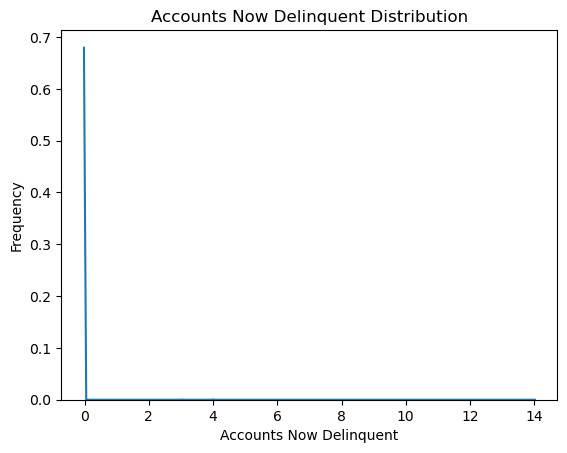

In [175]:
#acc_now_delinq
# sns.distplot(df["acc_now_delinq"])
sns.kdeplot(df["acc_now_delinq"]) 
plt.title('Accounts Now Delinquent Distribution')
plt.xlabel('Accounts Now Delinquent')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

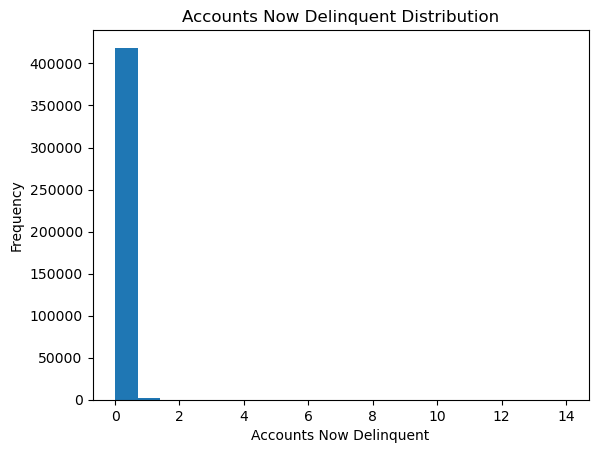

In [176]:
plt.hist(df['acc_now_delinq'], bins=20) # bins defines the number of equal-width bins in the range.
plt.title('Accounts Now Delinquent Distribution')
plt.xlabel('Accounts Now Delinquent')
plt.ylabel('Frequency')

Text(0.5, 0, 'Accounts Now Delinquent')

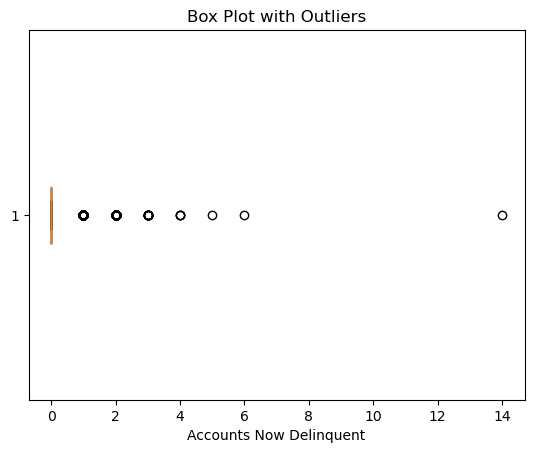

In [177]:
# sns.boxplot(df["acc_now_delinq"])
plt.boxplot(df['acc_now_delinq'], vert=False, showfliers=True)
plt.title('Box Plot with Outliers')
plt.xlabel('Accounts Now Delinquent')

Text(0, 0.5, 'CDF')

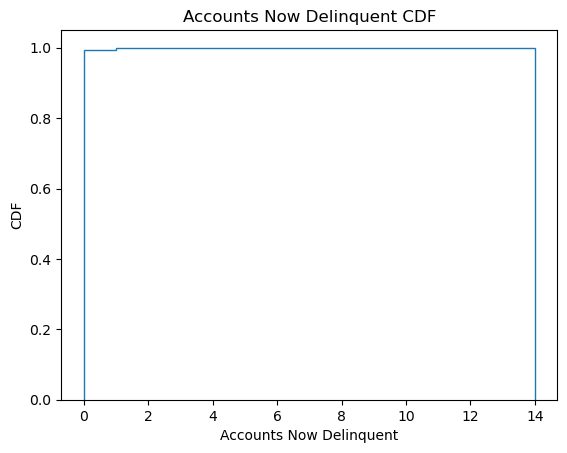

In [178]:
df['acc_now_delinq'].plot(kind='hist', cumulative=True, density=1, bins=100, histtype='step')
plt.title('Accounts Now Delinquent CDF')
plt.xlabel('Accounts Now Delinquent')
plt.ylabel('CDF')

In [179]:
corr = df.corr()
corr_acc_now_delinq = corr['acc_now_delinq'].sort_values(ascending=False)
corr_acc_now_delinq

acc_now_delinq                 1.000000
delinq_2yrs                    0.132685
collections_12_mths_ex_med     0.051278
int_rate                       0.027521
total_acc                      0.025181
tot_cur_bal                    0.023160
total_cu_tl                    0.017527
open_acc                       0.015827
annual_inc                     0.012628
total_rec_int                  0.011751
total_bal_il                   0.010044
total_rec_late_fee             0.007132
mths_since_rcnt_il             0.006952
total_rev_hi_lim               0.006840
installment                    0.004107
collection_recovery_fee        0.003100
total_pymnt                    0.002940
total_pymnt_inv                0.002937
recoveries                     0.002358
tot_coll_amt                   0.001841
last_pymnt_amnt                0.000712
funded_amnt                    0.000646
loan_amnt                      0.000646
funded_amnt_inv                0.000630
dti                            0.000583


Text(0, 0.5, 'Frequency')

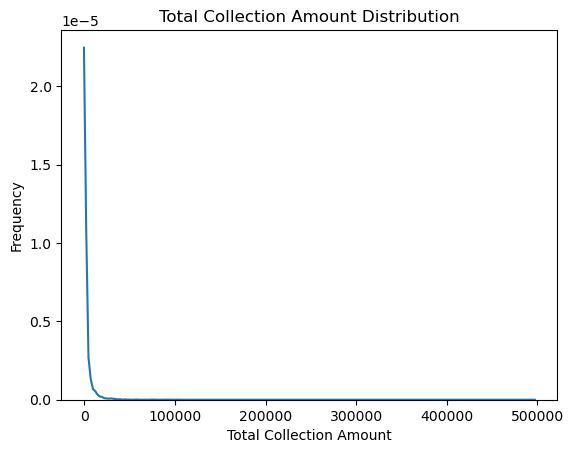

In [180]:
#tot_coll_amt
# sns.distplot(df["tot_coll_amt"])
sns.kdeplot(df["tot_coll_amt"]) 
plt.title('Total Collection Amount Distribution')
plt.xlabel('Total Collection Amount')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

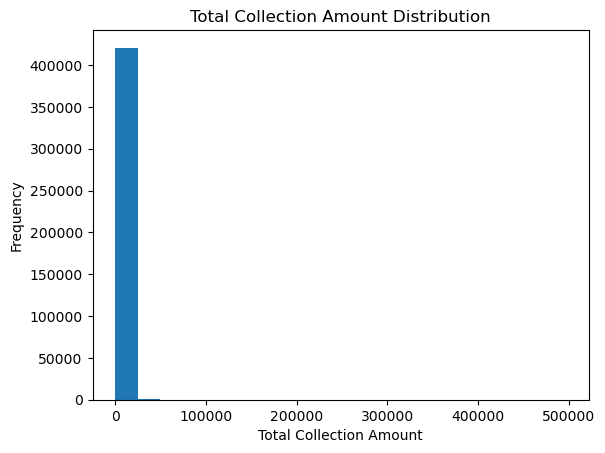

In [181]:
plt.hist(df['tot_coll_amt'], bins=20) # bins defines the number of equal-width bins in the range.
plt.title('Total Collection Amount Distribution')
plt.xlabel('Total Collection Amount')
plt.ylabel('Frequency')

Text(0.5, 0, 'Total Collection Amount')

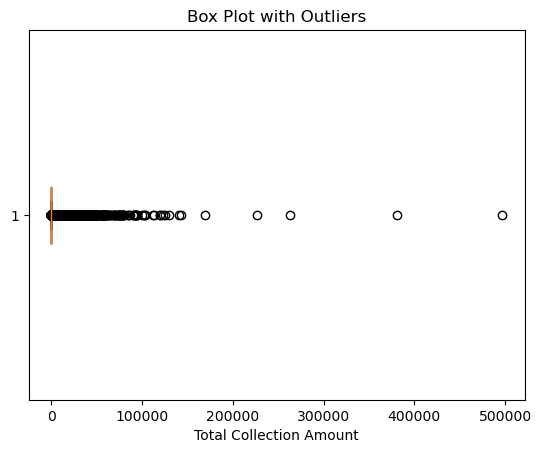

In [182]:
# sns.boxplot(df["tot_coll_amt"])
plt.boxplot(df['tot_coll_amt'], vert=False, showfliers=True)
plt.title('Box Plot with Outliers')
plt.xlabel('Total Collection Amount')

Text(0, 0.5, 'CDF')

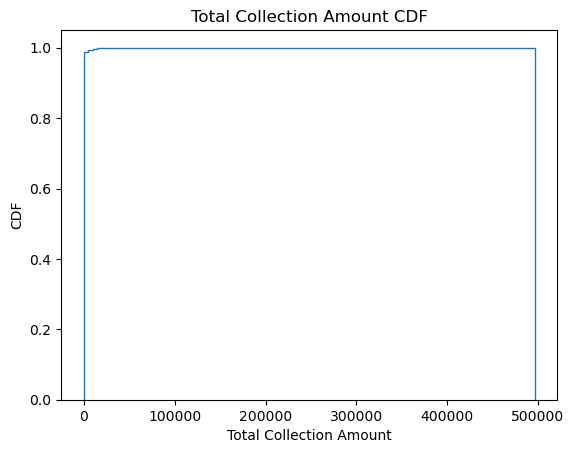

In [183]:
df['tot_coll_amt'].plot(kind='hist', cumulative=True, density=1, bins=100, histtype='step')
plt.title('Total Collection Amount CDF')
plt.xlabel('Total Collection Amount')
plt.ylabel('CDF')

In [184]:
corr = df.corr()
corr_tot_coll_amt = corr['tot_coll_amt'].sort_values(ascending=False)
corr_tot_coll_amt

tot_coll_amt                   1.000000
collections_12_mths_ex_med     0.046012
mths_since_last_delinq         0.037843
pub_rec                        0.035377
inq_last_12m                   0.030396
open_rv_24m                    0.029836
mths_since_last_major_derog    0.029729
open_rv_12m                    0.027782
total_acc                      0.027461
inq_fi                         0.024884
open_acc_6m                    0.022737
inq_last_6mths                 0.020749
il_util                        0.019232
open_il_12m                    0.012635
int_rate                       0.009683
open_il_24m                    0.008805
annual_inc_joint               0.008069
total_bal_il                   0.004414
mths_since_rcnt_il             0.002451
open_acc                       0.002338
member_id                      0.002329
id                             0.002312
acc_now_delinq                 0.001841
total_rec_late_fee             0.000972
delinq_2yrs                    0.000762


Text(0, 0.5, 'Frequency')

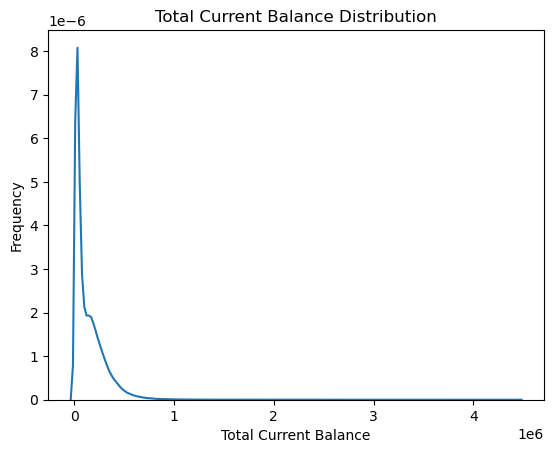

In [185]:
#tot_cur_bal
# sns.distplot(df["tot_cur_bal"])
sns.kdeplot(df["tot_cur_bal"]) 
plt.title('Total Current Balance Distribution')
plt.xlabel('Total Current Balance')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

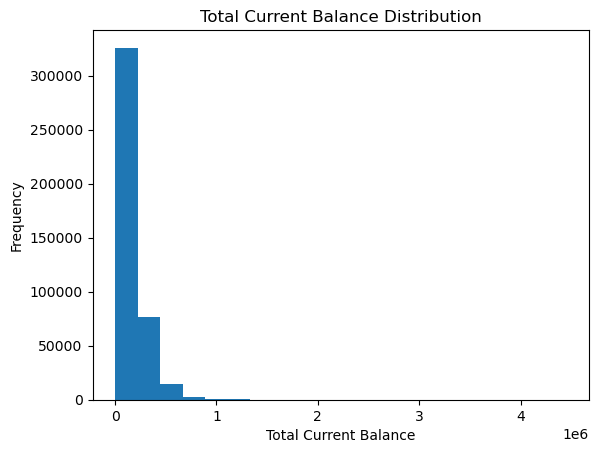

In [186]:
plt.hist(df['tot_cur_bal'], bins=20) # bins defines the number of equal-width bins in the range.
plt.title('Total Current Balance Distribution')
plt.xlabel('Total Current Balance')
plt.ylabel('Frequency')

Text(0.5, 0, 'Total Current Balance')

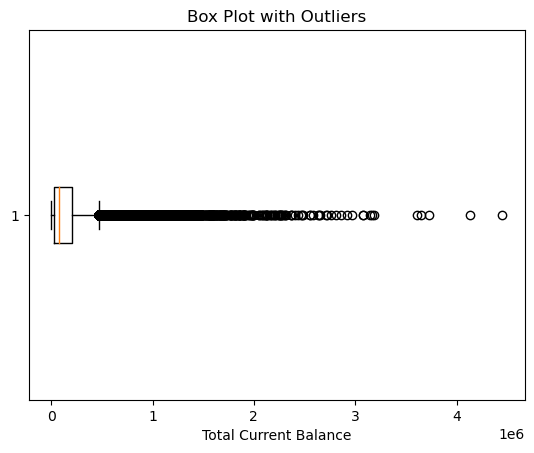

In [187]:
# sns.boxplot(df["tot_cur_bal"])
plt.boxplot(df['tot_cur_bal'], vert=False, showfliers=True)
plt.title('Box Plot with Outliers')
plt.xlabel('Total Current Balance')

Text(0, 0.5, 'CDF')

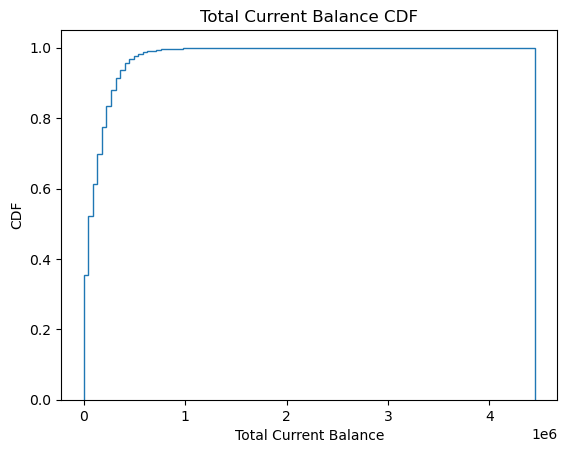

In [188]:
df['tot_cur_bal'].plot(kind='hist', cumulative=True, density=1, bins=100, histtype='step')
plt.title('Total Current Balance CDF')
plt.xlabel('Total Current Balance')
plt.ylabel('CDF')

In [189]:
corr = df.corr()
corr_tot_cur_bal = corr['tot_cur_bal'].sort_values(ascending=False)
corr_tot_cur_bal

tot_cur_bal                    1.000000
annual_inc_joint               0.516695
revol_bal                      0.455735
total_rev_hi_lim               0.410693
annual_inc                     0.379008
total_bal_il                   0.373898
max_bal_bc                     0.359861
funded_amnt_inv                0.325402
loan_amnt                      0.325353
funded_amnt                    0.325353
total_acc                      0.305456
installment                    0.295476
out_prncp_inv                  0.280221
out_prncp                      0.280165
open_acc                       0.245250
open_il_6m                     0.156413
total_rec_int                  0.133314
total_pymnt_inv                0.133061
total_pymnt                    0.133052
open_il_24m                    0.118857
inq_last_12m                   0.114079
total_rec_prncp                0.113853
all_util                       0.098994
total_cu_tl                    0.094735
revol_util                     0.091805


Text(0, 0.5, 'Frequency')

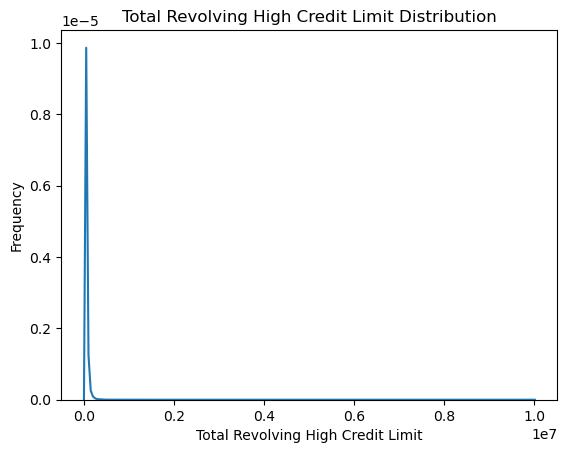

In [190]:
#total_rev_hi_lim
# sns.distplot(df["total_rev_hi_lim"])
sns.kdeplot(df["total_rev_hi_lim"]) 
plt.title('Total Revolving High Credit Limit Distribution')
plt.xlabel('Total Revolving High Credit Limit')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

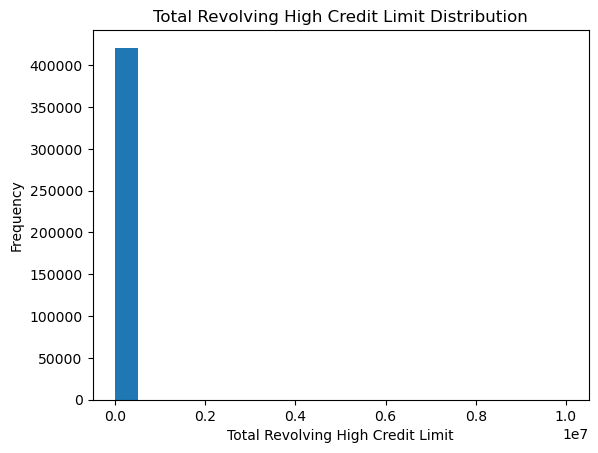

In [191]:
plt.hist(df['total_rev_hi_lim'], bins=20) # bins defines the number of equal-width bins in the range.
plt.title('Total Revolving High Credit Limit Distribution')
plt.xlabel('Total Revolving High Credit Limit')
plt.ylabel('Frequency')

Text(0.5, 0, 'Total Revolving High Credit Limit')

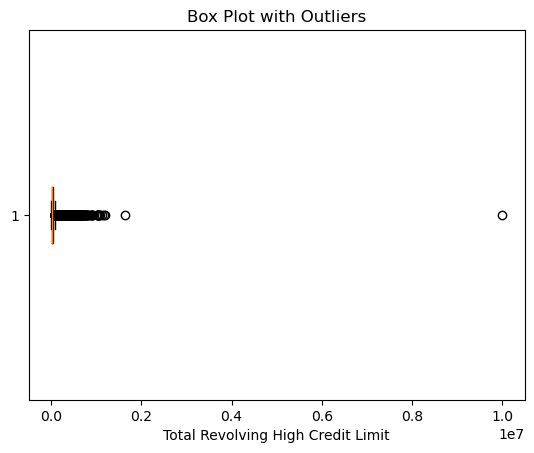

In [192]:
# sns.boxplot(df["total_rev_hi_lim"]) 
plt.boxplot(df['total_rev_hi_lim'], vert=False, showfliers=True)
plt.title('Box Plot with Outliers')
plt.xlabel('Total Revolving High Credit Limit')

Text(0, 0.5, 'CDF')

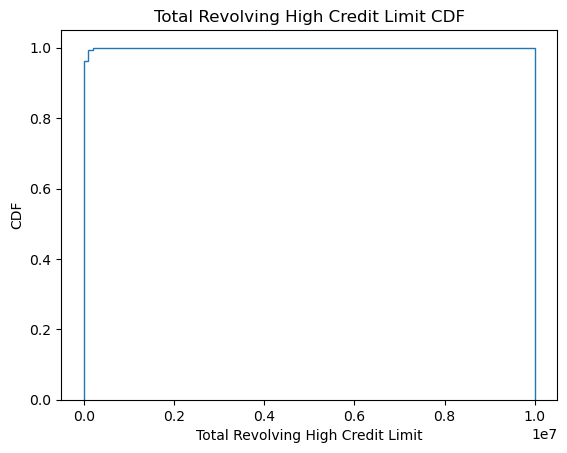

In [193]:
df['total_rev_hi_lim'].plot(kind='hist', cumulative=True, density=1, bins=100, histtype='step')
plt.title('Total Revolving High Credit Limit CDF')
plt.xlabel('Total Revolving High Credit Limit')
plt.ylabel('CDF')

In [194]:
corr = df.corr()
corr_total_rev_hi_lim = corr['total_rev_hi_lim'].sort_values(ascending=False)
corr_total_rev_hi_lim

total_rev_hi_lim               1.000000
revol_bal                      0.833429
max_bal_bc                     0.502913
tot_cur_bal                    0.410693
open_acc                       0.353092
funded_amnt_inv                0.330953
loan_amnt                      0.330871
funded_amnt                    0.330871
installment                    0.303468
out_prncp_inv                  0.287533
out_prncp                      0.287443
total_acc                      0.277593
annual_inc_joint               0.275847
annual_inc                     0.256554
open_rv_24m                    0.132909
total_pymnt_inv                0.120650
total_pymnt                    0.120639
total_rec_prncp                0.109436
open_rv_12m                    0.100850
total_rec_int                  0.093503
dti_joint                      0.092220
total_bal_il                   0.058854
last_pymnt_amnt                0.057600
open_acc_6m                    0.042697
total_cu_tl                    0.033329


In [14]:
## This feature is not used to build model>> id, member_id, sub_grade, emp_title, url, title,zip_code,  recoveries, 
  #collection_recovery_fee, total_rec_prncp, total_rec_late_fee
    
## column has 80% of null data >> desc,annual_inc_joint, dti_joint, verification_status_joint, open_acc_6m, 
  #open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, 
  #inq_fi,total_cu_tl, inq_last_12m

##### Feature Engineering

In [216]:
loan_data = df.copy()

In [217]:
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  60516983   64537751      20000        20000            20000   36 months   
1  60187139   64163931      11000        11000            11000   36 months   
2  60356453   64333218       7000         7000             7000   36 months   
3  59955769   63900496      10000        10000            10000   36 months   
4  58703693   62544456       9550         9550             9550   36 months   

   int_rate  installment grade sub_grade              emp_title emp_length  \
0     12.29       667.06     C        C1       Accounting Clerk     1 year   
1     12.69       369.00     C        C2  Accounts Payable Lead    7 years   
2      9.99       225.84     B        B3                  Nurse    6 years   
3     10.99       327.34     B        B4        Service Manager  10+ years   
4     19.99       354.87     E        E4                    NaN        NaN   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0            OWN     65000.0     Source Verified  Sep-15  Charged Off   
1       MORTGAGE     40000.0     Source Verified  Sep-15  Charged Off   
2       MORTGAGE     32000.0     Source Verified  Sep-15  Charged Off   
3       MORTGAGE     48000.0     Source Verified  Sep-15  Charged Off   
4           RENT     32376.0            Verified  Sep-15  Charged Off   

  pymnt_plan                                                url desc  \
0          n  https://www.lendingclub.com/browse/loanDetail....  NaN   
1          n  https://www.lendingclub.com/browse/loanDetail....  NaN   
2          n  https://www.lendingclub.com/browse/loanDetail....  NaN   
3          n  https://www.lendingclub.com/browse/loanDetail....  NaN   
4          n  https://www.lendingclub.com/browse/loanDetail....  NaN   

              purpose                    title zip_code addr_state    dti  \
0  debt_consolidation       Debt consolidation    542xx         WI  20.72   
1  debt_consolidation       Debt consolidation    235xx         VA  24.57   
2  debt_consolidation       Debt consolidation    350xx         AL  32.41   
3         credit_card  Credit card refinancing    483xx         MI  30.98   
4  debt_consolidation       Debt consolidation    546xx         WI  32.54   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0            0           Sep-00               1                     NaN   
1            0           Sep-02               0                    36.0   
2            0           Feb-06               1                     NaN   
3            0           Oct-99               2                     NaN   
4            0           Nov-99               3                    69.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN        25        0      31578        77.0   
1                    80.0        13        1       5084        38.8   
2                     NaN        18        0      12070        74.0   
3                     NaN        18        0      22950        66.0   
4                     NaN         9        0       4172        29.6   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0         42                   w        0.0            0.0         0.00   
1         41                   w        0.0            0.0     10043.49   
2         36                   f        0.0            0.0       221.96   
3         41                   f        0.0            0.0       315.13   
4         26                   w        0.0            0.0       333.66   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0             0.00             0.00           0.00                 0.0   
1         10043.49          9942.67         100.81                 0.0   
2           221.96           167.56          54.40                 0.0   
3           315.13           235.76          79.37                 0.0   
4           333.66           19

In [218]:
# drop columns with more than 80% null values
loan_data.dropna(thresh = loan_data.shape[0]*0.2, axis = 1, inplace = True)

In [219]:
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  60516983   64537751      20000        20000            20000   36 months   
1  60187139   64163931      11000        11000            11000   36 months   
2  60356453   64333218       7000         7000             7000   36 months   
3  59955769   63900496      10000        10000            10000   36 months   
4  58703693   62544456       9550         9550             9550   36 months   

   int_rate  installment grade sub_grade              emp_title emp_length  \
0     12.29       667.06     C        C1       Accounting Clerk     1 year   
1     12.69       369.00     C        C2  Accounts Payable Lead    7 years   
2      9.99       225.84     B        B3                  Nurse    6 years   
3     10.99       327.34     B        B4        Service Manager  10+ years   
4     19.99       354.87     E        E4                    NaN        NaN   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0            OWN     65000.0     Source Verified  Sep-15  Charged Off   
1       MORTGAGE     40000.0     Source Verified  Sep-15  Charged Off   
2       MORTGAGE     32000.0     Source Verified  Sep-15  Charged Off   
3       MORTGAGE     48000.0     Source Verified  Sep-15  Charged Off   
4           RENT     32376.0            Verified  Sep-15  Charged Off   

  pymnt_plan                                                url  \
0          n  https://www.lendingclub.com/browse/loanDetail....   
1          n  https://www.lendingclub.com/browse/loanDetail....   
2          n  https://www.lendingclub.com/browse/loanDetail....   
3          n  https://www.lendingclub.com/browse/loanDetail....   
4          n  https://www.lendingclub.com/browse/loanDetail....   

              purpose                    title zip_code addr_state    dti  \
0  debt_consolidation       Debt consolidation    542xx         WI  20.72   
1  debt_consolidation       Debt consolidation    235xx         VA  24.57   
2  debt_consolidation       Debt consolidation    350xx         AL  32.41   
3         credit_card  Credit card refinancing    483xx         MI  30.98   
4  debt_consolidation       Debt consolidation    546xx         WI  32.54   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0            0           Sep-00               1                     NaN   
1            0           Sep-02               0                    36.0   
2            0           Feb-06               1                     NaN   
3            0           Oct-99               2                     NaN   
4            0           Nov-99               3                    69.0   

   open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status  \
0        25        0      31578        77.0         42                   w   
1        13        1       5084        38.8         41                   w   
2        18        0      12070        74.0         36                   f   
3        18        0      22950        66.0         41                   f   
4         9        0       4172        29.6         26                   w   

   out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        0.0            0.0         0.00             0.00             0.00   
1        0.0            0.0     10043.49         10043.49          9942.67   
2        0.0            0.0       221.96           221.96           167.56   
3        0.0            0.0       315.13           315.13           235.76   
4        0.0            0.0       333.66           333.66           195.78   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0           0.00                 0.0         0.0                      0.0   
1         100.81                 0.0         0.0                      0.0   
2          54.40                 0.0         0.0                      0.0   
3          79.37                 0.0         0.0               

In [220]:
loan_data.shape

(421094, 55)

In [221]:
loan_data.drop(columns = ['id', 'funded_amnt', 'member_id', 'sub_grade', 'emp_title', 'url', 'title', 'zip_code', 'next_pymnt_d',
                          'recoveries', 'collection_recovery_fee','policy_code'], inplace = True)
# id, funded_amnt :- data is same as loan_amnt, member_id, sub_grade, url,title,zip_code,next_pymnt_d,recoveries, collection_recovery_fee,policy_code
# sub_grade: if we have grade then no need of sub_grade.
# title: May contain similar information to purpose feature
# recoveries and collection_recovery_fee: If these are related to post-loan recovery and not relevant to our analysis, we can drop them.
# policy_code: this column contains a constant value 1 for all records

In [222]:
loan_data.head()

loan_amnt  funded_amnt_inv        term  int_rate  installment grade  \
0      20000            20000   36 months     12.29       667.06     C   
1      11000            11000   36 months     12.69       369.00     C   
2       7000             7000   36 months      9.99       225.84     B   
3      10000            10000   36 months     10.99       327.34     B   
4       9550             9550   36 months     19.99       354.87     E   

  emp_length home_ownership  annual_inc verification_status issue_d  \
0     1 year            OWN     65000.0     Source Verified  Sep-15   
1    7 years       MORTGAGE     40000.0     Source Verified  Sep-15   
2    6 years       MORTGAGE     32000.0     Source Verified  Sep-15   
3  10+ years       MORTGAGE     48000.0     Source Verified  Sep-15   
4        NaN           RENT     32376.0            Verified  Sep-15   

   loan_status pymnt_plan             purpose addr_state    dti  delinq_2yrs  \
0  Charged Off          n  debt_consolidation         WI  20.72            0   
1  Charged Off          n  debt_consolidation         VA  24.57            0   
2  Charged Off          n  debt_consolidation         AL  32.41            0   
3  Charged Off          n         credit_card         MI  30.98            0   
4  Charged Off          n  debt_consolidation         WI  32.54            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  \
0           Sep-00               1                     NaN        25        0   
1           Sep-02               0                    36.0        13        1   
2           Feb-06               1                     NaN        18        0   
3           Oct-99               2                     NaN        18        0   
4           Nov-99               3                    69.0         9        0   

   revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0      31578        77.0         42                   w        0.0   
1       5084        38.8         41                   w        0.0   
2      12070        74.0         36                   f        0.0   
3      22950        66.0         41                   f        0.0   
4       4172        29.6         26                   w        0.0   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0         0.00             0.00             0.00   
1            0.0     10043.49         10043.49          9942.67   
2            0.0       221.96           221.96           167.56   
3            0.0       315.13           315.13           235.76   
4            0.0       333.66           333.66           195.78   

   total_rec_int  total_rec_late_fee last_pymnt_d  last_pymnt_amnt  \
0           0.00                 0.0          NaN             0.00   
1         100.81                 0.0       Oct-15         10059.00   
2          54.40                 0.0       Oct-15           225.84   
3          79.37                 0.0       Oct-15           327.34   
4         137.88                 0.0       Oct-15           354.87   

  last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  \
0             Jan-16                           0                          NaN   
1             Jan-16                           0                         79.0   
2             Jan-16                           0                          NaN   
3             Jan-16                           0                          NaN   
4             Jan-16                           0                         69.0   

  application_type  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0       INDIVIDUAL               0             0        52303   
1       INDIVIDUAL               0           332       175731   
2       INDIVIDUAL               0             0       202012   
3       INDIVIDUAL               0             0       108235   
4       INDIVIDUAL               0             0        45492   

   total_rev_hi_lim  
0             4100

In [223]:
loan_data.shape

(421094, 43)

##### loan_amnt

In [224]:
loan_data["loan_amnt"].isna().sum()

0

In [225]:
loan_data["loan_amnt"].max(),loan_data["loan_amnt"].min()

(35000, 1000)

In [226]:
bins   = [0,20000,40000,np.inf]
labels = [0,1,2]
loan_data["loan_amnt_bin"] = pd.cut(loan_data["loan_amnt"], bins=bins, labels=labels,include_lowest= True)

In [227]:
loan_data.head(1)

loan_amnt  funded_amnt_inv        term  int_rate  installment grade  \
0      20000            20000   36 months     12.29       667.06     C   

  emp_length home_ownership  annual_inc verification_status issue_d  \
0     1 year            OWN     65000.0     Source Verified  Sep-15   

   loan_status pymnt_plan             purpose addr_state    dti  delinq_2yrs  \
0  Charged Off          n  debt_consolidation         WI  20.72            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  \
0           Sep-00               1                     NaN        25        0   

   revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0      31578        77.0         42                   w        0.0   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0          0.0              0.0              0.0   

   total_rec_int  total_rec_late_fee last_pymnt_d  last_pymnt_amnt  \
0            0.0                 0.0          NaN              0.0   

  last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  \
0             Jan-16                           0                          NaN   

  application_type  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0       INDIVIDUAL               0             0        52303   

   total_rev_hi_lim loan_amnt_bin  
0             41000             0

In [228]:
loan_data.drop(columns=['loan_amnt'],inplace=True)

In [229]:
loan_data.head(1)

funded_amnt_inv        term  int_rate  installment grade emp_length  \
0            20000   36 months     12.29       667.06     C     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0            OWN     65000.0     Source Verified  Sep-15  Charged Off   

  pymnt_plan             purpose addr_state    dti  delinq_2yrs  \
0          n  debt_consolidation         WI  20.72            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  \
0           Sep-00               1                     NaN        25        0   

   revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0      31578        77.0         42                   w        0.0   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0          0.0              0.0              0.0   

   total_rec_int  total_rec_late_fee last_pymnt_d  last_pymnt_amnt  \
0            0.0                 0.0          NaN              0.0   

  last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  \
0             Jan-16                           0                          NaN   

  application_type  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0       INDIVIDUAL               0             0        52303   

   total_rev_hi_lim loan_amnt_bin  
0             41000             0

##### funded_amnt_inv

In [230]:
loan_data["funded_amnt_inv"].isna().sum()

0

In [231]:
loan_data["funded_amnt_inv"].max(),loan_data["funded_amnt_inv"].min()

(35000, 900)

In [232]:
bins   = [0,20000,40000,np.inf]
labels = [0,1,2]
loan_data["funded_amnt_inv_bin"] = pd.cut(loan_data["funded_amnt_inv"], bins=bins, labels=labels,include_lowest= True)

In [233]:
loan_data.drop(columns=['funded_amnt_inv'],inplace=True)

In [234]:
loan_data.head(1)

term  int_rate  installment grade emp_length home_ownership  \
0   36 months     12.29       667.06     C     1 year            OWN   

   annual_inc verification_status issue_d  loan_status pymnt_plan  \
0     65000.0     Source Verified  Sep-15  Charged Off          n   

              purpose addr_state    dti  delinq_2yrs earliest_cr_line  \
0  debt_consolidation         WI  20.72            0           Sep-00   

   inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_bal  \
0               1                     NaN        25        0      31578   

   revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  \
0        77.0         42                   w        0.0            0.0   

   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0          0.0              0.0              0.0            0.0   

   total_rec_late_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0                 0.0          NaN              0.0             Jan-16   

   collections_12_mths_ex_med  mths_since_last_major_derog application_type  \
0                           0                          NaN       INDIVIDUAL   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim loan_amnt_bin  \
0               0             0        52303             41000             0   

  funded_amnt_inv_bin  
0                   0

##### term

In [235]:
loan_data["term"].isna().sum()

0

In [236]:
loan_data["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [237]:
loan_data['term'] = loan_data['term'].str.strip() 

In [238]:
loan_data["term"].value_counts()

36 months    283172
60 months    137922
Name: term, dtype: int64

In [239]:
loan_data["term"] = loan_data["term"].replace({"36 months": 0, "60 months": 1})

In [240]:
loan_data.head(1)

term  int_rate  installment grade emp_length home_ownership  annual_inc  \
0     0     12.29       667.06     C     1 year            OWN     65000.0   

  verification_status issue_d  loan_status pymnt_plan             purpose  \
0     Source Verified  Sep-15  Charged Off          n  debt_consolidation   

  addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0         WI  20.72            0           Sep-00               1   

   mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN        25        0      31578        77.0   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0         42                   w        0.0            0.0          0.0   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0              0.0              0.0            0.0                 0.0   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0          NaN              0.0             Jan-16   

   collections_12_mths_ex_med  mths_since_last_major_derog application_type  \
0                           0                          NaN       INDIVIDUAL   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim loan_amnt_bin  \
0               0             0        52303             41000             0   

  funded_amnt_inv_bin  
0                   0

##### int_rate

In [241]:
loan_data["int_rate"].isna().sum()

0

In [242]:
loan_data["int_rate"].max(),loan_data["int_rate"].min()

(28.99, 5.32)

In [243]:
loan_data["int_rate"].unique()

array([12.29, 12.69,  9.99, 10.99, 19.99, 14.65, 17.57, 18.25, 16.99,
        7.89, 17.86,  8.18, 18.55,  6.24, 19.19, 25.78, 16.55, 28.99,
       13.99, 11.53, 27.31, 26.77, 22.99, 15.61, 21.99, 13.33,  9.17,
       20.99, 24.99,  7.26,  6.89, 23.99, 28.49, 18.84,  6.39, 19.52,
       21.67, 24.5 , 25.57, 20.49, 25.99,  6.92, 25.89,  6.68, 25.83,
       25.8 ,  5.93, 26.06, 12.99, 12.39, 14.31, 15.99, 16.49, 15.59,
       18.54, 11.99,  8.67, 11.44, 17.14, 13.66, 14.99, 19.24, 10.49,
        9.49,  7.49,  8.19,  6.49,  6.99,  5.32, 19.48, 17.97, 14.85,
        9.8 ,  8.49, 10.78, 16.59,  7.91, 22.45, 18.99, 17.27, 12.88,
       27.99, 15.77, 19.89, 18.49, 11.48, 13.44, 21.48, 23.13, 20.5 ,
       26.99, 10.64, 12.59, 13.18, 24.24,  8.38, 25.09, 14.48, 11.22,
       13.67, 18.2 ,  9.76, 15.41, 27.88, 14.33,  6.  , 12.05, 11.49,
        6.03, 27.49])

In [244]:
# Bin 1: 5.32 - 10.32
# Bin 2: 10.33 - 15.33
# Bin 3: 15.34 - 20.34
# Bin 4: 20.35 - 25.35
# Bin 5: 25.36 - 30.00
labels = [0,1,2,3,4]
loan_data["int_rate_bin"] = pd.qcut(loan_data["int_rate"],q=5,labels=labels)

In [245]:
loan_data.drop(columns=['int_rate'],inplace=True)

In [246]:
loan_data.head()

term  installment grade emp_length home_ownership  annual_inc  \
0     0       667.06     C     1 year            OWN     65000.0   
1     0       369.00     C    7 years       MORTGAGE     40000.0   
2     0       225.84     B    6 years       MORTGAGE     32000.0   
3     0       327.34     B  10+ years       MORTGAGE     48000.0   
4     0       354.87     E        NaN           RENT     32376.0   

  verification_status issue_d  loan_status pymnt_plan             purpose  \
0     Source Verified  Sep-15  Charged Off          n  debt_consolidation   
1     Source Verified  Sep-15  Charged Off          n  debt_consolidation   
2     Source Verified  Sep-15  Charged Off          n  debt_consolidation   
3     Source Verified  Sep-15  Charged Off          n         credit_card   
4            Verified  Sep-15  Charged Off          n  debt_consolidation   

  addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0         WI  20.72            0           Sep-00               1   
1         VA  24.57            0           Sep-02               0   
2         AL  32.41            0           Feb-06               1   
3         MI  30.98            0           Oct-99               2   
4         WI  32.54            0           Nov-99               3   

   mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN        25        0      31578        77.0   
1                    36.0        13        1       5084        38.8   
2                     NaN        18        0      12070        74.0   
3                     NaN        18        0      22950        66.0   
4                    69.0         9        0       4172        29.6   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0         42                   w        0.0            0.0         0.00   
1         41                   w        0.0            0.0     10043.49   
2         36                   f        0.0            0.0       221.96   
3         41                   f        0.0            0.0       315.13   
4         26                   w        0.0            0.0       333.66   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0             0.00             0.00           0.00                 0.0   
1         10043.49          9942.67         100.81                 0.0   
2           221.96           167.56          54.40                 0.0   
3           315.13           235.76          79.37                 0.0   
4           333.66           195.78         137.88                 0.0   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0          NaN             0.00             Jan-16   
1       Oct-15         10059.00             Jan-16   
2       Oct-15           225.84             Jan-16   
3       Oct-15           327.34             Jan-16   
4       Oct-15           354.87             Jan-16   

   collections_12_mths_ex_med  mths_since_last_major_derog application_type  \
0                           0                          NaN       INDIVIDUAL   
1                           0                         79.0       INDIVIDUAL   
2                           0                          NaN       INDIVIDUAL   
3                           0                          NaN       INDIVIDUAL   
4                           0                         69.0       INDIVIDUAL   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim loan_amnt_bin  \
0               0             0        52303             41000             0   
1               0           332       175731             13100             0   
2               0             0       202012             16300             0   
3               0             0       108235             34750             0   
4               0             0        45492             14100             0   

  funded_amnt_inv_bin int_rate_bin  
0                   0            2  
1                   0            2  
2

##### installment

In [247]:
loan_data["installment"].isna().sum()

0

In [248]:
loan_data["installment"].max(),loan_data["installment"].min()

(1445.46, 30.12)

In [249]:
labels = [0,1,2,3,4]
loan_data["installment_bin"] = pd.qcut(loan_data["installment"],q=5,labels=labels)

In [250]:
loan_data.drop(columns=['installment'],inplace=True)

In [251]:
loan_data.head(1)

term grade emp_length home_ownership  annual_inc verification_status  \
0     0     C     1 year            OWN     65000.0     Source Verified   

  issue_d  loan_status pymnt_plan             purpose addr_state    dti  \
0  Sep-15  Charged Off          n  debt_consolidation         WI  20.72   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0            0           Sep-00               1                     NaN   

   open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status  \
0        25        0      31578        77.0         42                   w   

   out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        0.0            0.0          0.0              0.0              0.0   

   total_rec_int  total_rec_late_fee last_pymnt_d  last_pymnt_amnt  \
0            0.0                 0.0          NaN              0.0   

  last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  \
0             Jan-16                           0                          NaN   

  application_type  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0       INDIVIDUAL               0             0        52303   

   total_rev_hi_lim loan_amnt_bin funded_amnt_inv_bin int_rate_bin  \
0             41000             0                   0            2   

  installment_bin  
0               4

##### grade

In [252]:
loan_data["grade"].isna().sum()

0

In [253]:
loan_data["grade"].unique()

array(['C', 'B', 'E', 'D', 'A', 'F', 'G'], dtype=object)

In [254]:
label_encoder = LabelEncoder()
loan_data["grade"] = label_encoder.fit_transform(loan_data["grade"])

In [255]:
loan_data.head(1)

term  grade emp_length home_ownership  annual_inc verification_status  \
0     0      2     1 year            OWN     65000.0     Source Verified   

  issue_d  loan_status pymnt_plan             purpose addr_state    dti  \
0  Sep-15  Charged Off          n  debt_consolidation         WI  20.72   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0            0           Sep-00               1                     NaN   

   open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status  \
0        25        0      31578        77.0         42                   w   

   out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        0.0            0.0          0.0              0.0              0.0   

   total_rec_int  total_rec_late_fee last_pymnt_d  last_pymnt_amnt  \
0            0.0                 0.0          NaN              0.0   

  last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  \
0             Jan-16                           0                          NaN   

  application_type  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0       INDIVIDUAL               0             0        52303   

   total_rev_hi_lim loan_amnt_bin funded_amnt_inv_bin int_rate_bin  \
0             41000             0                   0            2   

  installment_bin  
0               4

In [256]:
loan_data["grade"].unique()

array([2, 1, 4, 3, 0, 5, 6])

##### emp_length

In [257]:
loan_data["emp_length"].isna().sum() # missing values are present

23817

In [258]:
loan_data["emp_length"] = np.where(loan_data["emp_length"].isna(), loan_data['emp_length'].fillna(loan_data['emp_length'].mode()[0]), loan_data["emp_length"])

In [259]:
loan_data["emp_length"].unique()

array(['1 year', '7 years', '6 years', '10+ years', '8 years', '9 years',
       '3 years', '4 years', '< 1 year', '2 years', '5 years'],
      dtype=object)

In [260]:
loan_data["emp_length"].isna().sum()

0

In [261]:
np.sort(['1 year', '7 years', '6 years', '10+ years', '8 years', '9 years',
       '3 years', '4 years', '< 1 year', '2 years', '5 years'])

array(['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '< 1 year'],
      dtype='<U9')

In [262]:
emp_length_map = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10}
loan_data['emp_length'] = loan_data['emp_length'].map(emp_length_map)

In [263]:
loan_data["emp_length"].unique()

array([ 1,  7,  6, 10,  8,  9,  3,  4,  0,  2,  5], dtype=int64)

##### home_ownership

In [264]:
loan_data["home_ownership"].isna().sum()

0

In [265]:
loan_data["home_ownership"].unique()

array(['OWN', 'MORTGAGE', 'RENT', 'ANY'], dtype=object)

In [266]:
loan_data = pd.get_dummies(loan_data,columns=["home_ownership"])

In [267]:
loan_data.head(1)

term  grade  emp_length  annual_inc verification_status issue_d  \
0     0      2           1     65000.0     Source Verified  Sep-15   

   loan_status pymnt_plan             purpose addr_state    dti  delinq_2yrs  \
0  Charged Off          n  debt_consolidation         WI  20.72            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  \
0           Sep-00               1                     NaN        25        0   

   revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0      31578        77.0         42                   w        0.0   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0          0.0              0.0              0.0   

   total_rec_int  total_rec_late_fee last_pymnt_d  last_pymnt_amnt  \
0            0.0                 0.0          NaN              0.0   

  last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  \
0             Jan-16                           0                          NaN   

  application_type  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0       INDIVIDUAL               0             0        52303   

   total_rev_hi_lim loan_amnt_bin funded_amnt_inv_bin int_rate_bin  \
0             41000             0                   0            2   

  installment_bin  home_ownership_ANY  home_ownership_MORTGAGE  \
0               4                   0                        0   

   home_ownership_OWN  home_ownership_RENT  
0                   1                    0

##### annual_inc

In [268]:
loan_data["annual_inc"].isna().sum()

0

In [269]:
loan_data["annual_inc"].max(),loan_data["annual_inc"].min()

(9500000.0, 0.0)

In [270]:
bins = [0,200000,500000,900000,np.inf]
labels = [1,2,3,4]
loan_data["annual_inc_bin"] = pd.cut(loan_data["annual_inc"],bins=bins,labels=labels,include_lowest=True)

In [271]:
loan_data.drop(columns=['annual_inc'],inplace=True)

In [272]:
loan_data.head(1)

term  grade  emp_length verification_status issue_d  loan_status  \
0     0      2           1     Source Verified  Sep-15  Charged Off   

  pymnt_plan             purpose addr_state    dti  delinq_2yrs  \
0          n  debt_consolidation         WI  20.72            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  \
0           Sep-00               1                     NaN        25        0   

   revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0      31578        77.0         42                   w        0.0   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0          0.0              0.0              0.0   

   total_rec_int  total_rec_late_fee last_pymnt_d  last_pymnt_amnt  \
0            0.0                 0.0          NaN              0.0   

  last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  \
0             Jan-16                           0                          NaN   

  application_type  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0       INDIVIDUAL               0             0        52303   

   total_rev_hi_lim loan_amnt_bin funded_amnt_inv_bin int_rate_bin  \
0             41000             0                   0            2   

  installment_bin  home_ownership_ANY  home_ownership_MORTGAGE  \
0               4                   0                        0   

   home_ownership_OWN  home_ownership_RENT annual_inc_bin  
0                   1                    0              1

##### verification_status

In [273]:
loan_data["verification_status"].isna().sum()

0

In [274]:
loan_data["verification_status"].unique()

array(['Source Verified', 'Verified', 'Not Verified'], dtype=object)

In [275]:
loan_data["verification_status"].replace({"Source Verified":0,"Verified":1,"Not Verified":2},inplace=True)

In [276]:
loan_data["verification_status"].unique()

array([0, 1, 2], dtype=int64)

In [277]:
loan_data.head(1)

term  grade  emp_length  verification_status issue_d  loan_status  \
0     0      2           1                    0  Sep-15  Charged Off   

  pymnt_plan             purpose addr_state    dti  delinq_2yrs  \
0          n  debt_consolidation         WI  20.72            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  \
0           Sep-00               1                     NaN        25        0   

   revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0      31578        77.0         42                   w        0.0   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0          0.0              0.0              0.0   

   total_rec_int  total_rec_late_fee last_pymnt_d  last_pymnt_amnt  \
0            0.0                 0.0          NaN              0.0   

  last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  \
0             Jan-16                           0                          NaN   

  application_type  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0       INDIVIDUAL               0             0        52303   

   total_rev_hi_lim loan_amnt_bin funded_amnt_inv_bin int_rate_bin  \
0             41000             0                   0            2   

  installment_bin  home_ownership_ANY  home_ownership_MORTGAGE  \
0               4                   0                        0   

   home_ownership_OWN  home_ownership_RENT annual_inc_bin  
0                   1                    0              1

##### issue_d

In [278]:
loan_data["issue_d"].isna().sum()

0

In [279]:
loan_data["issue_d"].unique()

array(['Sep-15', 'Aug-15', 'Jul-15', 'Jun-15', 'May-15', 'Apr-15',
       'Mar-15', 'Feb-15', 'Jan-15', 'Dec-15', 'Nov-15', 'Oct-15'],
      dtype=object)

In [280]:
loan_data['issue_d_year'] = pd.to_datetime(loan_data["issue_d"], format='%b-%y').dt.year
loan_data['issue_d_month'] = pd.to_datetime(loan_data["issue_d"], format='%b-%y').dt.month

In [281]:
loan_data.drop(columns=["issue_d"],inplace=True)

In [282]:
loan_data.head(1)

term  grade  emp_length  verification_status  loan_status pymnt_plan  \
0     0      2           1                    0  Charged Off          n   

              purpose addr_state    dti  delinq_2yrs earliest_cr_line  \
0  debt_consolidation         WI  20.72            0           Sep-00   

   inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_bal  \
0               1                     NaN        25        0      31578   

   revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  \
0        77.0         42                   w        0.0            0.0   

   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0          0.0              0.0              0.0            0.0   

   total_rec_late_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0                 0.0          NaN              0.0             Jan-16   

   collections_12_mths_ex_med  mths_since_last_major_derog application_type  \
0                           0                          NaN       INDIVIDUAL   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim loan_amnt_bin  \
0               0             0        52303             41000             0   

  funded_amnt_inv_bin int_rate_bin installment_bin  home_ownership_ANY  \
0                   0            2               4                   0   

   home_ownership_MORTGAGE  home_ownership_OWN  home_ownership_RENT  \
0                        0                   1                    0   

  annual_inc_bin  issue_d_year  issue_d_month  
0              1          2015              9

##### loan_status (Target Column)

In [283]:
loan_data["loan_status"].isna().sum()

0

In [284]:
loan_data["loan_status"].unique()

array(['Charged Off', 'Current', 'Default', 'Fully Paid',
       'In Grace Period', 'Issued', 'Late (16-30 days)',
       'Late (31-120 days)'], dtype=object)

In [285]:
label_encoder = LabelEncoder()
loan_data["loan_status"] = label_encoder.fit_transform(loan_data["loan_status"])

In [286]:
loan_data["loan_status"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [287]:
loan_data.head()

term  grade  emp_length  verification_status  loan_status pymnt_plan  \
0     0      2           1                    0            0          n   
1     0      2           7                    0            0          n   
2     0      1           6                    0            0          n   
3     0      1          10                    0            0          n   
4     0      4          10                    1            0          n   

              purpose addr_state    dti  delinq_2yrs earliest_cr_line  \
0  debt_consolidation         WI  20.72            0           Sep-00   
1  debt_consolidation         VA  24.57            0           Sep-02   
2  debt_consolidation         AL  32.41            0           Feb-06   
3         credit_card         MI  30.98            0           Oct-99   
4  debt_consolidation         WI  32.54            0           Nov-99   

   inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_bal  \
0               1                     NaN        25        0      31578   
1               0                    36.0        13        1       5084   
2               1                     NaN        18        0      12070   
3               2                     NaN        18        0      22950   
4               3                    69.0         9        0       4172   

   revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  \
0        77.0         42                   w        0.0            0.0   
1        38.8         41                   w        0.0            0.0   
2        74.0         36                   f        0.0            0.0   
3        66.0         41                   f        0.0            0.0   
4        29.6         26                   w        0.0            0.0   

   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0         0.00             0.00             0.00           0.00   
1     10043.49         10043.49          9942.67         100.81   
2       221.96           221.96           167.56          54.40   
3       315.13           315.13           235.76          79.37   
4       333.66           333.66           195.78         137.88   

   total_rec_late_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0                 0.0          NaN             0.00             Jan-16   
1                 0.0       Oct-15         10059.00             Jan-16   
2                 0.0       Oct-15           225.84             Jan-16   
3                 0.0       Oct-15           327.34             Jan-16   
4                 0.0       Oct-15           354.87             Jan-16   

   collections_12_mths_ex_med  mths_since_last_major_derog application_type  \
0                           0                          NaN       INDIVIDUAL   
1                           0                         79.0       INDIVIDUAL   
2                           0                          NaN       INDIVIDUAL   
3                           0                          NaN       INDIVIDUAL   
4                           0                         69.0       INDIVIDUAL   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim loan_amnt_bin  \
0               0             0        52303             41000             0   
1               0           332       175731             13100             0   
2               0             0       202012             16300             0   
3               0             0       108235             34750             0   
4               0             0        45492             14100             0   

  funded_amnt_inv_bin int_rate_bin installment_bin  home_ownership_ANY  \
0                   0            2               4                   0   
1                   0            2               2                   0   
2                   0            1               0                   0   
3                   0            1               1                   0   
4                   0            4         

##### pymnt_plan

In [288]:
loan_data["pymnt_plan"].isna().sum()

0

In [289]:
loan_data["pymnt_plan"].unique()

array(['n', 'y'], dtype=object)

In [290]:
loan_data["pymnt_plan"].replace({"n":0,"y":1},inplace=True)

In [291]:
loan_data.head(2)

term  grade  emp_length  verification_status  loan_status  pymnt_plan  \
0     0      2           1                    0            0           0   
1     0      2           7                    0            0           0   

              purpose addr_state    dti  delinq_2yrs earliest_cr_line  \
0  debt_consolidation         WI  20.72            0           Sep-00   
1  debt_consolidation         VA  24.57            0           Sep-02   

   inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_bal  \
0               1                     NaN        25        0      31578   
1               0                    36.0        13        1       5084   

   revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  \
0        77.0         42                   w        0.0            0.0   
1        38.8         41                   w        0.0            0.0   

   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0         0.00             0.00             0.00           0.00   
1     10043.49         10043.49          9942.67         100.81   

   total_rec_late_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0                 0.0          NaN              0.0             Jan-16   
1                 0.0       Oct-15          10059.0             Jan-16   

   collections_12_mths_ex_med  mths_since_last_major_derog application_type  \
0                           0                          NaN       INDIVIDUAL   
1                           0                         79.0       INDIVIDUAL   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim loan_amnt_bin  \
0               0             0        52303             41000             0   
1               0           332       175731             13100             0   

  funded_amnt_inv_bin int_rate_bin installment_bin  home_ownership_ANY  \
0                   0            2               4                   0   
1                   0            2               2                   0   

   home_ownership_MORTGAGE  home_ownership_OWN  home_ownership_RENT  \
0                        0                   1                    0   
1                        1                   0                    0   

  annual_inc_bin  issue_d_year  issue_d_month  
0              1          2015              9  
1              1          2015              9

##### purpose

In [292]:
loan_data["purpose"].isna().sum()

0

In [293]:
loan_data["purpose"].unique()

array(['debt_consolidation', 'credit_card', 'major_purchase',
       'small_business', 'home_improvement', 'moving', 'other', 'car',
       'medical', 'house', 'vacation', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

In [294]:
loan_data["purpose"].replace({'debt_consolidation':0, 'credit_card':1, 'major_purchase':2,
       'small_business':3, 'home_improvement':4, 'moving':5, 'other':6, 'car':7,
       'medical':8, 'house':9, 'vacation':10, 'renewable_energy':11, 'wedding':12,
       'educational':13},inplace=True)

In [295]:
loan_data["purpose"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=int64)

In [296]:
loan_data.head(2)

term  grade  emp_length  verification_status  loan_status  pymnt_plan  \
0     0      2           1                    0            0           0   
1     0      2           7                    0            0           0   

   purpose addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0        0         WI  20.72            0           Sep-00               1   
1        0         VA  24.57            0           Sep-02               0   

   mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN        25        0      31578        77.0   
1                    36.0        13        1       5084        38.8   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0         42                   w        0.0            0.0         0.00   
1         41                   w        0.0            0.0     10043.49   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0             0.00             0.00           0.00                 0.0   
1         10043.49          9942.67         100.81                 0.0   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0          NaN              0.0             Jan-16   
1       Oct-15          10059.0             Jan-16   

   collections_12_mths_ex_med  mths_since_last_major_derog application_type  \
0                           0                          NaN       INDIVIDUAL   
1                           0                         79.0       INDIVIDUAL   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim loan_amnt_bin  \
0               0             0        52303             41000             0   
1               0           332       175731             13100             0   

  funded_amnt_inv_bin int_rate_bin installment_bin  home_ownership_ANY  \
0                   0            2               4                   0   
1                   0            2               2                   0   

   home_ownership_MORTGAGE  home_ownership_OWN  home_ownership_RENT  \
0                        0                   1                    0   
1                        1                   0                    0   

  annual_inc_bin  issue_d_year  issue_d_month  
0              1          2015              9  
1              1          2015              9

##### addr_state

In [297]:
loan_data["addr_state"].isna().sum()

0

In [298]:
loan_data["addr_state"].unique()

array(['WI', 'VA', 'AL', 'MI', 'LA', 'IL', 'CA', 'MO', 'NY', 'GA', 'FL',
       'OH', 'TX', 'NC', 'CT', 'NJ', 'AR', 'MN', 'MD', 'HI', 'KS', 'TN',
       'AZ', 'OK', 'IN', 'SD', 'KY', 'PA', 'WA', 'WV', 'NV', 'UT', 'RI',
       'MA', 'SC', 'MS', 'CO', 'OR', 'DE', 'AK', 'NH', 'NM', 'WY', 'VT',
       'MT', 'DC', 'ME', 'ND', 'NE'], dtype=object)

In [299]:
unique_values = loan_data['addr_state'].unique()
encoding_dict = {value: index + 1 for index, value in enumerate(unique_values)}
addr_state_dict = encoding_dict

In [300]:
loan_data["addr_state"].replace(addr_state_dict,inplace=True)

In [301]:
loan_data["addr_state"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64)

In [302]:
loan_data.head(2)

term  grade  emp_length  verification_status  loan_status  pymnt_plan  \
0     0      2           1                    0            0           0   
1     0      2           7                    0            0           0   

   purpose  addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0        0           1  20.72            0           Sep-00               1   
1        0           2  24.57            0           Sep-02               0   

   mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN        25        0      31578        77.0   
1                    36.0        13        1       5084        38.8   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0         42                   w        0.0            0.0         0.00   
1         41                   w        0.0            0.0     10043.49   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0             0.00             0.00           0.00                 0.0   
1         10043.49          9942.67         100.81                 0.0   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0          NaN              0.0             Jan-16   
1       Oct-15          10059.0             Jan-16   

   collections_12_mths_ex_med  mths_since_last_major_derog application_type  \
0                           0                          NaN       INDIVIDUAL   
1                           0                         79.0       INDIVIDUAL   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim loan_amnt_bin  \
0               0             0        52303             41000             0   
1               0           332       175731             13100             0   

  funded_amnt_inv_bin int_rate_bin installment_bin  home_ownership_ANY  \
0                   0            2               4                   0   
1                   0            2               2                   0   

   home_ownership_MORTGAGE  home_ownership_OWN  home_ownership_RENT  \
0                        0                   1                    0   
1                        1                   0                    0   

  annual_inc_bin  issue_d_year  issue_d_month  
0              1          2015              9  
1              1          2015              9

##### dti

In [303]:
loan_data["dti"].isna().sum()

0

In [304]:
loan_data["dti"].max(),loan_data["dti"].min()

(9999.0, 0.0)

In [305]:
labels = [0,1,2,3,4]
loan_data["dti_bin"] = pd.qcut(loan_data["dti"],q=5,labels=labels)

In [306]:
loan_data.drop(columns=["dti"],inplace=True)

In [307]:
loan_data.head(1)

term  grade  emp_length  verification_status  loan_status  pymnt_plan  \
0     0      2           1                    0            0           0   

   purpose  addr_state  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0        0           1            0           Sep-00               1   

   mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN        25        0      31578        77.0   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0         42                   w        0.0            0.0          0.0   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0              0.0              0.0            0.0                 0.0   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0          NaN              0.0             Jan-16   

   collections_12_mths_ex_med  mths_since_last_major_derog application_type  \
0                           0                          NaN       INDIVIDUAL   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim loan_amnt_bin  \
0               0             0        52303             41000             0   

  funded_amnt_inv_bin int_rate_bin installment_bin  home_ownership_ANY  \
0                   0            2               4                   0   

   home_ownership_MORTGAGE  home_ownership_OWN  home_ownership_RENT  \
0                        0                   1                    0   

  annual_inc_bin  issue_d_year  issue_d_month dti_bin  
0              1          2015              9       2

##### delinq_2yrs

In [308]:
loan_data["delinq_2yrs"].isna().sum()

0

In [309]:
loan_data["delinq_2yrs"].unique()

array([ 0,  1,  2,  6,  4,  8,  3, 12,  5,  7,  9, 10, 11, 14, 13, 30, 18,
       16, 15, 17, 26, 20, 19, 22, 27, 39], dtype=int64)

In [310]:
bins = [0,10,20,30,40,np.inf]
labels = [0,1,2,3,4]
loan_data["delinq_2yrs_bin"] = pd.cut(loan_data["delinq_2yrs"],bins=bins,labels=labels,include_lowest=True)

In [311]:
loan_data.drop(columns=["delinq_2yrs"],inplace=True)

In [312]:
loan_data.head(1)

term  grade  emp_length  verification_status  loan_status  pymnt_plan  \
0     0      2           1                    0            0           0   

   purpose  addr_state earliest_cr_line  inq_last_6mths  \
0        0           1           Sep-00               1   

   mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN        25        0      31578        77.0   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0         42                   w        0.0            0.0          0.0   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0              0.0              0.0            0.0                 0.0   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0          NaN              0.0             Jan-16   

   collections_12_mths_ex_med  mths_since_last_major_derog application_type  \
0                           0                          NaN       INDIVIDUAL   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim loan_amnt_bin  \
0               0             0        52303             41000             0   

  funded_amnt_inv_bin int_rate_bin installment_bin  home_ownership_ANY  \
0                   0            2               4                   0   

   home_ownership_MORTGAGE  home_ownership_OWN  home_ownership_RENT  \
0                        0                   1                    0   

  annual_inc_bin  issue_d_year  issue_d_month dti_bin delinq_2yrs_bin  
0              1          2015              9       2               0

##### earliest_cr_line

In [313]:
loan_data["earliest_cr_line"].isna().sum()

0

In [314]:
loan_data["earliest_cr_line"].unique()

array(['Sep-00', 'Sep-02', 'Feb-06', 'Oct-99', 'Nov-99', 'May-98',
       'Feb-84', 'Mar-09', 'Jun-04', 'Jul-00', 'Aug-97', 'Jul-85',
       'Apr-96', 'Oct-03', 'Aug-01', 'Feb-10', 'Aug-96', 'Aug-03',
       'Jan-97', 'Apr-98', 'Nov-08', 'Jun-83', 'Feb-00', 'Jul-96',
       'Nov-01', 'Jun-01', 'Feb-05', 'Oct-05', 'Mar-06', 'Nov-89',
       'Feb-97', 'Jan-92', 'May-02', 'Apr-06', 'Feb-11', 'Feb-98',
       'Aug-04', 'Sep-99', 'Oct-96', 'Nov-98', 'Sep-05', 'Aug-07',
       'Jan-05', 'Jun-00', 'Jul-08', 'Mar-02', 'Dec-98', 'Feb-07',
       'Dec-05', 'Jun-02', 'Jul-06', 'Dec-88', 'Nov-94', 'Nov-96',
       'Aug-11', 'Oct-95', 'Sep-03', 'Aug-02', 'Dec-84', 'Jun-95',
       'Oct-00', 'Dec-87', 'Feb-78', 'Feb-04', 'Oct-01', 'Mar-05',
       'Sep-97', 'Mar-01', 'Jan-81', 'Mar-98', 'Mar-00', 'Mar-03',
       'Mar-08', 'Mar-85', 'Nov-10', 'Aug-89', 'Dec-11', 'Dec-89',
       'Dec-02', 'May-99', 'Jan-87', 'Sep-08', 'Oct-04', 'Nov-00',
       'Sep-95', 'Aug-94', 'Jul-07', 'Jun-86', 'Jan-76', 'Apr-

In [315]:
loan_data['earliest_cr_line_year'] = pd.to_datetime(loan_data["earliest_cr_line"], format='%b-%y').dt.year
loan_data['earliest_cr_line_month'] = pd.to_datetime(loan_data["earliest_cr_line"], format='%b-%y').dt.month

In [316]:
loan_data.head(1)

term  grade  emp_length  verification_status  loan_status  pymnt_plan  \
0     0      2           1                    0            0           0   

   purpose  addr_state earliest_cr_line  inq_last_6mths  \
0        0           1           Sep-00               1   

   mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN        25        0      31578        77.0   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0         42                   w        0.0            0.0          0.0   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0              0.0              0.0            0.0                 0.0   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0          NaN              0.0             Jan-16   

   collections_12_mths_ex_med  mths_since_last_major_derog application_type  \
0                           0                          NaN       INDIVIDUAL   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim loan_amnt_bin  \
0               0             0        52303             41000             0   

  funded_amnt_inv_bin int_rate_bin installment_bin  home_ownership_ANY  \
0                   0            2               4                   0   

   home_ownership_MORTGAGE  home_ownership_OWN  home_ownership_RENT  \
0                        0                   1                    0   

  annual_inc_bin  issue_d_year  issue_d_month dti_bin delinq_2yrs_bin  \
0              1          2015              9       2               0   

   earliest_cr_line_year  earliest_cr_line_month  
0                   2000                       9

In [317]:
loan_data.drop(columns=["earliest_cr_line"],inplace=True)

##### inq_last_6mths

In [318]:
loan_data["inq_last_6mths"].isna().sum()

0

In [319]:
loan_data["inq_last_6mths"].unique()

array([1, 0, 2, 3, 4, 5, 6], dtype=int64)

##### mths_since_last_delinq

In [320]:
loan_data["mths_since_last_delinq"].isna().sum()

203961

In [321]:
loan_data["mths_since_last_delinq"].unique()

array([ nan,  36.,  69.,  65.,  33.,  24.,  17.,  15.,  34.,  54.,  29.,
         5.,   4.,  28.,  21.,  18.,  14.,  41.,  76.,  26.,  50.,  52.,
        12.,  13.,  59.,  53.,  30.,   9.,  27.,  10.,  11.,  72.,  44.,
        73.,  55.,   6.,  48.,  56.,  62.,  16.,  71.,  67.,  35.,  77.,
        63.,  40.,  32.,  39.,  81.,   7.,  23.,  78.,  22.,   3.,   1.,
        49.,  37.,   2.,  43.,  42.,  19.,  20.,  68.,  79.,  57.,   8.,
        66.,  25.,  38.,  46.,  31.,  51.,  74.,  45.,  75.,  47.,  61.,
        58.,  82.,  64.,  60.,  80.,  95.,  70.,   0.,  85.,  90., 109.,
       101.,  88., 119., 120.,  83.,  98.,  96.,  86., 106.,  87.,  84.,
        92., 115., 108., 152., 100.,  91., 105., 134., 146.,  93., 123.,
       131., 157.,  94.,  99.,  89., 122., 104., 112.,  97., 154., 103.,
       121., 113., 127., 170., 171., 110., 142., 125., 118., 102., 129.,
       114., 117., 116., 149., 133., 176., 111., 137., 107.])

In [322]:
loan_data["mths_since_last_delinq"] = np.where(loan_data["mths_since_last_delinq"].isna(), loan_data['mths_since_last_delinq'].fillna(loan_data['mths_since_last_delinq'].mean()), loan_data["mths_since_last_delinq"])

In [323]:
loan_data["mths_since_last_delinq"].isna().sum()

0

In [324]:
bins = [0,50,100,150,200,np.inf]
labels = [0,1,2,3,4]
loan_data["mths_since_last_delinq_bin"] = pd.cut(loan_data["mths_since_last_delinq"],labels=labels,bins=bins,include_lowest=True)

In [325]:
loan_data.drop(columns=["mths_since_last_delinq"],inplace=True)

In [326]:
loan_data.head(1)

term  grade  emp_length  verification_status  loan_status  pymnt_plan  \
0     0      2           1                    0            0           0   

   purpose  addr_state  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0        0           1               1        25        0      31578   

   revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  \
0        77.0         42                   w        0.0            0.0   

   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0          0.0              0.0              0.0            0.0   

   total_rec_late_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0                 0.0          NaN              0.0             Jan-16   

   collections_12_mths_ex_med  mths_since_last_major_derog application_type  \
0                           0                          NaN       INDIVIDUAL   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim loan_amnt_bin  \
0               0             0        52303             41000             0   

  funded_amnt_inv_bin int_rate_bin installment_bin  home_ownership_ANY  \
0                   0            2               4                   0   

   home_ownership_MORTGAGE  home_ownership_OWN  home_ownership_RENT  \
0                        0                   1                    0   

  annual_inc_bin  issue_d_year  issue_d_month dti_bin delinq_2yrs_bin  \
0              1          2015              9       2               0   

   earliest_cr_line_year  earliest_cr_line_month mths_since_last_delinq_bin  
0                   2000                       9                          0

##### open_acc

In [327]:
loan_data["open_acc"].isna().sum()

0

In [328]:
loan_data["open_acc"].max(),loan_data["open_acc"].min()

(90, 1)

In [329]:
bins = [0,50,100,np.inf]
labels = [0,1,2]
loan_data["open_acc_bin"] = pd.cut(loan_data["open_acc"],bins=bins,labels=labels,include_lowest=True)

In [330]:
loan_data.drop(columns=["open_acc"],inplace=True)

In [331]:
loan_data.head(1)

term  grade  emp_length  verification_status  loan_status  pymnt_plan  \
0     0      2           1                    0            0           0   

   purpose  addr_state  inq_last_6mths  pub_rec  revol_bal  revol_util  \
0        0           1               1        0      31578        77.0   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0         42                   w        0.0            0.0          0.0   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0              0.0              0.0            0.0                 0.0   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0          NaN              0.0             Jan-16   

   collections_12_mths_ex_med  mths_since_last_major_derog application_type  \
0                           0                          NaN       INDIVIDUAL   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim loan_amnt_bin  \
0               0             0        52303             41000             0   

  funded_amnt_inv_bin int_rate_bin installment_bin  home_ownership_ANY  \
0                   0            2               4                   0   

   home_ownership_MORTGAGE  home_ownership_OWN  home_ownership_RENT  \
0                        0                   1                    0   

  annual_inc_bin  issue_d_year  issue_d_month dti_bin delinq_2yrs_bin  \
0              1          2015              9       2               0   

   earliest_cr_line_year  earliest_cr_line_month mths_since_last_delinq_bin  \
0                   2000                       9                          0   

  open_acc_bin  
0            0

##### pub_rec

In [332]:
loan_data["pub_rec"].isna().sum()

0

In [333]:
loan_data["pub_rec"].unique()

array([ 0,  1,  3,  2,  4,  5,  6, 12, 11, 23,  8,  7,  9, 10, 15, 26, 17,
       13, 28, 86, 18, 21, 14, 16, 19, 49, 22, 20], dtype=int64)

In [334]:
loan_data["pub_rec"].max(),loan_data["pub_rec"].min()

(86, 0)

In [335]:
bins = [0,50,100,np.inf]
labels = [0,1,2]
loan_data["pub_rec_bin"] = pd.cut(loan_data["pub_rec"],bins=bins,labels=labels,include_lowest=True)

In [336]:
loan_data.drop(columns=["pub_rec"],inplace=True)

##### revol_bal

In [337]:
loan_data["revol_bal"].isna().sum()

0

In [338]:
loan_data["revol_bal"].max(),loan_data["revol_bal"].min()

(2904836, 0)

In [339]:
labels = [0,1,2,3,4]
loan_data["revol_bal_bin"] = pd.qcut(loan_data["revol_bal"],q=5,labels=labels)

In [340]:
loan_data.drop(columns=["revol_bal"],inplace=True)

In [341]:
loan_data.head()

term  grade  emp_length  verification_status  loan_status  pymnt_plan  \
0     0      2           1                    0            0           0   
1     0      2           7                    0            0           0   
2     0      1           6                    0            0           0   
3     0      1          10                    0            0           0   
4     0      4          10                    1            0           0   

   purpose  addr_state  inq_last_6mths  revol_util  total_acc  \
0        0           1               1        77.0         42   
1        0           2               0        38.8         41   
2        0           3               1        74.0         36   
3        1           4               2        66.0         41   
4        0           1               3        29.6         26   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   w        0.0            0.0         0.00             0.00   
1                   w        0.0            0.0     10043.49         10043.49   
2                   f        0.0            0.0       221.96           221.96   
3                   f        0.0            0.0       315.13           315.13   
4                   w        0.0            0.0       333.66           333.66   

   total_rec_prncp  total_rec_int  total_rec_late_fee last_pymnt_d  \
0             0.00           0.00                 0.0          NaN   
1          9942.67         100.81                 0.0       Oct-15   
2           167.56          54.40                 0.0       Oct-15   
3           235.76          79.37                 0.0       Oct-15   
4           195.78         137.88                 0.0       Oct-15   

   last_pymnt_amnt last_credit_pull_d  collections_12_mths_ex_med  \
0             0.00             Jan-16                           0   
1         10059.00             Jan-16                           0   
2           225.84             Jan-16                           0   
3           327.34             Jan-16                           0   
4           354.87             Jan-16                           0   

   mths_since_last_major_derog application_type  acc_now_delinq  tot_coll_amt  \
0                          NaN       INDIVIDUAL               0             0   
1                         79.0       INDIVIDUAL               0           332   
2                          NaN       INDIVIDUAL               0             0   
3                          NaN       INDIVIDUAL               0             0   
4                         69.0       INDIVIDUAL               0             0   

   tot_cur_bal  total_rev_hi_lim loan_amnt_bin funded_amnt_inv_bin  \
0        52303             41000             0                   0   
1       175731             13100             0                   0   
2       202012             16300             0                   0   
3       108235             34750             0                   0   
4        45492             14100             0                   0   

  int_rate_bin installment_bin  home_ownership_ANY  home_ownership_MORTGAGE  \
0            2               4                   0                        0   
1            2               2                   0                        1   
2            1               0                   0                        1   
3            1               1                   0                        1   
4            4               2                   0                        0   

   home_ownership_OWN  home_ownership_RENT annual_inc_bin  issue_d_year  \
0                   1                    0              1          2015   
1                   0                    0              1          2015   
2                   0                    0              1          2015   
3                   0                    0              1          2015   
4                   0                    1              1          2015   

##### revol_util

In [342]:
loan_data["revol_util"].isna().sum()

162

In [343]:
loan_data["revol_util"].max(),loan_data["revol_util"].min()

(193.0, 0.0)

In [344]:
loan_data["revol_util"] = np.where(loan_data["revol_util"].isna(), loan_data['revol_util'].fillna(loan_data['revol_util'].mean()), loan_data["revol_util"])

In [345]:
loan_data["revol_util"].isna().sum()

0

In [346]:
labels = [0,1,2]
loan_data["revol_util_bin"] = pd.qcut(loan_data["revol_util"],q=3,labels=labels)

In [347]:
loan_data.drop(columns=["revol_util"],inplace=True)

##### total_acc

In [348]:
loan_data["total_acc"].isna().sum()

0

In [349]:
loan_data["total_acc"].max(),loan_data["total_acc"].min()

(169, 4)

In [350]:
labels = [0,1,2]
loan_data["total_acc_bin"] = pd.qcut(loan_data["total_acc"],q=3,labels=labels)

In [351]:
loan_data.drop(columns=["total_acc"],inplace=True)

##### initial_list_status

In [352]:
loan_data["initial_list_status"].isna().sum()

0

In [353]:
loan_data["initial_list_status"].unique()

array(['w', 'f'], dtype=object)

In [354]:
loan_data["initial_list_status"].replace({"w":0,"f":1},inplace=True)

In [355]:
loan_data["initial_list_status"].unique()

array([0, 1], dtype=int64)

##### out_prncp

In [356]:
loan_data["out_prncp"].isna().sum()

0

In [357]:
loan_data["out_prncp"].max(),loan_data["out_prncp"].min()

(49372.86, 0.0)

In [358]:
labels = [0,1,2,3]
loan_data["out_prncp_bin"] = pd.qcut(loan_data["out_prncp"],q=4,labels=labels)

In [359]:
loan_data.drop(columns=["out_prncp"],inplace=True)

##### out_prncp_inv

In [360]:
loan_data["out_prncp_inv"].isna().sum()

0

In [361]:
loan_data["out_prncp_inv"].max(),loan_data["out_prncp_inv"].min()

(49372.86, 0.0)

In [362]:
labels = [0,1,2,3]
loan_data["out_prncp_inv_bin"] = pd.qcut(loan_data["out_prncp_inv"],q=4,labels=labels)

In [363]:
loan_data.drop(columns=["out_prncp_inv"],inplace=True)

##### total_pymnt

In [364]:
loan_data["total_pymnt"].isna().sum()

0

In [365]:
loan_data["total_pymnt"].max(),loan_data["total_pymnt"].min()

(42786.53, 0.0)

In [366]:
labels = [0,1,2,3]
loan_data["total_pymnt_bin"] = pd.qcut(loan_data["total_pymnt"],q=4,labels=labels)

In [367]:
loan_data.drop(columns=["total_pymnt"],inplace=True)

##### total_pymnt_inv

In [368]:
loan_data["total_pymnt_inv"].isna().sum()

0

In [369]:
loan_data["total_pymnt_inv"].max(),loan_data["total_pymnt_inv"].min()

(42786.53, 0.0)

In [370]:
labels = [0,1,2,3]
loan_data["total_pymnt_inv_bin"] = pd.qcut(loan_data["total_pymnt_inv"],q=4,labels=labels)

In [371]:
loan_data.drop(columns=["total_pymnt_inv"],inplace=True)

##### total_rec_prncp

In [372]:
loan_data["total_rec_prncp"].isna().sum()

0

In [373]:
loan_data["total_rec_prncp"].max(),loan_data["total_rec_prncp"].min()

(35000.0, 0.0)

In [374]:
bins = [0,20000,40000,np.inf]
labels = [0,1,2]
loan_data["total_rec_prncp_bin"] = pd.cut(loan_data["total_rec_prncp"],bins=bins,labels=labels,include_lowest=True)

In [375]:
loan_data.drop(columns=["total_rec_prncp"],inplace=True)

##### total_rec_int

In [376]:
loan_data["total_rec_int"].isna().sum()

0

In [377]:
loan_data["total_rec_int"].max(),loan_data["total_rec_int"].min()

(8767.9, 0.0)

In [378]:
labels = [0,1,2]
loan_data["total_rec_int_bin"] = pd.qcut(loan_data["total_rec_int"],q=3,labels=labels)

In [379]:
loan_data.drop(columns=["total_rec_int"],inplace=True)

##### total_rec_late_fee

In [380]:
loan_data["total_rec_late_fee"].isna().sum()

0

In [381]:
loan_data["total_rec_late_fee"].max(),loan_data["total_rec_late_fee"].min()

(169.05, 0.0)

In [382]:
bins = [0,100,200,np.inf]
labels = [0,1,2]
loan_data["total_rec_late_fee_bin"] = pd.cut(loan_data["total_rec_late_fee"],bins=bins,labels=labels,include_lowest=True)

In [383]:
loan_data.drop(columns=["total_rec_late_fee"],inplace=True)

##### last_pymnt_d

In [384]:
loan_data["last_pymnt_d"].isna().sum()

17283

In [385]:
loan_data["last_pymnt_d"].unique()

array([nan, 'Oct-15', 'Sep-15', 'Nov-15', 'Aug-15', 'Jan-16', 'Dec-15',
       'Jul-15', 'Jun-15', 'May-15', 'Apr-15', 'Mar-15', 'Feb-15',
       'Jan-15'], dtype=object)

In [386]:
loan_data["last_pymnt_d"] = np.where(loan_data["last_pymnt_d"].isna(), loan_data['last_pymnt_d'].fillna(loan_data['last_pymnt_d'].mode()[0]), loan_data["last_pymnt_d"])

In [387]:
loan_data['last_pymnt_d'].mode()[0]

'Jan-16'

In [388]:
loan_data["last_pymnt_d"].isna().sum()

0

In [389]:
loan_data['last_pymnt_d_year'] = pd.to_datetime(loan_data["last_pymnt_d"], format='%b-%y').dt.year
loan_data['last_pymnt_d_month'] = pd.to_datetime(loan_data["last_pymnt_d"], format='%b-%y').dt.month

In [390]:
loan_data.drop(columns=["last_pymnt_d"],inplace=True)

##### last_pymnt_amnt

In [391]:
loan_data["last_pymnt_amnt"].isna().sum()

0

In [392]:
loan_data["last_pymnt_amnt"].max(),loan_data["last_pymnt_amnt"].min()

(36475.59, 0.0)

In [393]:
bins = [0,20000,40000,np.inf]
labels = [0,1,2]
loan_data["last_pymnt_amnt_bin"] = pd.cut(loan_data["last_pymnt_amnt"],bins=bins,labels=labels,include_lowest=True)

In [394]:
loan_data.drop(columns=["last_pymnt_amnt"],inplace=True)

##### last_credit_pull_d

In [395]:
loan_data["last_credit_pull_d"].isna().sum()

11

In [396]:
loan_data["last_credit_pull_d"].unique()

array(['Jan-16', 'Sep-15', 'Dec-15', 'Oct-15', 'Aug-15', 'Nov-15',
       'Jun-15', 'Jul-15', 'May-15', 'Apr-15', 'Feb-15', 'Mar-15',
       'Jan-15', nan, 'Dec-14'], dtype=object)

In [397]:
loan_data["last_credit_pull_d"] = np.where(loan_data["last_credit_pull_d"].isna(), loan_data['last_credit_pull_d'].fillna(loan_data['last_credit_pull_d'].mode()[0]), loan_data["last_credit_pull_d"])

In [398]:
loan_data['last_credit_pull_d'].mode()[0]

'Jan-16'

In [399]:
loan_data["last_credit_pull_d"].isna().sum()

0

In [400]:
loan_data['last_credit_pull_d_year'] = pd.to_datetime(loan_data["last_credit_pull_d"], format='%b-%y').dt.year
loan_data['last_credit_pull_d_month'] = pd.to_datetime(loan_data["last_credit_pull_d"], format='%b-%y').dt.month

In [401]:
loan_data.drop(columns=["last_credit_pull_d"],inplace=True)

In [402]:
loan_data.head(1)

term  grade  emp_length  verification_status  loan_status  pymnt_plan  \
0     0      2           1                    0            0           0   

   purpose  addr_state  inq_last_6mths  initial_list_status  \
0        0           1               1                    0   

   collections_12_mths_ex_med  mths_since_last_major_derog application_type  \
0                           0                          NaN       INDIVIDUAL   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim loan_amnt_bin  \
0               0             0        52303             41000             0   

  funded_amnt_inv_bin int_rate_bin installment_bin  home_ownership_ANY  \
0                   0            2               4                   0   

   home_ownership_MORTGAGE  home_ownership_OWN  home_ownership_RENT  \
0                        0                   1                    0   

  annual_inc_bin  issue_d_year  issue_d_month dti_bin delinq_2yrs_bin  \
0              1          2015              9       2               0   

   earliest_cr_line_year  earliest_cr_line_month mths_since_last_delinq_bin  \
0                   2000                       9                          0   

  open_acc_bin pub_rec_bin revol_bal_bin revol_util_bin total_acc_bin  \
0            0           0             4              2             2   

  out_prncp_bin out_prncp_inv_bin total_pymnt_bin total_pymnt_inv_bin  \
0             0                 0               0                   0   

  total_rec_prncp_bin total_rec_int_bin total_rec_late_fee_bin  \
0                   0                 0                      0   

   last_pymnt_d_year  last_pymnt_d_month last_pymnt_amnt_bin  \
0               2016                   1                   0   

   last_credit_pull_d_year  last_credit_pull_d_month  
0                     2016                         1

##### collections_12_mths_ex_med

In [403]:
loan_data["collections_12_mths_ex_med"].isna().sum()

0

In [404]:
loan_data["collections_12_mths_ex_med"].unique()

array([ 0,  1,  2,  3,  4,  5,  7, 10,  6, 14], dtype=int64)

In [405]:
loan_data["collections_12_mths_ex_med"].value_counts()

0     413327
1       7159
2        513
3         69
4         16
5          6
7          1
10         1
6          1
14         1
Name: collections_12_mths_ex_med, dtype: int64

In [407]:
bins = [0,5,10,15,20,np.inf]
labels = [0,1,2,3,4]
loan_data["collections_12_mths_ex_med_bin"] = pd.cut(loan_data["collections_12_mths_ex_med"],bins=bins,labels=labels,include_lowest=True) 

In [408]:
loan_data.drop(columns=["collections_12_mths_ex_med"],inplace=True)

##### mths_since_last_major_derog	

In [409]:
loan_data["mths_since_last_major_derog"].isna().sum()

298365

In [410]:
loan_data["mths_since_last_major_derog"].unique()

array([ nan,  79.,  69.,  65.,  33.,  24.,  30.,  35.,  73.,  26.,  21.,
        76.,  52.,  12.,  59.,  42.,  47.,  17.,  43.,  37.,  44.,  86.,
        55.,  48.,  56.,  62.,  16.,  71.,  20.,  53.,  67.,  18.,  78.,
        46.,  28.,  32.,  39.,  15.,  49.,  81.,  22.,   3.,  50.,   6.,
        63.,  74.,  57.,  36.,  10.,   4.,  19.,   2.,  51.,  68.,  13.,
        41.,   7.,  93.,  40.,  25.,  31.,  38.,  23.,  72.,  75.,  64.,
        66.,  58.,  14.,  34.,  27.,  61.,  82.,  11.,  85.,   1.,  60.,
        29.,  83.,  80.,  95.,  45.,  77.,  54.,  70.,   5.,   9., 124.,
        97.,   8.,  90., 116., 132.,  92., 109.,  89.,  87., 127., 133.,
        88., 123., 120.,  84., 130., 135., 105.,  99., 125., 101., 110.,
       100., 119., 118., 111., 122.,  98.,  96., 138., 126., 108., 104.,
       114.,  91., 107., 129., 149., 113., 141., 106., 121., 148., 117.,
        94., 137., 115., 145., 152., 102.,   0., 112., 146., 147., 151.,
       103., 136., 134., 131., 128., 139., 143., 15

In [411]:
loan_data["mths_since_last_major_derog"] = np.where(loan_data["mths_since_last_major_derog"].isna(), loan_data['mths_since_last_major_derog'].fillna(loan_data['mths_since_last_major_derog'].mean()), loan_data["mths_since_last_major_derog"])

In [412]:
loan_data["mths_since_last_major_derog"].isna().sum()

0

In [414]:
bins = [0,100,200,np.inf]
labels = [0,1,2]
loan_data["mths_since_last_major_derog_bin"] = pd.cut(loan_data["mths_since_last_major_derog"],bins=bins,labels=labels,include_lowest=True)

In [415]:
loan_data.drop(columns=["mths_since_last_major_derog"],inplace=True)

In [416]:
loan_data.head()

term  grade  emp_length  verification_status  loan_status  pymnt_plan  \
0     0      2           1                    0            0           0   
1     0      2           7                    0            0           0   
2     0      1           6                    0            0           0   
3     0      1          10                    0            0           0   
4     0      4          10                    1            0           0   

   purpose  addr_state  inq_last_6mths  initial_list_status application_type  \
0        0           1               1                    0       INDIVIDUAL   
1        0           2               0                    0       INDIVIDUAL   
2        0           3               1                    1       INDIVIDUAL   
3        1           4               2                    1       INDIVIDUAL   
4        0           1               3                    0       INDIVIDUAL   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim loan_amnt_bin  \
0               0             0        52303             41000             0   
1               0           332       175731             13100             0   
2               0             0       202012             16300             0   
3               0             0       108235             34750             0   
4               0             0        45492             14100             0   

  funded_amnt_inv_bin int_rate_bin installment_bin  home_ownership_ANY  \
0                   0            2               4                   0   
1                   0            2               2                   0   
2                   0            1               0                   0   
3                   0            1               1                   0   
4                   0            4               2                   0   

   home_ownership_MORTGAGE  home_ownership_OWN  home_ownership_RENT  \
0                        0                   1                    0   
1                        1                   0                    0   
2                        1                   0                    0   
3                        1                   0                    0   
4                        0                   0                    1   

  annual_inc_bin  issue_d_year  issue_d_month dti_bin delinq_2yrs_bin  \
0              1          2015              9       2               0   
1              1          2015              9       3               0   
2              1          2015              9       4               0   
3              1          2015              9       4               0   
4              1          2015              9       4               0   

   earliest_cr_line_year  earliest_cr_line_month mths_since_last_delinq_bin  \
0                   2000                       9                          0   
1                   2002                       9                          0   
2                   2006                       2                          0   
3                   1999                      10                          0   
4                   1999                      11                          1   

  open_acc_bin pub_rec_bin revol_bal_bin revol_util_bin total_acc_bin  \
0            0           0             4              2             2   
1            0           0             0              0             2   
2            0           0             2              2             2   
3            0           0             3              2             2   
4            0           0             0              0             1   

  out_prncp_bin out_prncp_inv_bin total_pymnt_bin total_pymnt_inv_bin  \
0             0                 0               0                   0   
1             0                 0               3                   3   
2             0                 0               0                   0   
3             0                 0               0                  

##### application_type

In [417]:
loan_data["application_type"].isna().sum()

0

In [418]:
loan_data["application_type"].unique()

array(['INDIVIDUAL', 'JOINT'], dtype=object)

In [419]:
loan_data["application_type"].replace({'INDIVIDUAL':0, 'JOINT':1},inplace=True)

In [420]:
loan_data["application_type"].unique()

array([0, 1], dtype=int64)

##### acc_now_delinq

In [421]:
loan_data["acc_now_delinq"].isna().sum()

0

In [422]:
loan_data["acc_now_delinq"].unique()

array([ 0,  1,  2,  4,  3,  5,  6, 14], dtype=int64)

In [425]:
bins = [0,5,10,15,20,np.inf]
labels = [0,1,2,3,4]
loan_data["acc_now_delinq_bin"] = pd.cut(loan_data["acc_now_delinq"],bins=bins,labels=labels,include_lowest=True)

In [427]:
loan_data.drop(columns=["acc_now_delinq"],inplace=True)

In [428]:
loan_data.head(2)

term  grade  emp_length  verification_status  loan_status  pymnt_plan  \
0     0      2           1                    0            0           0   
1     0      2           7                    0            0           0   

   purpose  addr_state  inq_last_6mths  initial_list_status  application_type  \
0        0           1               1                    0                 0   
1        0           2               0                    0                 0   

   tot_coll_amt  tot_cur_bal  total_rev_hi_lim loan_amnt_bin  \
0             0        52303             41000             0   
1           332       175731             13100             0   

  funded_amnt_inv_bin int_rate_bin installment_bin  home_ownership_ANY  \
0                   0            2               4                   0   
1                   0            2               2                   0   

   home_ownership_MORTGAGE  home_ownership_OWN  home_ownership_RENT  \
0                        0                   1                    0   
1                        1                   0                    0   

  annual_inc_bin  issue_d_year  issue_d_month dti_bin delinq_2yrs_bin  \
0              1          2015              9       2               0   
1              1          2015              9       3               0   

   earliest_cr_line_year  earliest_cr_line_month mths_since_last_delinq_bin  \
0                   2000                       9                          0   
1                   2002                       9                          0   

  open_acc_bin pub_rec_bin revol_bal_bin revol_util_bin total_acc_bin  \
0            0           0             4              2             2   
1            0           0             0              0             2   

  out_prncp_bin out_prncp_inv_bin total_pymnt_bin total_pymnt_inv_bin  \
0             0                 0               0                   0   
1             0                 0               3                   3   

  total_rec_prncp_bin total_rec_int_bin total_rec_late_fee_bin  \
0                   0                 0                      0   
1                   0                 0                      0   

   last_pymnt_d_year  last_pymnt_d_month last_pymnt_amnt_bin  \
0               2016                   1                   0   
1               2015                  10                   0   

   last_credit_pull_d_year  last_credit_pull_d_month  \
0                     2016                         1   
1                     2016                         1   

  collections_12_mths_ex_med_bin mths_since_last_major_derog_bin  \
0                              0                               0   
1                              0                               0   

  acc_now_delinq_bin  
0                  0  
1                  0

##### tot_coll_amt

In [429]:
loan_data["tot_coll_amt"].isna().sum()

0

In [430]:
loan_data["tot_coll_amt"].max(),loan_data["tot_coll_amt"].min()

(496651, 0)

In [432]:
bins = [0,200000,400000,600000,np.inf]
labels = [0,1,2,3]
loan_data["tot_coll_amt_bin"] = pd.cut(loan_data["tot_coll_amt"],bins=bins,labels=labels,include_lowest=True)

In [433]:
loan_data.drop(columns=["tot_coll_amt"],inplace=True)

##### tot_cur_bal

In [434]:
loan_data["tot_cur_bal"].isna().sum()

0

In [435]:
loan_data["tot_cur_bal"].max(),loan_data["tot_cur_bal"].min()

(4447397, 0)

In [436]:
bins = [0,200000,400000,600000,np.inf]
labels = [0,1,2,3]
loan_data["tot_cur_bal_bin"] = pd.cut(loan_data["tot_cur_bal"],bins=bins,labels=labels,include_lowest=True)

In [437]:
loan_data.drop(columns=["tot_cur_bal"],inplace=True)

##### total_rev_hi_lim

In [438]:
loan_data["total_rev_hi_lim"].isna().sum()

0

In [439]:
loan_data["total_rev_hi_lim"].max(),loan_data["total_rev_hi_lim"].min()

(9999999, 0)

In [440]:
labels = [0,1,2,3]
loan_data["total_rev_hi_lim_bin"] = pd.qcut(loan_data["total_rev_hi_lim"],q=4,labels=labels)

In [441]:
loan_data.drop(columns=["total_rev_hi_lim"],inplace=True)

In [442]:
# final data
loan_data.head(10)

term  grade  emp_length  verification_status  loan_status  pymnt_plan  \
0     0      2           1                    0            0           0   
1     0      2           7                    0            0           0   
2     0      1           6                    0            0           0   
3     0      1          10                    0            0           0   
4     0      4          10                    1            0           0   
5     1      2          10                    2            0           0   
6     1      1          10                    2            0           0   
7     1      3           8                    1            0           0   
8     0      2           9                    2            0           0   
9     1      4           8                    0            0           0   

   purpose  addr_state  inq_last_6mths  initial_list_status  application_type  \
0        0           1               1                    0                 0   
1        0           2               0                    0                 0   
2        0           3               1                    1                 0   
3        1           4               2                    1                 0   
4        0           1               3                    0                 0   
5        0           5               0                    0                 0   
6        1           5               2                    1                 0   
7        0           2               0                    0                 0   
8        2           6               2                    0                 0   
9        0           7               0                    1                 0   

  loan_amnt_bin funded_amnt_inv_bin int_rate_bin installment_bin  \
0             0                   0            2               4   
1             0                   0            2               2   
2             0                   0            1               0   
3             0                   0            1               1   
4             0                   0            4               2   
5             1                   1            3               3   
6             0                   0            1               1   
7             1                   1            4               3   
8             0                   0            2               2   
9             0                   0            4               2   

   home_ownership_ANY  home_ownership_MORTGAGE  home_ownership_OWN  \
0                   0                        0                   1   
1                   0                        1                   0   
2                   0                        1                   0   
3                   0                        1                   0   
4                   0                        0                   0   
5                   0                        1                   0   
6                   0                        0                   0   
7                   0                        1                   0   
8                   0                        0                   0   
9                   0                        1                   0   

   home_ownership_RENT annual_inc_bin  issue_d_year  issue_d_month dti_bin  \
0                    0              1          2015              9       2   
1                    0              1          2015              9       3   
2                    0              1          2015              9       4   
3                    0              1          2015              9       4   
4                    1              1          2015              9       4   
5                    0              1          2015              8       0   
6                    1              1          2015              8       1   
7                    0              1          2015              8       4   
8                    1              1          2015 

### Feature Selection

In [443]:
loan_data.corr()

term     grade  emp_length  verification_status  \
term                      1.000000  0.436199    0.036683            -0.079022   
grade                     0.436199  1.000000   -0.010031            -0.125028   
emp_length                0.036683 -0.010031    1.000000             0.013909   
verification_status      -0.079022 -0.125028    0.013909             1.000000   
loan_status              -0.004058  0.082727   -0.007454             0.002480   
pymnt_plan               -0.001075  0.001445   -0.001347             0.000270   
purpose                  -0.085816  0.050397    0.003264             0.027255   
addr_state                0.018500  0.005501   -0.013673             0.004943   
inq_last_6mths           -0.008489  0.225292   -0.002448            -0.009844   
initial_list_status      -0.141271  0.158936   -0.012343            -0.007094   
application_type          0.015208  0.020543    0.002842             0.004616   
home_ownership_ANY        0.000801  0.001208    0.001318            -0.000934   
home_ownership_MORTGAGE   0.099565 -0.060578    0.169285             0.053707   
home_ownership_OWN       -0.016906  0.004036    0.041440            -0.001074   
home_ownership_RENT      -0.090944  0.059299   -0.199251            -0.054166   
issue_d_year                   NaN       NaN         NaN                  NaN   
issue_d_month            -0.005737 -0.032142    0.000891             0.016673   
earliest_cr_line_year    -0.040497  0.119589   -0.200340            -0.026545   
earliest_cr_line_month    0.001027  0.004913   -0.014379             0.002101   
last_pymnt_d_year        -0.003329 -0.052898    0.001630             0.003102   
last_pymnt_d_month        0.004306  0.038824   -0.001412            -0.002955   
last_credit_pull_d_year   0.004322 -0.044776   -0.006066            -0.000664   
last_credit_pull_d_month -0.004882  0.044222    0.003878             0.000252   

                          loan_status  pymnt_plan   purpose  addr_state  \
term                        -0.004058   -0.001075 -0.085816    0.018500   
grade                        0.082727    0.001445  0.050397    0.005501   
emp_length                  -0.007454   -0.001347  0.003264   -0.013673   
verification_status          0.002480    0.000270  0.027255    0.004943   
loan_status                  1.000000   -0.000441  0.017169   -0.003077   
pymnt_plan                  -0.000441    1.000000 -0.000835    0.000045   
purpose                      0.017169   -0.000835  1.000000   -0.013924   
addr_state                  -0.003077    0.000045 -0.013924    1.000000   
inq_last_6mths               0.045876    0.000759  0.021377   -0.003377   
initial_list_status          0.000566   -0.001169  0.028586   -0.006642   
application_type             0.009048   -0.000054 -0.004026    0.002874   
home_ownership_ANY          -0.000624   -0.000003  0.002141    0.002716   
home_ownership_MORTGAGE     -0.010066   -0.001520 -0.007861    0.050179   
home_ownership_OWN           0.007510    0.004413  0.034968   -0.001466   
home_ownership_RENT          0.005508   -0.001253 -0.014214   -0.050329   
issue_d_year                      NaN         NaN       NaN         NaN   
issue_d_month               -0.006489   -0.001763  0.032145    0.006181   
earliest_cr_line_year        0.021083    0.000284  0.018050    0.002997   
earliest_cr_line_month       0.001618    0.002404 -0.004703    0.001291   
last_pymnt_d_year           -0.246860    0.000935 -0.003192    0.000040   
last_pymnt_d_month           0.187571   -0.000914 -0.000137    0.000874   
last_credit_pull_d_year     -0.292911    0.000327 -0.015900   -0.000134   
last_credit_pull_d_month     0.284017   -0.000313  0.013815    0.000238   

                          inq_last_6mths  initial_list_status  \
term                           -0.008489            -0.141271   
grade                           0.225292             0.158936   
emp_length                     -0.002448            -0.012343   
verification_status     

In [444]:
# calculate vif 
vif_list = []
for i in range(loan_data.shape[1]):
    vif = variance_inflation_factor(loan_data.to_numpy(),i)
    vif_list.append(vif)
vif_list

[2.340490514598975,
 6.998100591706643,
 1.0783263867296584,
 1.058456746298252,
 1.1982556288319934,
 1.0000951299368357,
 1.0714426497774172,
 1.0061104772074898,
 1.135495627823502,
 1.1328586577244595,
 1.0047296891850612,
 2996.2924007518122,
 2995.4245400431287,
 6.821957870696066,
 6.973394562504106,
 inf,
 inf,
 inf,
 inf,
 1.1093426705789655,
 0.0,
 3.892097467133234,
 1.226231199282067,
 1.0082693114482604,
 1.1579272203169362,
 1.0017270415417432,
 1.0184053123400896,
 1.000958859839397,
 1.0000855430297795,
 4.5308768583214425,
 2.057437423481821,
 1.3106211186604,
 1134.6672566182992,
 1134.6962654679041,
 1716.5497689340682,
 1716.526603751973,
 4.462409227407677,
 4.948325141358489,
 1.0008204344564222,
 44.41174327553101,
 40.899501941748,
 4.148906093683005,
 14.8629878497177,
 13.136982739827946,
 1.8424711156785603,
 1.0104587173637827,
 1.850435885038768,
 1.000074975893068,
 1.423539460585198,
 4.030867315801395]

In [445]:
vif_df = pd.Series(vif_list,index=loan_data.columns)
vif_df

term                                  2.340491
grade                                 6.998101
emp_length                            1.078326
verification_status                   1.058457
loan_status                           1.198256
pymnt_plan                            1.000095
purpose                               1.071443
addr_state                            1.006110
inq_last_6mths                        1.135496
initial_list_status                   1.132859
application_type                      1.004730
loan_amnt_bin                      2996.292401
funded_amnt_inv_bin                2995.424540
int_rate_bin                          6.821958
installment_bin                       6.973395
home_ownership_ANY                         inf
home_ownership_MORTGAGE                    inf
home_ownership_OWN                         inf
home_ownership_RENT                        inf
annual_inc_bin                        1.109343
issue_d_year                          0.000000
issue_d_month

In [446]:
vif_df.sort_values()

issue_d_year                          0.000000
tot_coll_amt_bin                      1.000075
pub_rec_bin                           1.000086
pymnt_plan                            1.000095
total_rec_late_fee_bin                1.000820
open_acc_bin                          1.000959
earliest_cr_line_month                1.001727
application_type                      1.004730
addr_state                            1.006110
delinq_2yrs_bin                       1.008269
mths_since_last_major_derog_bin       1.010459
mths_since_last_delinq_bin            1.018405
verification_status                   1.058457
purpose                               1.071443
emp_length                            1.078326
annual_inc_bin                        1.109343
initial_list_status                   1.132859
inq_last_6mths                        1.135496
earliest_cr_line_year                 1.157927
loan_status                           1.198256
dti_bin                               1.226231
total_acc_bin

In [ ]:
#There are six features that have a strong relationship with independent variables.
#Features : out_prncp_bin,out_prncp_inv_bin,total_pymnt_inv_bin,total_pymnt_bin,funded_amnt_inv_bin,loan_amnt_bin     